<a href="https://colab.research.google.com/github/shroffp05/msca-31009-machine-learning-project/blob/main/ML_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Final Project

**Class:** MSCA 31009-4 <br>
**Author:** Michelle Tang, Priyank Shroff, Veda Kilaru <br>
**Due Date:** 2 June 2022

## Project Requirements / Criteria

The class project covers:
1. Choose a real-world machine learning problem with an objective
2. Procure and analyze the data
3. Develop at a minimum 3 (if group = 3 students) or 4 (if group = 4 students) machine learning models
4. Outline data / model assumptions & limitations / hypotheses
5. Evaluate model metrics such as overfitting / underfitting
6. Select final model based on selection criteria
7. Determine how the model can be improved
8. Effectively communicate analytical work

For the class project, students are graded on 8 criteria outlined below. Each criterion is 5 points for a total of 40 points. The criteria are:
1. Presentation
2. Problem Statement
3. Assumptions/Hypotheses about data and/or modeling
4. Exploratory Data Analysis
5. Feature Engineering & Transformations
6. Proposed Approaches (Models) with checks for overfitting/underfitting
7. Proposed Solution (Model Selection) with regularization, if needed
8. Results (Accuracy), and Future Work

## Problem Statement

Use wine dataset from Kaggle (https://www.kaggle.com/datasets/zynicide/wine-reviews) to build a recommendation system; choose 3 from the following possible methods:
1. Memory-based collaborative filtering: user-based, item-based
2. Model-based collaborative filtering: non-negative matrix factorization (implementation: Surprise), multi-layered NN (implementation: fastai)
3. Factorization machines (implementation: fastFM)
4. Content-based recommendations
5. Hybrid: collaborative filtering + content-based recommendations

## Section 1: Load & Clean/Process Data

In [ ]:
import math as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')
#sns.set_palette('ocean')
import random
import re
import nltk
import gensim

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/winemag-data-130k-v2.csv

/content/drive/MyDrive/winemag-data-130k-v2.csv


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/winemag-data-130k-v2.csv')
#data = pd.read_csv('drive/MyDrive/ML/winemag-data-130k-v2.csv')
#data = pd.read_csv('winemag-data-130k-v2.csv')

In [ ]:
data.shape

(129971, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
data.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [ ]:
# wine_df.rename(columns={'Unnamed: 0': 'idx'}, inplace=True)
wine_df = data.drop('Unnamed: 0', axis=1)
wine_df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [ ]:
wine_df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [ ]:
wine_df.duplicated().sum()

9983

In [ ]:
# Handling 9983 duplicate entries - some are straight up duplicates, others have slight variations (e.g. points awarded, descriptions); dropping duplicates constitutes ~7.7% of data
9983/(129971)

0.07680944210631603

In [ ]:
wine_df.drop_duplicates(inplace=True)
wine_df.shape

(119988, 13)

In [ ]:
wine_df.isnull().sum(axis=0)

country                     59
description                  0
designation              34545
points                       0
price                     8395
province                    59
region_1                 19560
region_2                 73219
taster_name              24917
taster_twitter_handle    29446
title                        0
variety                      1
winery                       0
dtype: int64

In [ ]:
# Missing values handling:

# Country: replace blanks with "Unknown"
# Designation: ?
# Price: impute and replace with average for variety
# Province: replace blanks with "Unknown"
# Region1: fill in with Province or blank string
# Region2: fill in with Region1 if available, else use Province or blank string
# Taster Name: fill in with "Anonymous"? Maybe look at wine varietal and fill in name based on which taster is the most frequent reviewer of that varietal? 
# Taster Twitter: ?
# Variety: only 1 record - title: Carmen 1999 (Maipo Valley) (should be Cabernet Sauvignon-Syrah)

# Alternatively, could drop designation and taster twitter columns, and all missing country (takes care of missing province) observations which constitutes ~0.05% of records
63/119988

0.000525052505250525

In [ ]:
# Drop designation, taster twitter columns

wine_df = wine_df.drop(['designation', 'taster_twitter_handle'], axis=1)
wine_df.shape

(119988, 11)

In [ ]:
# Drop rows where country (and by extension, province) are missing

wine_df.dropna(subset = ['country'], inplace=True)
wine_df.shape

(119929, 11)

In [ ]:
# Fill in missing region 1 category with province
# wine_df.region_1.fillna(wine_df.province, inplace=True)

# Fill in missing region 1 category with blank string
wine_df.region_1.fillna('', inplace=True)

In [ ]:
# Fill in missing region 2 category with region 1
# wine_df.region_2.fillna(wine_df.region_1, inplace=True)

# Fill in missing region 2 category with blank string
wine_df.region_2.fillna('', inplace=True)

# If region_1 = region_2, replace region_2 with blank string
wine_df['region_2'] = np.where((wine_df['region_1'] == wine_df['region_2']), '', wine_df['region_2'])

In [ ]:
# Fill in missing taster_name with "anonymous"

wine_df.taster_name.fillna('Anonymous', inplace=True)

In [ ]:
wine_df.isnull().sum(axis=0)

country           0
description       0
points            0
price          8391
province          0
region_1          0
region_2          0
taster_name       0
title             0
variety           1
winery            0
dtype: int64

In [ ]:
# Fill in missing price data based on average price for wine variety

wine_df['price'] = wine_df['price'].fillna(wine_df.groupby('variety')['price'].transform('mean'))

In [ ]:
wine_df.isnull().sum(axis=0)

country         0
description     0
points          0
price          10
province        0
region_1        0
region_2        0
taster_name     0
title           0
variety         1
winery          0
dtype: int64

In [ ]:
wine_df[wine_df['price'].isnull()]

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery
11639,France,Part of a new range from this producer featuri...,85,NaN,France Other,Vin de France,,Roger Voss,Lionel Osmin & Cie 2014 Ekigaïna (Vin de France),Ekigaïna,Lionel Osmin & Cie
25841,Slovenia,Honey and orange rind notes meld with a hint o...,88,NaN,Vipavska Dolina,,,Anna Lee C. Iijima,Burja 2011 Petite Burja Zelen (Vipavska Dolina),Zelen,Burja
38757,Argentina,"Unique for Argentina is this type of blend, wh...",91,NaN,Mendoza Province,Uco Valley,,Michael Schachner,O. Fournier 2006 Alfa Crux Tempranillo-Malbec ...,Tempranillo-Malbec,O. Fournier
40162,Germany,Cool alpine notes of evergreen and forest floo...,91,NaN,Franken,,,Anna Lee C. Iijima,Castell 2015 Schloss Castell Trocken Bacchus (...,Bacchus,Castell
63460,France,Fermenting in oak and using the rare Petit Mes...,89,NaN,Champagne,Champagne,,Roger Voss,Duval-Leroy 2005 Authentis Brut Petit Meslier ...,Petit Meslier,Duval-Leroy
73001,France,"This ancient Corsican grape, found only in sma...",89,NaN,France Other,Vin de France,,Roger Voss,Clos Venturi 2016 1769 Biancu Gentile (Vin de ...,Biancu Gentile,Clos Venturi
73417,France,There is an attractive herbaceous character to...,86,NaN,Southwest France,Côtes de Gascogne,,Roger Voss,Domaine Seailles 2014 Presto Sauvignon Blanc-S...,Sauvignon Blanc-Sauvignon Gris,Domaine Seailles
93558,Portugal,"Made from old Vital vines, this is a rich, bea...",90,NaN,Lisboa,,,Roger Voss,Obrigado 2012 Casal Figueira António Vital (Li...,Vital,Obrigado
95603,Portugal,This bright pink wine is lightly sweet and ful...,84,NaN,Vinho Verde,,,Roger Voss,Conde Villar 2011 Rosé Espadeiro (Vinho Verde),Espadeiro,Conde Villar
116970,Italy,"Roscetto, a little-known white grape from cent...",88,NaN,Central Italy,Lazio,,Anonymous,Falesco 2008 Ferentano Roscetto (Lazio),Roscetto,Falesco


In [ ]:
# Fill in remaining missing price data based on average price for wine by country

wine_df['price'] = wine_df['price'].fillna(wine_df.groupby('country')['price'].transform('mean')).round(2)

In [ ]:
# Feature extraction: create new column for vintage (i.e. year) from title

#wine_df['vintage'] = wine_df['title'].str.extract('(\d\d\d\d)')
wine_df['vintage'] = wine_df['title'].astype('str').str.extractall('(\d{4})').unstack().fillna('').sum(axis=1).astype(int)

In [ ]:
wine_df

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,23.17,Sicily & Sardinia,Etna,,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.00,Douro,,,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.00,Oregon,Willamette Valley,,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.00,Michigan,Lake Michigan Shore,,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,US,"Much like the regular bottling from 2012, this...",87,65.00,Oregon,Willamette Valley,,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.00,Mosel,,,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013.0
129967,US,Citation is given as much as a decade of bottl...,90,75.00,Oregon,Oregon,Oregon Other,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004.0
129968,France,Well-drained gravel soil gives this wine its c...,90,30.00,Alsace,Alsace,,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.00,Alsace,Alsace,,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012.0


In [ ]:
wine_df[wine_df['vintage'].isna()]

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage
63,France,"This fat, yeasty Champagne is comprised predom...",86,58.0,Champagne,Champagne,,Roger Voss,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion,NaN
69,France,"This cooperative, based in Aÿ, has benefited f...",86,55.0,Champagne,Champagne,,Roger Voss,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet,NaN
237,Italy,The wine boasts a beautiful appearance thanks ...,85,18.0,Central Italy,San Marino,,Anonymous,Consorzio Vini Tipici di San Marino NV Moscato...,Moscato,Consorzio Vini Tipici di San Marino,NaN
315,Italy,"Honey, almond blossom and citrus zest are foll...",86,15.0,Veneto,Prosecco di Valdobbiadene,,Anonymous,Bellussi NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Bellussi,NaN
326,Italy,Drying mineral tones face off with luscious pe...,86,15.0,Veneto,Prosecco di Valdobbiadene,,Anonymous,Marsuret NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Marsuret,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
129706,US,"Mostly Pinot Noir, with a few drops of Chardon...",87,24.0,California,Sonoma County,Sonoma,Anonymous,Gloria Ferrer NV VA de VI Ultra Cuvée Sparklin...,Sparkling Blend,Gloria Ferrer,NaN
129719,France,In order to maintain freshness and crispness i...,90,49.0,Champagne,Champagne,,Roger Voss,Bruno Gobillard NV Domaine Vieilles Vignes Bru...,Champagne Blend,Bruno Gobillard,NaN
129743,France,"Crisp and fruity, this mature-tasting wine has...",90,70.0,Champagne,Champagne,,Roger Voss,Castelnau NV Réserve Brut (Champagne),Champagne Blend,Castelnau,NaN
129869,US,"This wine hits the mark, combining intriguing ...",90,25.0,California,California,California Other,Jim Gordon,Biltmore Estate NV Brut Sparkling (California),Sparkling Blend,Biltmore Estate,NaN


In [ ]:
# Filling in missing vintage years with 0 for now; better ways of handling? Could drop missing observations which constitutes ~3% of data

wine_df['vintage'] = wine_df['vintage'].fillna(0)
wine_df['vintage'] = wine_df['vintage'].astype(int)

In [ ]:
# Need to fix vintage designation

# wine_df[wine_df['vintage'] > 2017] - split and keep most recent year
# wine_df[wine_df['vintage'] < 0] - extract year from title
# wine_df[(wine_df['vintage'] > 0) & (wine_df['title'].str.contains(r'\bNV\b'))] - wine title contains "NV" for non-vintage, mark as 0

In [ ]:
wine_df['vint1'] = wine_df['vintage'].astype(str).str[:4]
wine_df['vint2'] = wine_df['vintage'].astype(str).str[4:]

In [ ]:
wine_df[wine_df['vintage'] > 2017]

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,vint1,vint2
213,US,"This blend of 60% Petite Sirah, 21% Syrah, 7% ...",90,48.00,California,Paso Robles,Central Coast,Matt Kettmann,MCV 2014 1105 Red (Paso Robles),Red Blend,MCV,20141105,2014,1105
604,Spain,Bright red-fruit aromas are matched by dry spi...,87,35.00,Northern Spain,Navarra,,Michael Schachner,Príncipe de Viana 2008 Reserva 1423 Red (Navarra),Red Blend,Príncipe de Viana,20081423,2008,1423
1012,Italy,This ruby-hued blend of Nerello Mascalese and ...,88,36.09,Sicily & Sardinia,Etna,,Kerin O’Keefe,Antichi Vinai 1877 2013 Pietralava Red (Etna),Red Blend,Antichi Vinai 1877,18772013,1877,2013
1512,France,Made using fruit that was sourced from vines p...,92,35.00,Beaujolais,Chénas,,Roger Voss,Pascal Aufranc 2011 Vignes de 1939 (Chénas),Gamay,Pascal Aufranc,20111939,2011,1939
1530,Spain,This wine's melon and mango aromas come with a...,86,15.00,Catalonia,Penedès,,Michael Schachner,Jean León 2015 3055 Chardonnay (Penedès),Chardonnay,Jean León,20153055,2015,3055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127492,Chile,"The aromas are a touch prickly and sharp, and ...",85,20.00,Maipo Valley,,,Michael Schachner,San Pedro 2000 Reserva 1865 Cabernet Sauvignon...,Cabernet Sauvignon,San Pedro,20001865,2000,1865
128434,Australia,"A remarkable effort, especially considering ho...",94,90.00,South Australia,Barossa Valley,,Joe Czerwinski,Cirillo 2011 Ancestor Vine 1850 Grenache (Baro...,Grenache,Cirillo,20111850,2011,1850
128565,US,Yellow cherry and blossom notes soften the bra...,87,17.00,New York,Finger Lakes,,Anna Lee C. Iijima,Hazlitt 1852 Vineyards 2013 Dry Riesling (Fing...,Riesling,Hazlitt 1852 Vineyards,18522013,1852,2013
129081,Italy,"This wine opens with forest fruit, chopped her...",87,18.00,Tuscany,Toscana,,Anonymous,Donna Olimpia 1898 2011 Agoghè Rosato (Toscana),Rosato,Donna Olimpia 1898,18982011,1898,2011


In [ ]:
wine_df['vint2'].replace('', '0', inplace=True)
wine_df['vint1'] = wine_df['vint1'].astype(int)
wine_df['vint2'] = wine_df['vint2'].astype(int)

In [ ]:
wine_df['keep'] = np.where((wine_df['vint1'] > wine_df['vint2']) | (wine_df['vint1'] == wine_df['vint2']), wine_df['vint1'], wine_df['vint2'])

In [ ]:
wine_df['keep2'] = np.where(wine_df['keep'] > 2017, wine_df[['vint1','vint2']].min(axis=1), wine_df['keep'])

In [ ]:
wine_df[wine_df['keep'] > 9999]

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,vint1,vint2,keep,keep2
3929,Argentina,"Sharp, prickly aromas suggest tart red plum an...",83,7.0,Mendoza Province,Mendoza,,Michael Schachner,Don Cristobal 1492 2010 1492 Red (Mendoza),Red Blend,Don Cristobal 1492,149220101492,1492,20101492,20101492,1492
5346,US,Tighter blackberry and blueberry fruits meet w...,89,38.0,California,Happy Canyon of Santa Barbara,Central Coast,Matt Kettmann,Foxen 7200 2012 7200 Cabernet Sauvignon (Happy...,Cabernet Sauvignon,Foxen 7200,720020127200,7200,20127200,20127200,7200
82746,Argentina,"Yellow and chunky, and definitely on the way t...",80,8.0,Mendoza Province,Mendoza,,Michael Schachner,Cristobal 1492 2009 1492 White White (Mendoza),White Blend,Cristobal 1492,149220091492,1492,20091492,20091492,1492
89464,US,"Amazing aromas of cherry, cedar, cocoa powder ...",95,44.0,California,Happy Canyon of Santa Barbara,Central Coast,Matt Kettmann,Foxen 7200 2012 7200 Grassini Family Vineyard ...,Cabernet Sauvignon,Foxen 7200,720020127200,7200,20127200,20127200,7200
97223,US,Winemaker Billy Wathen is steadily perfecting ...,93,54.0,California,Happy Canyon of Santa Barbara,Central Coast,Matt Kettmann,Foxen 7200 2012 7200 Vogelzang Vineyard Cabern...,Cabernet Sauvignon,Foxen 7200,720020127200,7200,20127200,20127200,7200
105959,Italy,Huge floral intensity opens the bouquet of thi...,88,30.0,Southern Italy,Fiano di Avellino,,Anonymous,Tenuta Sarno 1860 2011 Sarno 1860 (Fiano di A...,Fiano,Tenuta Sarno 1860,186020111860,1860,20111860,20111860,1860
109157,US,There's a subdued struck-match aromas on this ...,90,28.0,California,Happy Canyon of Santa Barbara,Central Coast,Matt Kettmann,Foxen 7200 2013 7200 Vogelzang Vineyard Sauvig...,Sauvignon Blanc,Foxen 7200,720020137200,7200,20137200,20137200,7200


In [ ]:
wine_df.loc[wine_df['keep'] > 9999, 'keep2'] = wine_df[wine_df['keep'] > 9999]['title'].astype('str').str.extract('[\D]*[\d]+[\D]+([\d]+)')[0]
wine_df['keep2'] = wine_df['keep2'].astype(int)

In [ ]:
# Non-vintage wines (title includes "NV") -> change vintage to 0

wine_df[(wine_df['title'].str.contains(r'\bNV\b')) & (wine_df['keep2'] > 0)]

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,vint1,vint2,keep,keep2
339,Spain,"Red in color, with berry and apple aromas, thi...",82,13.00,Catalonia,Cava,,Michael Schachner,Cavas Hill NV 1887 Rosado Sparkling (Cava),Sparkling Blend,Cavas Hill,1887,1887,0,1887,1887
2135,Spain,Clover and apple aromas are basic but fresh. T...,85,29.86,Catalonia,Cava,,Michael Schachner,Codorníu NV Reserva Cuvée Barcelona 1872 Spark...,Sparkling Blend,Codorníu,1872,1872,0,1872,1872
19136,Spain,"A spectacularly sweet and rich bruiser, and on...",94,14.00,Andalucia,Jerez,,Michael Schachner,Osborne NV Pedro Ximenez 1827 Sweet Sherry She...,Sherry,Osborne,1827,1827,0,1827,1827
20134,Spain,"Yeasty, candied aromas rest in front of a foam...",84,13.00,Catalonia,Cava,,Michael Schachner,Cavas Hill NV 1887 Brut Sparkling (Cava),Sparkling Blend,Cavas Hill,1887,1887,0,1887,1887
23333,Spain,"Aromas of orange, cantaloupe and creamy yeast ...",87,22.00,Catalonia,Cava,,Michael Schachner,Codorníu NV Reserva Cuvée Barcelona 1872 Rosé ...,Sparkling Blend,Codorníu,1872,1872,0,1872,1872
39897,Spain,"Pretty in color, with a clean nose that's not ...",87,10.00,Catalonia,Cava,,Michael Schachner,Mas de Monistrol NV MM Masia 1882 Selección Es...,Sparkling Blend,Mas de Monistrol,1882,1882,0,1882,1882
41914,England,Aromatic overtones of meadow flowers with just...,89,29.86,England,,,Anne Krebiehl MW,Hush Heath Estate NV Balfour 1503 Classic Cuvé...,Sparkling Blend,Hush Heath Estate,1503,1503,0,1503,1503
42594,Italy,"Easy and bright, this is a great summer sipper...",86,15.00,Veneto,Prosecco,,Anonymous,Zonin NV Cuvèe 1821 Brut (Prosecco),Glera,Zonin,1821,1821,0,1821,1821
43085,Italy,Vintner Gianni Zonin was instrumental in pushi...,85,15.00,Veneto,Prosecco,,Anonymous,Zonin NV Cuvèe 1821 (Prosecco),Glera,Zonin,1821,1821,0,1821,1821
49052,US,There is dialed-high acidity on the front pala...,87,24.00,California,Napa Valley,Napa,Virginie Boone,Gibbs 2012 Terroir NV Block Chardonnay (Napa V...,Chardonnay,Gibbs,2012,2012,0,2012,2012


In [ ]:
wine_df['keep3'] = np.where((wine_df['title'].str.contains(r'\bNV\b')) & (wine_df['keep2'] > 0), 0, wine_df['keep2'])

In [ ]:
cols2drop = ['vintage', 'vint1', 'vint2', 'keep', 'keep2']
wine_df = wine_df.drop(cols2drop, axis=1)
wine_df.rename(columns={'keep3': 'vintage'}, inplace=True)

In [ ]:
wine_df.reset_index(drop=True)

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,23.17,Sicily & Sardinia,Etna,,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.00,Douro,,,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.00,Oregon,Willamette Valley,,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.00,Michigan,Lake Michigan Shore,,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.00,Oregon,Willamette Valley,,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
119924,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.00,Mosel,,,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
119925,US,Citation is given as much as a decade of bottl...,90,75.00,Oregon,Oregon,Oregon Other,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
119926,France,Well-drained gravel soil gives this wine its c...,90,30.00,Alsace,Alsace,,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
119927,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.00,Alsace,Alsace,,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


In [ ]:
# Fill in missing varietal - should be Cabernet Sauvignon-Syrah (title: Carmen 1999 (Maipo Valley))

wine_df[wine_df['variety'].isna()]

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage
86909,Chile,"A chalky, dusty mouthfeel nicely balances this...",88,17.0,Maipo Valley,,,Anonymous,Carmen 1999 (Maipo Valley),NaN,Carmen,1999


In [ ]:
wine_df.variety.fillna('Cabernet Sauvignon-Syrah', inplace=True)

In [ ]:
wine_df.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 'Turkey', 'Czech Republic', 'Slovenia', 'Luxembourg',
       'Croatia', 'Georgia', 'Uruguay', 'England', 'Lebanon', 'Serbia',
       'Brazil', 'Moldova', 'Morocco', 'Peru', 'India', 'Bulgaria',
       'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and Herzegovina',
       'Ukraine', 'Slovakia', 'Macedonia', 'China', 'Egypt'], dtype=object)

In [ ]:
# Replace US with USA to help with lemmatization later

wine_df['country'].replace('US', 'USA', inplace=True)

In [ ]:
len(wine_df.taster_name.unique())

20

In [ ]:
# Add unique id for each taster - 20 total (19 + 1 for anonymous tasters)

wine_df['taster_id'] = wine_df.groupby(['taster_name']).ngroup()

In [ ]:
len(wine_df.title.unique())

118781

In [ ]:
119929-118781

1148

In [ ]:
check = wine_df[['country', 'price', 'province', 'region_1', 'region_2', 'title', 'variety', 'winery', 'vintage']]
check.duplicated().sum()

375

In [ ]:
check = wine_df[['country', 'province', 'region_1', 'region_2', 'title', 'variety', 'winery', 'vintage']]
check.duplicated().sum()

898

In [ ]:
# Add unique id for each wine - 118,781 unique wine titles -> 119,554 unique wine id's (current approach tags the same bottle of wine with different wine id's if the price is different)

wine_df['wine_id'] = wine_df.groupby(['title', 'winery', 'vintage', 'variety', 'country', 'province', 'region_1', 'region_2', 'price']).ngroup()

In [ ]:
len(wine_df.wine_id.unique())

119554

In [ ]:
wine_df.head()

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,23.17,Sicily & Sardinia,Etna,,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,10,80104
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.00,Douro,,,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,16,89994
2,USA,"Tart and snappy, the flavors of lime flesh and...",87,14.00,Oregon,Willamette Valley,,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,15,90408
3,USA,"Pineapple rind, lemon pith and orange blossom ...",87,13.00,Michigan,Lake Michigan Shore,,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,0,101539
4,USA,"Much like the regular bottling from 2012, this...",87,65.00,Oregon,Willamette Valley,,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,15,103469


In [ ]:
wine_df.isnull().sum(axis=0)

country        0
description    0
points         0
price          0
province       0
region_1       0
region_2       0
taster_name    0
title          0
variety        0
winery         0
vintage        0
taster_id      0
wine_id        0
dtype: int64

In [ ]:
# Keyword extraction from description

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
wine_df['corpus'] = wine_df['description']

#wine_df['corpus'] = wine_df['country'] + ". " + wine_df['province'] + ". " + wine_df['variety'] + ". " + wine_df['description']
#wine_df['corpus'] = wine_df['country'] + ". " + wine_df['price'].round(0).astype(int).astype(str) + ". " + wine_df['province'] + ". " + wine_df['region_1'] + ". " + wine_df['region_2'] + ". " + wine_df['variety'] + ". " + wine_df['winery'] + ". " + wine_df['vintage'].astype(str) + ". " + wine_df['description']

In [ ]:
wine_df['corpus'][0]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [ ]:
# Augment default stopwords with additional words

stopwords = nltk.corpus.stopwords.words('english')
stopwords += ['notes', 'wine', 'drink', 'region', 'nan', 'nose', 'like', 'made', 'shows', 'parts', 'style', 'followed', 'amounts', 'mouth', 'flavors']
stopwords = set(stopwords)

In [ ]:
def clean_text(text, stopwords):
        
    # Normalization (convert to lowercase and remove punctuations and special characters)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    
    # Tokenize
    words = nltk.tokenize.word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords]
    
    # Stemming (remove -ing, -ly, ...)
    #ps = nltk.stem.porter.PorterStemmer()
    #words = [ps.stem(word) for word in words]
    
    # Lemmatization (convert the word into root word)
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    words = [lem.lemmatize(word) for word in words]
    
    # Remove remaining single-character tokens
    words = [word for word in words if len(word) > 1]

    clean_words = ' '.join(words)
    return clean_words

In [ ]:
%time wine_df['keywords'] = wine_df['corpus'].apply(lambda x: clean_text(x, stopwords))

CPU times: user 44.1 s, sys: 331 ms, total: 44.4 s
Wall time: 45 s


In [ ]:
wine_df['keywords'][0]

'aroma include tropical fruit broom brimstone dried herb palate isnt overly expressive offering unripened apple citrus dried sage alongside brisk acidity'

In [ ]:
wine_df = wine_df.drop('corpus', axis=1)

## Section 2: Exploratory Data Analysis

In [ ]:
#wine_df.country.value_counts()
#wine_df.province.value_counts()
#wine_df.region_1.value_counts()
#wine_df.region_2.value_counts()
#wine_df.taster_name.value_counts()
#wine_df.title.value_counts()
#wine_df.variety.value_counts()
#wine_df.winery.value_counts()
#wine_df.vintage.value_counts()

In [ ]:
wine_df.title.value_counts().nlargest(20)

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                9
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)               7
Segura Viudas NV Extra Dry Sparkling (Cava)                           7
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)                  6
J Vineyards & Winery NV Brut Rosé Sparkling (Russian River Valley)    6
Korbel NV Brut Sparkling (California)                                 6
Ruinart NV Brut Rosé  (Champagne)                                     6
Bailly-Lapierre NV Brut  (Crémant de Bourgogne)                       6
Segura Viudas NV Reserva Heredad Sparkling (Cava)                     5
Korbel NV Sweet Rosé Sparkling (California)                           5
Pierre Sparr NV Brut Réserve Sparkling (Crémant d'Alsace)             5
Freixenet NV Cordon Negro Extra Dry Sparkling (Cava)                  5
Thiénot NV Brut  (Champagne)                                          5
Chandon NV Rosé Sparkling (California)                          

In [ ]:
wine_df[wine_df['title'] == 'Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)']

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords
3209,USA,"Creamy, lush and somewhat robust, this dry spa...",90,22.0,California,Sonoma County,Sonoma,Virginie Boone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,0,19,52065,creamy lush somewhat robust dry sparkler offer...
4399,USA,"Made predominantly from Pinot Noir, this is an...",88,22.0,California,Sonoma County,Sonoma,Virginie Boone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,0,19,52065,predominantly pinot noir easygoing approachabl...
27773,USA,A wonderfully drinkable sparkling wine that ap...,90,20.0,California,Sonoma County,Sonoma,Anonymous,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,0,3,52064,wonderfully drinkable sparkling appeal immedia...
63179,USA,"Made from mostly Pinot Noir grapes, with an ad...",92,22.0,California,Sonoma County,Sonoma,Virginie Boone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,0,19,52065,mostly pinot noir grape addition 88 chardonnay...
81563,USA,This wine shows lots of finesse for the price....,89,24.0,California,Sonoma County,Sonoma,Anonymous,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,0,3,52066,lot finesse price mousse exceptionally refined...
94321,USA,"A bit rough and scouring in texture, this tast...",85,20.0,California,Sonoma County,Sonoma,Anonymous,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,0,3,52064,bit rough scouring texture taste sweet orange ...
100738,USA,"A good, dry and elegant bubbly. Shows crisp fl...",89,20.0,California,Sonoma County,Sonoma,Anonymous,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,0,3,52064,good dry elegant bubbly crisp yeasty bread dou...
109001,USA,From almost 92% Pinot Noir with the remainder ...,88,22.0,California,Sonoma County,Sonoma,Virginie Boone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,0,19,52065,almost 92 pinot noir remainder chardonnay dry ...
122208,USA,This bubbly is rich in cherry and raspberry fr...,86,20.0,California,Sonoma County,Sonoma,Anonymous,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,0,3,52064,bubbly rich cherry raspberry fruit addition us...


In [ ]:
wine_df[wine_df['title'] == "Pierre Sparr NV Brut Réserve Sparkling (Crémant d'Alsace)"]

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords
3771,France,"Lively and fresh, it is full of mousse and rip...",86,29.86,Alsace,Crémant d'Alsace,,Roger Voss,Pierre Sparr NV Brut Réserve Sparkling (Créman...,Sparkling Blend,Pierre Sparr,0,16,85969,lively fresh full mousse ripe peach pear fruit...
29407,France,Utterly brisk freshness and the slightest hint...,88,23.00,Alsace,Crémant d'Alsace,,Anne Krebiehl MW,Pierre Sparr NV Brut Réserve Sparkling (Créman...,Sparkling Blend,Pierre Sparr,0,2,85968,utterly brisk freshness slightest hint green e...
38630,France,"A light-bodied, somewhat austere sparkler that...",84,16.00,Alsace,Crémant d'Alsace,,Joe Czerwinski,Pierre Sparr NV Brut Réserve Sparkling (Créman...,Sparkling Blend,Pierre Sparr,0,9,85966,lightbodied somewhat austere sparkler thats sh...
82217,France,A touch of lemon appears on the nose. The pala...,87,23.00,Alsace,Crémant d'Alsace,,Anne Krebiehl MW,Pierre Sparr NV Brut Réserve Sparkling (Créman...,Sparkling Blend,Pierre Sparr,0,2,85968,touch lemon appears palate light frothy easy f...
125082,France,Shows a distinctly ripe character in its warm ...,86,20.00,Alsace,Crémant d'Alsace,,Joe Czerwinski,Pierre Sparr NV Brut Réserve Sparkling (Créman...,Sparkling Blend,Pierre Sparr,0,9,85967,distinctly ripe character warm tone peach brio...


In [ ]:
wine_df[wine_df['title'] == 'Boizel NV Brut Réserve  (Champagne)']

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords
25141,France,Boizel is one of those enlightened producers t...,88,45.0,Champagne,Champagne,,Roger Voss,Boizel NV Brut Réserve (Champagne),Champagne Blend,Boizel,0,16,11695,boizel one enlightened producer indicates date...
47790,France,This is a mellifluous blend of the three Champ...,88,45.0,Champagne,Champagne,,Roger Voss,Boizel NV Brut Réserve (Champagne),Champagne Blend,Boizel,0,16,11695,mellifluous blend three champagne grape domina...
55013,France,The nonvintage blend from this producer reveal...,89,44.0,Champagne,Champagne,,Roger Voss,Boizel NV Brut Réserve (Champagne),Champagne Blend,Boizel,0,16,11694,nonvintage blend producer reveals house crisp ...
56576,France,"With over 50% Pinot Noir in the blend, this ri...",89,45.0,Champagne,Champagne,,Roger Voss,Boizel NV Brut Réserve (Champagne),Champagne Blend,Boizel,0,16,11695,50 pinot noir blend rich dry ripe time apple b...


In [ ]:
# How many unique taster's do we have?

wine_df['taster_id'].nunique()

20

In [ ]:
# How many unique wine's do we have?

wine_df['title'].nunique()

118781

In [ ]:
# What kinds of wine do we have the most data for?

wine_df['variety'].value_counts(normalize=True)[0:10]

Pinot Noir                  0.102352
Chardonnay                  0.090595
Cabernet Sauvignon          0.073694
Red Blend                   0.068649
Bordeaux-style Red Blend    0.053957
Riesling                    0.039790
Sauvignon Blanc             0.038114
Syrah                       0.031919
Rosé                        0.026841
Merlot                      0.024139
Name: variety, dtype: float64

In [ ]:
# On average how many wines does a taster review?

eda_df = wine_df.groupby(['taster_id'], as_index=False).agg({'wine_id': 'count'})
avg_wine_count = eda_df['wine_id'].mean()

print("On average, {} many wines are reviewed by a taster".format(round(avg_wine_count,0)))

On average, 5996.0 many wines are reviewed by a taster


In [ ]:
eda_df.sort_values(by='wine_id', ascending=False).head()

,taster_id,wine_id
3,3,24917
16,16,23558
13,13,14039
10,10,9697
15,15,8867


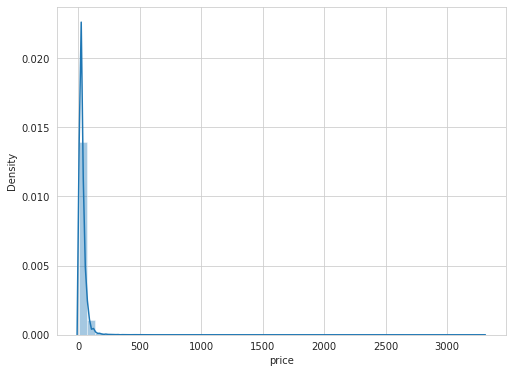

In [ ]:
plt.figure(figsize=(20,10))

col = ['price']

a = 1
for i in range(len(col)):
    plt.subplot(2, 3, a); 
    sns.distplot(wine_df[col[i]])
    plt.xlabel(col[i])
    a += 1

plt.tight_layout()

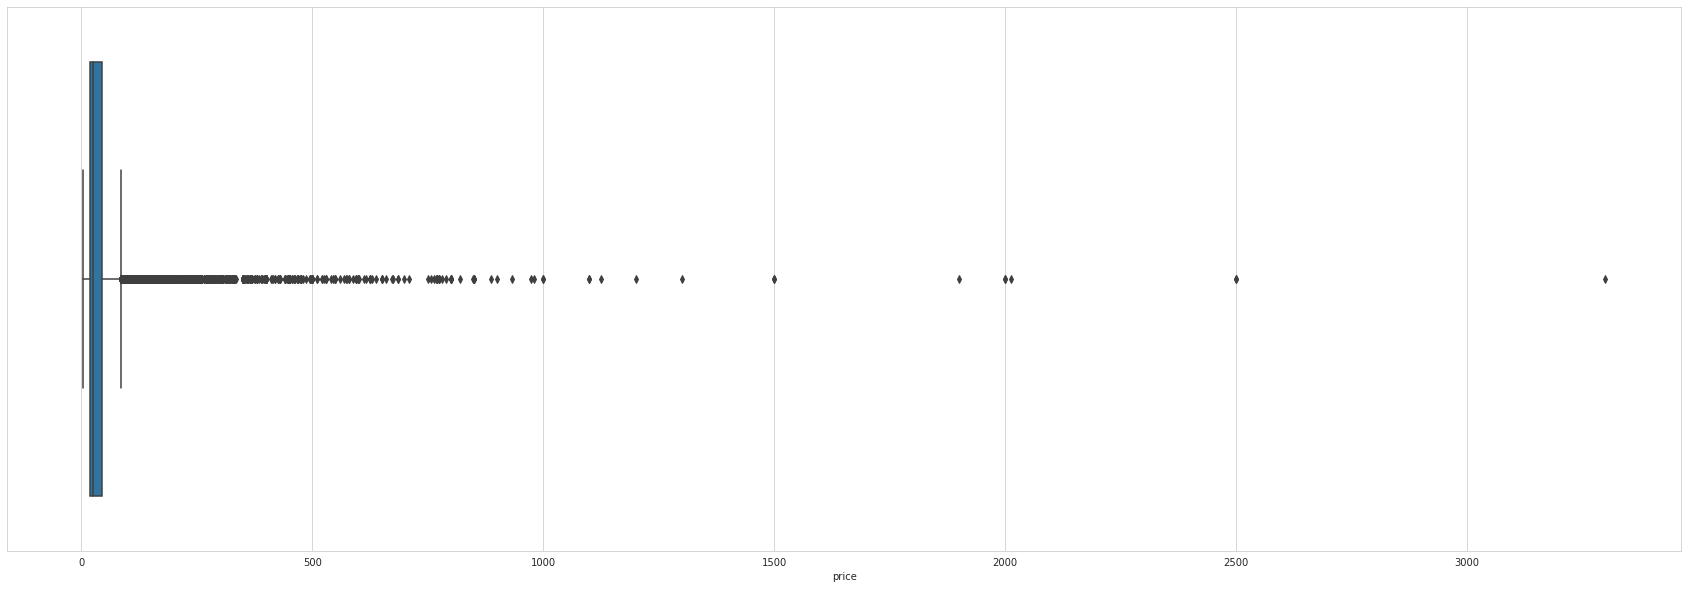

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(wine_df['price'])

In [ ]:
wine_df['price'].describe()

count    119929.000000
mean         35.800707
std          40.804905
min           4.000000
25%          18.000000
50%          26.000000
75%          45.000000
max        3300.000000
Name: price, dtype: float64

In [ ]:
# Outliers for price, but relevant for assessing wine so will not transform (e.g. no Winsorization, etc.)

In [ ]:
wine_df['vintage'].describe()

count    119929.000000
mean       1938.698322
std         373.339470
min           0.000000
25%        2008.000000
50%        2011.000000
75%        2013.000000
max        2017.000000
Name: vintage, dtype: float64

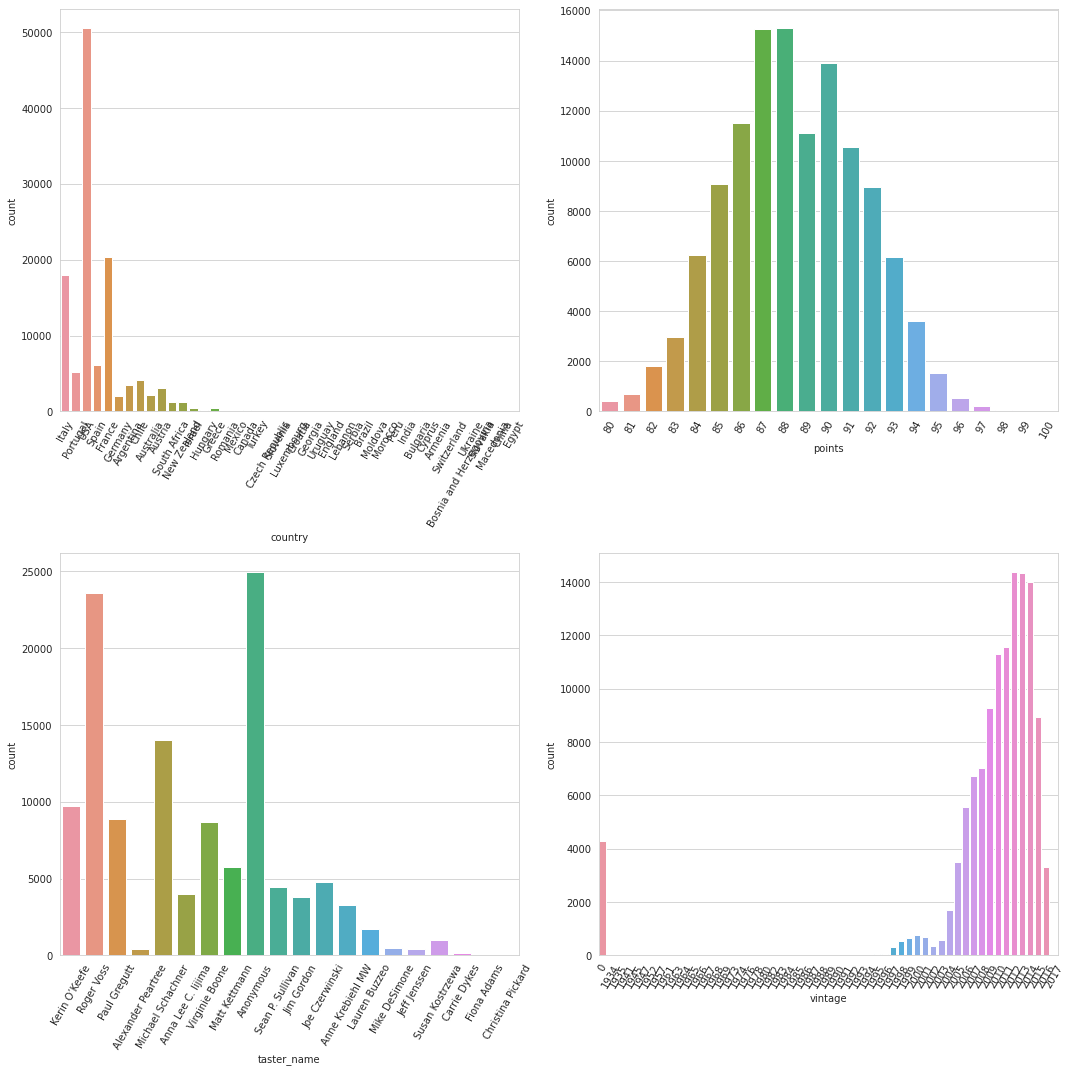

In [ ]:
plt.figure(figsize=(15,15))

#col = ['country', 'points', 'province', 'region_1', 'region_2', 'taster_name', 'variety', 'winery', 'vintage'] <- too many province, region_1, region_2, variety, winery to be useful via illustration
col = ['country', 'points', 'taster_name', 'vintage']

a = 1
for i in range(len(col)):
    plt.subplot(2, 2, a); 
    countplt = sns.countplot(wine_df[col[i]])
    countplt.set_xticklabels(countplt.get_xticklabels(),rotation = 60)
    plt.xlabel(col[i])
    a += 1

plt.tight_layout()

In [ ]:
#wine_df.province.value_counts()
#wine_df.region_1.value_counts()
#wine_df.region_2.value_counts()
#wine_df.variety.value_counts()
#wine_df.winery.value_counts()

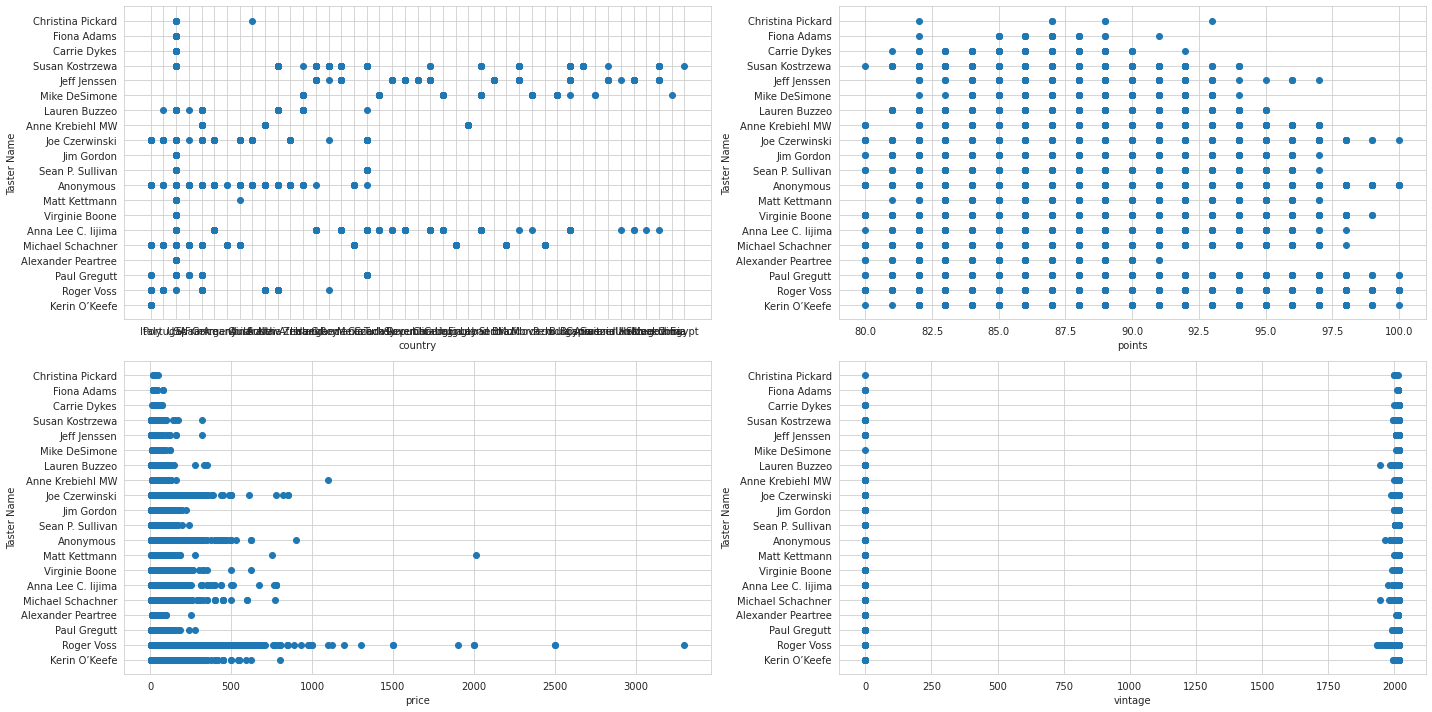

In [ ]:
plt.figure(figsize=(20,10))

col = ['country', 'points', 'price', 'vintage']

a = 1
for i in range(len(col)):
    plt.subplot(2, 2, a); 
    plt.scatter(wine_df[col[i]], wine_df['taster_name'])
    plt.xlabel(col[i])
    plt.ylabel('Taster Name')
    a += 1

plt.tight_layout()

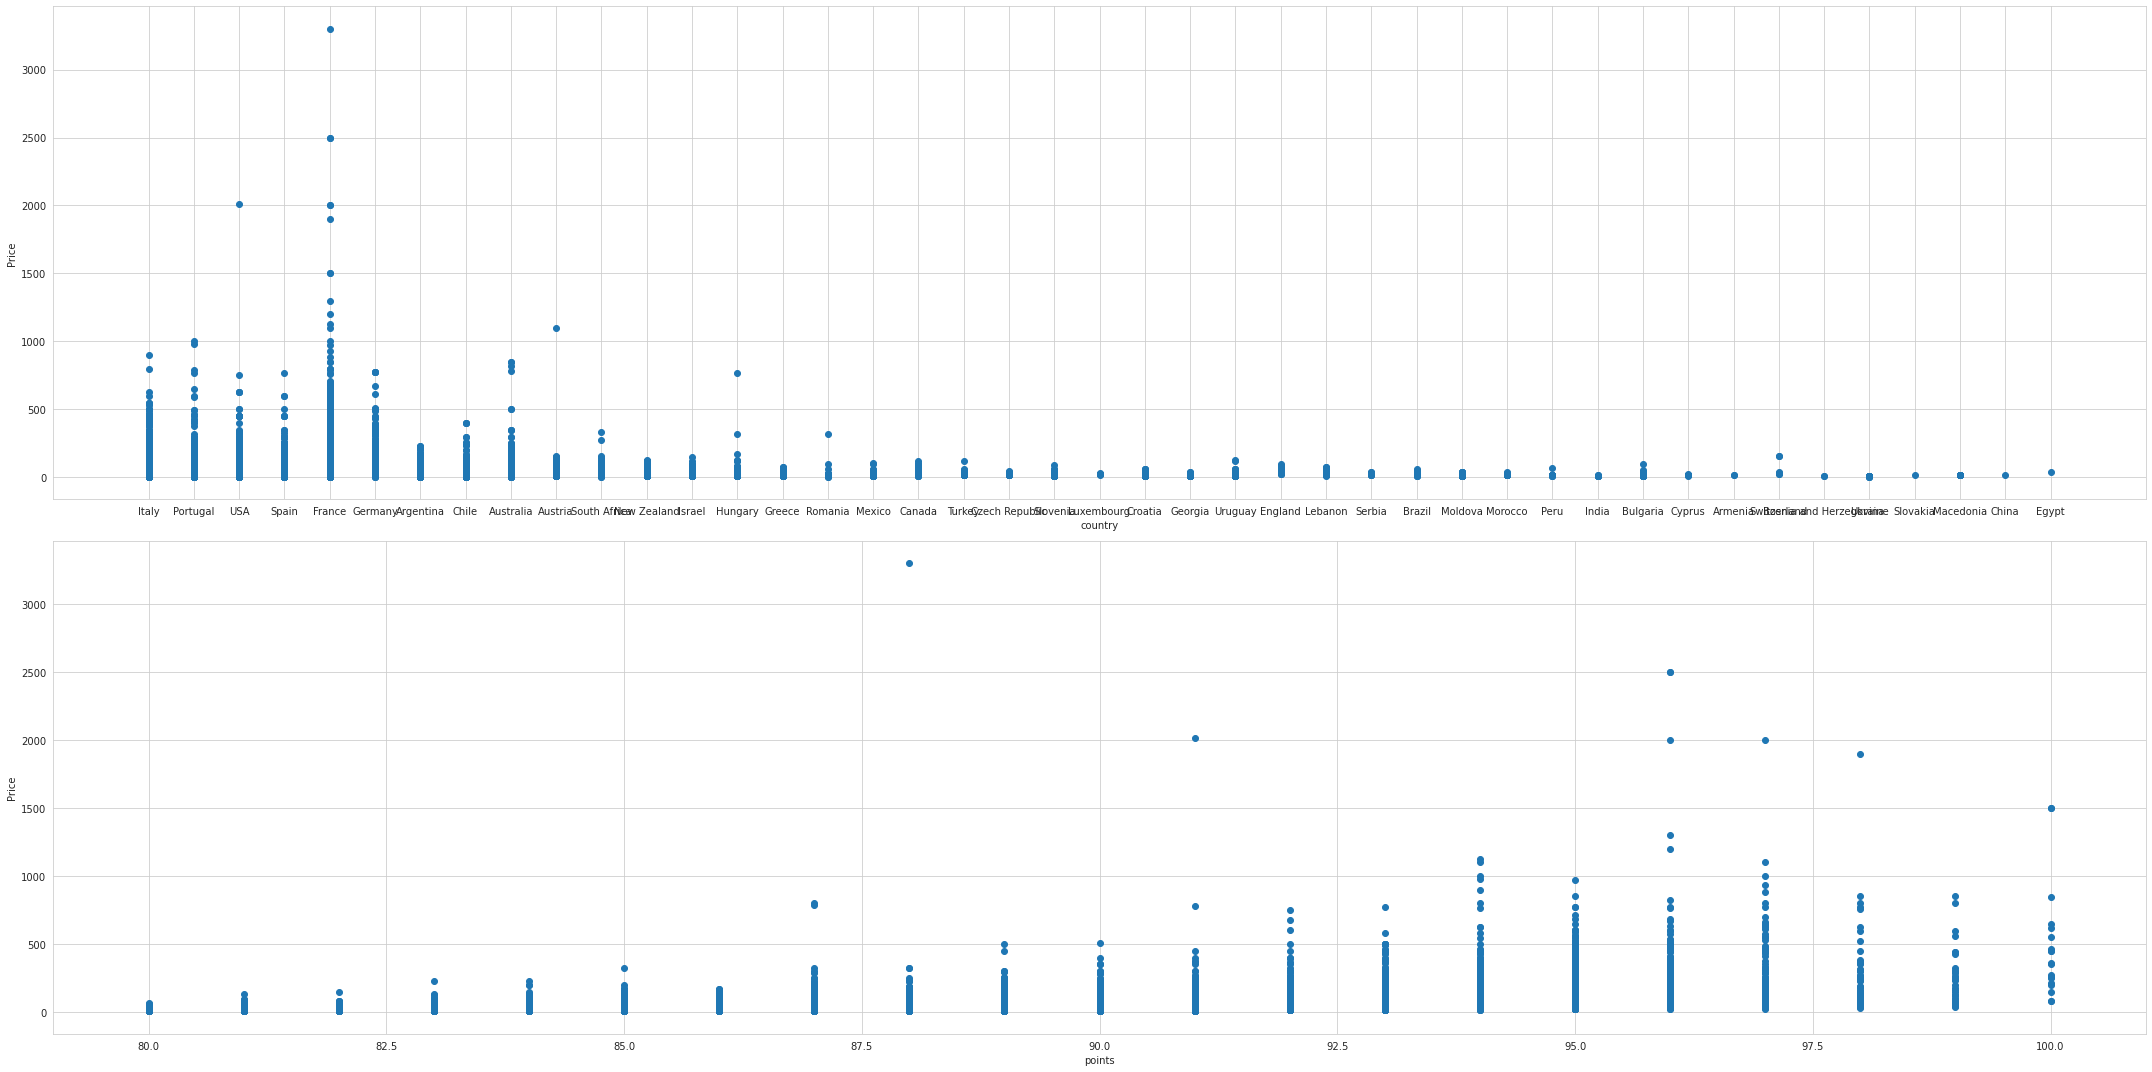

In [ ]:
plt.figure(figsize=(30,15))

col = ['country', 'points']

a = 1
for i in range(len(col)):
    plt.subplot(2, 1, a); 
    plt.scatter(wine_df[col[i]], wine_df['price'])
    plt.xlabel(col[i])
    plt.ylabel('Price')
    a += 1

plt.tight_layout()

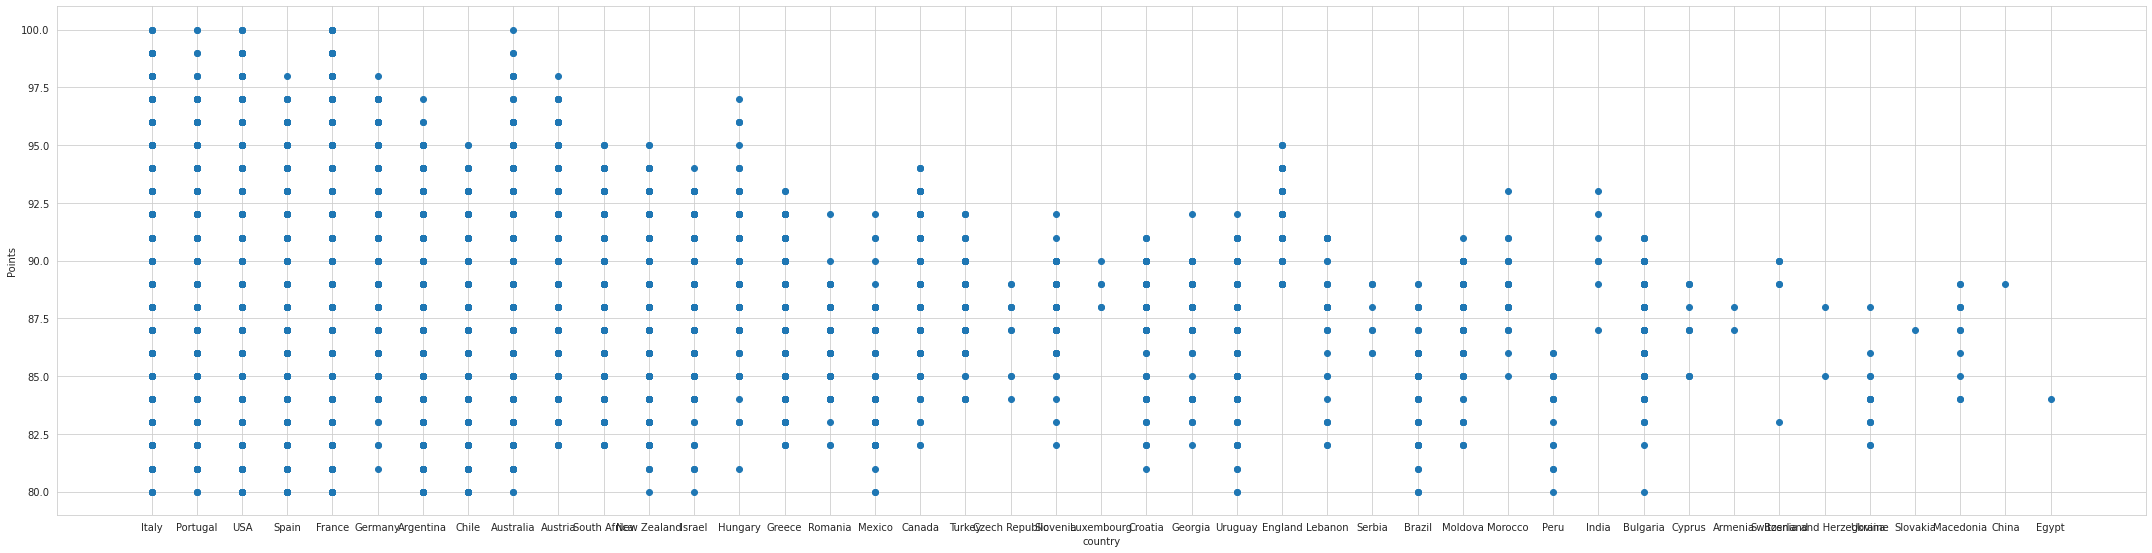

In [ ]:
plt.figure(figsize=(30,15))

col = ['country']

a = 1
for i in range(len(col)):
    plt.subplot(2, 1, a); 
    plt.scatter(wine_df[col[i]], wine_df['points'])
    plt.xlabel(col[i])
    plt.ylabel('Points')
    a += 1

plt.tight_layout()

## Section 3: Model Building

### Section 3a: Content-based Recommendations using NLP

In [ ]:
wine_df.variety.value_counts().nlargest(10)

Pinot Noir                  12275
Chardonnay                  10865
Cabernet Sauvignon           8838
Red Blend                    8233
Bordeaux-style Red Blend     6471
Riesling                     4772
Sauvignon Blanc              4571
Syrah                        3828
Rosé                         3219
Merlot                       2895
Name: variety, dtype: int64

In [ ]:
# Create a smaller subset of wines since not enough computing power to calculate similarity matrix on entire dataset (~120k)
# Use random sampling to build subset with equal representation from top 10 most frequent wines
# Choose 1200 from each varietal -> total 12,000 wines in subset

df_temp = pd.DataFrame()

for i in list(wine_df.variety.value_counts().nlargest(10).keys()):
    df_temp = pd.concat([df_temp, wine_df[wine_df['variety'] == i].copy().sample(n=1200, random_state=42)])

wine_df_subset = df_temp.sample(frac=1, random_state=42).reset_index(drop=True) # shuffle rows

In [ ]:
wine_df_subset.variety.value_counts()

Chardonnay                  1200
Riesling                    1200
Syrah                       1200
Pinot Noir                  1200
Rosé                        1200
Bordeaux-style Red Blend    1200
Red Blend                   1200
Cabernet Sauvignon          1200
Sauvignon Blanc             1200
Merlot                      1200
Name: variety, dtype: int64

In [ ]:
# wine_df_subset

###### Get word2vec embeddings for each word in the wine corpus

In [ ]:
from gensim.models import Word2Vec
# from gensim.models.phrases import Phrases, Phraser

In [ ]:
# Convert keywords into a list of lists of unigrams to fit Word2Vec model instead of using pre-trained model from gensim

corpora = wine_df['keywords']
lst_corpus = []
for string in corpora:
    lst_words = string.split()
    lst_grams = [' '.join(lst_words[i:i+1])
                 for i in range(0, len(lst_words), 1)]
    lst_corpus.append(lst_grams)

# lst_corpus

In [ ]:
# # Detect bigrams and trigrams

# bigrams_detector = Phrases(lst_corpus, delimiter=' '.encode(), min_count=5, threshold=10)
# bigrams_detector = Phraser(bigrams_detector)
# trigrams_detector = Phrases(bigrams_detector[lst_corpus], delimiter=' '.encode(), min_count=5, threshold=10)
# trigrams_detector = Phraser(trigrams_detector)

In [ ]:
# Fit word2vec model

%time nlp = Word2Vec(lst_corpus, size=300, min_count=5, sg=1, iter=10)

CPU times: user 6min 34s, sys: 845 ms, total: 6min 35s
Wall time: 3min 26s


In [ ]:
# Check if trained model is working

nlp.wv.most_similar(positive='dry', topn=10)

[('dryness', 0.5509817600250244),
 ('drily', 0.5213956236839294),
 ('bonedry', 0.497369647026062),
 ('bare', 0.49576810002326965),
 ('dryish', 0.49425768852233887),
 ('rigidly', 0.48346108198165894),
 ('rasping', 0.4708557426929474),
 ('pineappley', 0.46310877799987793),
 ('orangemarmalade', 0.462544322013855),
 ('dryly', 0.4576907157897949)]

In [ ]:
nlp.wv.most_similar(positive='sweet', topn=10)

[('sweetened', 0.5345777273178101),
 ('sweettasting', 0.5336542129516602),
 ('prelude', 0.5243913531303406),
 ('fruitysweet', 0.5157581567764282),
 ('honeysweet', 0.5144994258880615),
 ('jellied', 0.5130149126052856),
 ('sweetness', 0.5080601572990417),
 ('plumped', 0.5033861398696899),
 ('syruplike', 0.5027205944061279),
 ('superextracted', 0.5016015768051147)]

In [ ]:
nlp.wv.most_similar(positive='fruity', topn=10)

[('redfruitflavored', 0.5591205954551697),
 ('wildstrawberry', 0.5427172183990479),
 ('fruitiness', 0.5355517864227295),
 ('lit', 0.5286463499069214),
 ('redcurrantflavored', 0.5260242819786072),
 ('currantflavored', 0.5205568075180054),
 ('candyflavored', 0.518300473690033),
 ('maturetasting', 0.5146734714508057),
 ('creamedapple', 0.5104271173477173),
 ('berryflavored', 0.5090856552124023)]

###### Create single embedding for each wine (combines all the relevant word embeddings contained within its description into one vector)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(wine_df_subset['keywords'])
tfidf_matrix.shape

(12000, 13824)

In [ ]:
dict_of_tfidf_weightings = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_feat = tfidf.get_feature_names()
nlp_words = list(nlp.wv.vocab)
tfidf_sent_vectors = []
list_of_sentences = list(wine_df_subset['keywords'])
row = 0

In [ ]:
%%time
wine_review_vectors = []
for sent in list_of_sentences:
    weighted_word_vector = np.zeros(300)
    weight_sum = 0
    words = sent.split(' ')
    for word in words:
        if word in nlp_words and word in tfidf_feat:
            tfidf_weighting = dict_of_tfidf_weightings[word]
            vec = nlp.wv[word].reshape(1,300)
            weighted_word_vector = tfidf_weighting * vec
            tfidf_sent_vectors.append(weighted_word_vector)
            row += 1
        else:
            continue
    try:
        review_vector = sum(tfidf_sent_vectors)/len(tfidf_sent_vectors)
    except:
        review_vector = []
    
    rv = [review_vector]
    wine_review_vectors.append(rv)

CPU times: user 20min 8s, sys: 5.85 s, total: 20min 14s
Wall time: 20min 11s


In [ ]:
from operator import itemgetter

wine_df_subset['tfidf_vector'] = list(map(itemgetter(0), wine_review_vectors))
wine_df_subset.head()

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
0,France,"A blend of 13 vintages, beautifully ripe and r...",94,90.0,Champagne,Champagne,,Roger Voss,De Sousa & Fils NV Cuvée des Caudalies Grand C...,Chardonnay,De Sousa & Fils,0,16,34686,blend 13 vintage beautifully ripe round even m...,"[[0.05428683, 0.024403995, -0.30366802, -0.292..."
1,USA,"One of several Rieslings from this producer, t...",88,20.0,Oregon,Willamette Valley,,Paul Gregutt,Paetra 2016 K Riesling (Willamette Valley),Riesling,Paetra,2016,15,82461,one several riesling producer lowalcohol effor...,"[[-0.18325336, 0.38493073, -0.52106595, -0.241..."
2,Chile,"Animal Cracker, Creamsicle and chemical aromas...",82,12.0,Central Valley,,,Michael Schachner,Soleca 2012 3 Generaciones Chardonnay (Central...,Chardonnay,Soleca,2012,13,100519,animal cracker creamsicle chemical aroma combi...,"[[-0.1946319, 0.37862417, -0.6555327, 0.028953..."
3,USA,"Baking spice, vanilla and dark-fruit aromas ar...",88,40.0,Washington,Wahluke Slope,Columbia Valley,Sean P. Sullivan,Seven Falls 2014 GPS Series Mracheck Vineyard ...,Syrah,Seven Falls,2014,17,98347,baking spice vanilla darkfruit aroma dark cher...,"[[0.058087002, 0.26639673, -0.52907807, -0.068..."
4,USA,"A very pretty shade of pink, this wine offers ...",87,24.0,California,Edna Valley,Central Coast,Matt Kettmann,Tolosa 2014 Estate Rosé of Pinot Noir (Edna Va...,Pinot Noir,Tolosa,2014,12,108193,pretty shade pink offer strawberry blossom lig...,"[[0.06535693, 0.15728225, -0.5910113, -0.12153..."


In [ ]:
input_vectors = list(wine_df_subset['tfidf_vector'])
input_vectors_listed = [a.tolist() for a in input_vectors]
input_vectors_listed = [a[0] for a in input_vectors_listed]

In [ ]:
# Use cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate (especially when used in conjunction with TF-IDF scores)

from sklearn.metrics.pairwise import cosine_similarity

%time cosine_sim = cosine_similarity(input_vectors_listed, input_vectors_listed)

CPU times: user 5.6 s, sys: 738 ms, total: 6.34 s
Wall time: 3.59 s


In [ ]:
cosine_sim.shape

(12000, 12000)

###### Testing parameters


In [ ]:
k = 10
name_test = random.choice(list(wine_df_subset['title']))

###### Function definitions

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=k, algorithm= 'brute', metric='cosine')
recs_knn = knn.fit(input_vectors_listed)

In [ ]:
def select_wine(title):
    temp = wine_df_subset[(wine_df_subset['title'] == title)]
    idx = temp[(temp['points'] == max(temp['points']))]['wine_id']
    
    return idx.index[0]

In [ ]:
def get_recommendations(title, k=10, cosine_sim=cosine_sim):
    
    # Get the index of the wine that matches the title
    idx = select_wine(title)

    # Get the pairwsie similarity scores of all wines with that wine
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the wines based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the k most similar wines
    sim_scores = sim_scores[1:1+k]

    # Get the wine indices
    wine_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar wines
    return wine_df_subset.iloc[wine_indices]

In [ ]:
def get_recommendations_report(name_test, k=10):
    wine_test_vector = wine_df_subset.loc[wine_df_subset['title'] == name_test]['tfidf_vector'].tolist()[0]
    distance, indice = recs_knn.kneighbors(wine_test_vector, n_neighbors=k+1)
    distance_list = distance[0].tolist()[1:]
    indice_list = indice[0].tolist()[1:]
    
    main_wine = wine_df_subset.loc[wine_df_subset['title'] == name_test]
    print('Reference wine:', name_test)
    print('Keywords:', list(main_wine['keywords'])[0])
    print('_________')
    
    n = 1
    for d, i in zip(distance_list, indice_list):
        wine_name = wine_df_subset['title'][i]
        wine_descriptors = wine_df_subset['keywords'][i]
        print('Option', str(n), ':', wine_name, ';', 'cosine distance:', "{:.3f}".format(d))
        print('Keywords:', wine_descriptors)
        print('')
        n+=1

###### Get recommendations

In [ ]:
get_recommendations_report(name_test=name_test, k=k)

Reference wine: Darcie Kent Vineyards 2007 Picazo Vineyard Merlot (Livermore Valley)
Keywords: sharp aggressive tart acidity emphasizes tannin making feel overly astringent bad pleasant cherry blackberry sure tough
_________
Option 1 : Château Buisson Reydon 2014  Bordeaux ; cosine distance: 0.000
Keywords: fresh developing well spice richly fruity character nice perfumed acidity end juicy aftertaste fine starting 2017

Option 2 : Château Tour de Pez 2012 Barrel Sample  (Saint-Estèphe) ; cosine distance: 0.000
Keywords: 8789 barrel sample firm extracted thats hardedged needing sign fruit dry austere chocolate bittercoffee dominate

Option 3 : Vigilance 2016 Rosé (California) ; cosine distance: 0.000
Keywords: average rosé bottling based rhône variety pleasure light coral color boast subtle fresh raspberry aroma lead seamlessly white peach raspberry vibrant acidity perk smooth mouthfeel lending balance elegance

Option 4 : Chacewater 2011 Made With Organically Grown Grapes Syrah (Sierra

In [ ]:
get_recommendations(title=name_test, k=k, cosine_sim=cosine_sim)

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
2485,France,The wine is fresh but developing well. It has ...,88,10.00,Bordeaux,Bordeaux,,Roger Voss,Château Buisson Reydon 2014 Bordeaux,Bordeaux-style Red Blend,Château Buisson Reydon,2014,16,22819,fresh developing well spice richly fruity char...,"[[0.40047377, 0.15031211, -0.39754817, -0.1852..."
2487,France,"87–89. Barrel sample. This is a firm, extracte...",88,48.05,Bordeaux,Saint-Estèphe,,Roger Voss,Château Tour de Pez 2012 Barrel Sample (Saint...,Bordeaux-style Red Blend,Château Tour de Pez,2012,16,26760,8789 barrel sample firm extracted thats harded...,"[[0.4002517, 0.15006825, -0.39752305, -0.18546..."
2484,USA,"Not your average rosé, this bottling based on ...",90,20.00,California,California,California Other,Jim Gordon,Vigilance 2016 Rosé (California),Rosé,Vigilance,2016,8,112356,average rosé bottling based rhône variety plea...,"[[0.4005433, 0.15043136, -0.39756626, -0.18527..."
2488,USA,"A meaty, gamy Syrah boasting aromas of bacon a...",92,20.00,California,Sierra Foothills,,Virginie Boone,Chacewater 2011 Made With Organically Grown Gr...,Syrah,Chacewater,2011,19,20651,meaty gamy syrah boasting aroma bacon ducklive...,"[[0.40031946, 0.15028739, -0.39750838, -0.1854..."
2489,Argentina,Light aromas of white fruits and honeysuckle a...,86,15.00,Mendoza Province,Mendoza,,Michael Schachner,Finca Pasión NV Mi Vida Chardonnay (Mendoza),Chardonnay,Finca Pasión,0,13,47106,light aroma white fruit honeysuckle welcoming ...,"[[0.40012327, 0.1503411, -0.39755756, -0.18548..."
2483,USA,This widely available and well-priced appellat...,91,30.00,California,Santa Lucia Highlands,Central Coast,Matt Kettmann,Hahn 2015 SLH Pinot Noir (Santa Lucia Highlands),Pinot Noir,Hahn,2015,12,54037,widely available wellpriced appellation blend ...,"[[0.40059906, 0.1503828, -0.39733717, -0.18533..."
2490,USA,This appellation has shown great promise with ...,91,32.00,California,Bennett Valley,Sonoma,Virginie Boone,Frostwatch 2012 Merlot (Bennett Valley),Merlot,Frostwatch,2012,19,49697,appellation shown great promise variety demons...,"[[0.4002297, 0.1502504, -0.39750317, -0.185600..."
2491,France,"Solid, chunky and dense, this shows a rich cha...",85,18.00,Bordeaux,Bordeaux,,Roger Voss,Duval & Blanchet 2009 Les Notes Fruitées (Bor...,Merlot,Duval & Blanchet,2009,16,42164,solid chunky dense rich character based around...,"[[0.40032503, 0.15026416, -0.39732823, -0.1855..."
2482,France,"This is a disappointment. The wine is tart, st...",85,24.00,Bordeaux,Margaux,,Roger Voss,Château Siran 2007 Margaux,Bordeaux-style Red Blend,Château Siran,2007,16,26480,disappointment tart stalky time light edge gre...,"[[0.4003642, 0.15049034, -0.39724192, -0.18545..."
2481,USA,"Overly ripe and sugary sweet, this Merlot, wit...",83,25.00,California,Paicines,Central Coast,Anonymous,Donati 2005 Merlot (Paicines),Merlot,Donati,2005,3,40444,overly ripe sugary sweet merlot splash cab rus...,"[[0.40051484, 0.15057561, -0.39728355, -0.1855..."


###### User Testing

In [ ]:
tasters = wine_df_subset['taster_id'].unique().tolist()
tasters

[16, 15, 13, 17, 12, 1, 19, 3, 11, 9, 7, 2, 18, 10, 8, 0, 14, 4, 6]

In [ ]:
# Create history of wines tasted for each taster

tasted = {}
keys = tasters

for i in keys:
    tasted[i] = wine_df_subset[wine_df_subset['taster_id'] == i]['wine_id'].tolist()

In [ ]:
test = wine_df_subset.copy().sample(n=100, random_state=5)
test.variety.value_counts()

Pinot Noir                  16
Cabernet Sauvignon          13
Rosé                        12
Sauvignon Blanc             11
Merlot                      11
Bordeaux-style Red Blend     9
Red Blend                    9
Chardonnay                   8
Syrah                        7
Riesling                     4
Name: variety, dtype: int64

In [ ]:
test.taster_id.value_counts()

3     22
16    17
12    12
19     9
17     8
15     8
13     7
9      5
1      4
8      4
10     2
11     1
14     1
Name: taster_id, dtype: int64

###### Evaluation (mean average precision @ k and mean average recall @ k)

In [ ]:
def reco_test(nsize=100):
  
  test = wine_df_subset.copy().sample(n=nsize, random_state=5)

  res = []
  
  for u in tasters:
    if (u in list(test['taster_id'].unique())): 
      w = random.choice(list(test[test['taster_id'] == u].index))
      t = test[test['taster_id'] == u]['title'][w]
      id = test[test['taster_id'] == u]['wine_id'][w]
      g = get_recommendations(title=t, cosine_sim=cosine_sim)
    # precision @ k = (# of our recommended items that are relevant @k)/(# of recommended items at k)
    # recall @ k = (# of our recommended items that are relevant @k)/(# of all possible relevant items at k)
      relrecs = len(g[g['taster_id'] == u])
      allrelwines = len(test[test['taster_id'] == u])
      precision_at_k = relrecs / k
      recall_at_k = relrecs / allrelwines
      res.append([u, t, id, k, relrecs, allrelwines, precision_at_k, recall_at_k])
    else:
      continue

  recs_summary = pd.DataFrame(res, columns=['taster_id', 'reference wine', 'wine_id', 'k', 'relevant recommendations', 'total relevant', 'precision@k', 'recall@k'])
  return recs_summary

In [ ]:
def get_mean_avg_at_k(iters=10, nsize=100):
  p = pd.DataFrame()
  r = pd.DataFrame()
  
  for i in range(1,iters+1):
    temp = reco_test(nsize)
    p[str(i)] = temp['precision@k']
    r[str(i)] = temp['recall@k']

  # mean average precision and recall @ K
  mapK = p.mean()
  marK = r.mean()

  maSummary = pd.concat([mapK,marK],axis=1).rename(columns={0: 'mean_avg_precision@k', 1: 'mean_avg_recall@k'})

  return maSummary

In [ ]:
get_mean_avg_at_k(iters=20, nsize=50)

,mean_avg_precision@k,mean_avg_recall@k
1,0.045455,0.082576
2,0.081818,0.131818
3,0.054545,0.081818
4,0.081818,0.178030
5,0.118182,0.246212
6,0.100000,0.237121
7,0.090909,0.203030
8,0.036364,0.072727
9,0.063636,0.150758
10,0.081818,0.171212


In [ ]:
get_mean_avg_at_k(iters=20, nsize=100)

,mean_avg_precision@k,mean_avg_recall@k
1,0.053846,0.084944
2,0.076923,0.086569
3,0.107692,0.131132
4,0.061538,0.049759
5,0.061538,0.054155
6,0.084615,0.089540
7,0.069231,0.104616
8,0.084615,0.133808
9,0.061538,0.082944
10,0.061538,0.068861


###### Get personalized recommendations (recommend wines based on description similarity of highest rated wine and that taster has not had before)

In [ ]:
highestrated = wine_df_subset.groupby('taster_id').max('points').copy()
highestrated

,points,price,vintage,wine_id
taster_id,,,,
0,90,60.0,2015,118240
1,98,775.0,2016,118301
2,97,120.0,2016,119453
3,99,450.0,2016,119481
4,89,50.0,2016,109624
6,85,17.0,0,53377
7,91,60.0,2015,113669
8,96,220.0,2016,118695
9,97,292.0,2016,119211


In [ ]:
def get_personalized_recos(taster_id, wine_id=None, k=20, cosine_sim=cosine_sim):
  
  if wine_id == None:
    # Find highest rated wine and return wine_id
    wid = int(highestrated.loc[taster_id]['wine_id'])
    # Get index of wine_id
    idx = wine_df_subset[wine_df_subset['wine_id'] == wid].index[0]
  else:
    idx = wine_df_subset[wine_df_subset['wine_id'] == wine_id].index[0]
  
  # Get the pairwsie similarity scores of all wines with that wine
  sim_scores = list(enumerate(cosine_sim[idx]))

  # Sort the wines based on the similarity scores
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Get the scores of the k most similar wines
  sim_scores = sim_scores[1:1+k]

  # Get the wine indices
  wine_indices = [i[0] for i in sim_scores]

  # Get the top 20 most similar wines
  recs = wine_df_subset.iloc[wine_indices]

  # Only keep wines where taster has already had them
  return recs[recs['taster_id'] != taster_id].head(10)

In [ ]:
# sample rec based on specific bottle
get_personalized_recos(taster_id=16, wine_id=29984)

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
4360,USA,"The berry, herb and coffee aromas are light an...",88,45.0,Washington,Walla Walla Valley (WA),Columbia Valley,Sean P. Sullivan,àMaurice 2014 Fred Estate Syrah (Walla Walla V...,Syrah,àMaurice,2014,17,119549,berry herb coffee aroma light hightoned potpou...,"[[0.4034246904253817, 0.15749774148313458, -0...."
4358,France,A nice richness and light honey note permeate ...,89,17.0,Languedoc-Roussillon,Limoux,,Lauren Buzzeo,Sieur d'Arques 2009 Toques et Clochers Océaniq...,Chardonnay,Sieur d'Arques,2009,11,99212,nice richness light honey note permeate bouque...,"[[0.40324798986137816, 0.15757149809476476, -0..."
4361,USA,"This wine is electric pink in color, with note...",89,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,Columbia Winery 2013 Grenache Rosé (Horse Heav...,Rosé,Columbia Winery,2013,17,30936,electric pink color strawberry bubblegum cranb...,"[[0.40343365716108365, 0.1575342971252511, -0...."
4362,Greece,This blend of Cabernet Sauvignon and Merlot ha...,87,11.0,Macedonia,,,Jeff Jenssen,Puklavec & Friends 2013 Red (Macedonia),Red Blend,Puklavec & Friends,2013,7,88429,blend cabernet sauvignon merlot aroma coffee b...,"[[0.4034592337610874, 0.15751702169779827, -0...."
4357,USA,Very much done in a mineral-driven Chablis sty...,90,30.0,California,Santa Cruz Mountains,Central Coast,Matt Kettmann,Cooper-Garrod 2013 Gravel Ridge Vineyard Chard...,Chardonnay,Cooper-Garrod,2013,12,31854,much done mineraldriven chablis interesting bo...,"[[0.4032870009399824, 0.1575636788832683, -0.3..."
4363,USA,Light wisps of raspberry and strawberry highli...,90,45.0,California,Alexander Valley,Sonoma,Virginie Boone,Corner 103 2012 Merlot (Alexander Valley),Merlot,Corner 103,2012,19,32072,light wisp raspberry strawberry highlight rest...,"[[0.403426444927489, 0.15745630761595783, -0.3..."
4364,USA,"Dried herb, purple flower, vanilla, baking spi...",88,35.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,Finn Hill 2013 Merveille Stillwater Creek Vine...,Merlot,Finn Hill,2013,17,47264,dried herb purple flower vanilla baking spice ...,"[[0.4035749978974042, 0.15726724730528607, -0...."
4365,USA,The cool-climate origins of this wine are reve...,90,28.0,California,Santa Barbara County,Central Coast,Anonymous,Fess Parker 2011 Syrah (Santa Barbara County),Syrah,Fess Parker,2011,3,46282,coolclimate origin revealed immediately freshl...,"[[0.4036847647435341, 0.15737637991790163, -0...."
4356,USA,This wine sources fruit from throughout Napa V...,88,55.0,California,Napa Valley,Napa,Virginie Boone,Bell 2012 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Bell,2012,19,8251,source fruit throughout napa valley well lake ...,"[[0.40339149696189047, 0.15728117688360074, -0..."
4355,USA,"A new offering from this partnership, this win...",87,13.0,Washington,Yakima Valley,Columbia Valley,Sean P. Sullivan,Charles & Charles 2014 Riesling (Yakima Valley),Riesling,Charles & Charles,2014,17,21125,new offering partnership brings aroma jasmine ...,"[[0.40351538715587354, 0.15732657383157375, -0..."


In [ ]:
# sample rec based on highest rated bottle
get_personalized_recos(taster_id=16)

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
2976,USA,"Grassy and tropical in papaya and melon, this ...",88,25.0,California,Napa Valley,Napa,Virginie Boone,Amici 2013 Sauvignon Blanc (Napa Valley),Sauvignon Blanc,Amici,2013,19,3208,grassy tropical papaya melon sb creaminess giv...,"[[0.40153188, 0.1553937, -0.39648947, -0.18699..."
2978,USA,While this is 100% varietal and entirely ferme...,88,35.0,California,St. Helena,Napa,Virginie Boone,Charles Krug 2015 Limited Release Estate Grown...,Sauvignon Blanc,Charles Krug,2015,19,21230,100 varietal entirely fermented stainless stee...,"[[0.40114036, 0.15530647, -0.3968014, -0.18702..."
2979,USA,"A beautiful Merlot, soft, ripe and complex, an...",88,28.0,California,Alexander Valley,Sonoma,Anonymous,Mojon's Bench 2004 Estate Merlot (Alexander Va...,Merlot,Mojon's Bench,2004,3,77159,beautiful merlot soft ripe complex frontloaded...,"[[0.40109754, 0.15520228, -0.3967632, -0.18705..."
2980,USA,"Aromas of cherry, spice and mint lead into tar...",88,60.0,Oregon,Willamette Valley,,Paul Gregutt,Benton-Lane 2006 First Class Pinot Noir (Willa...,Pinot Noir,Benton-Lane,2006,15,8768,aroma cherry spice mint lead tart pie cherry w...,"[[0.40128416, 0.15506864, -0.39685768, -0.1871..."
2975,USA,"Dark and sexy aromas of spiced blackberry, boy...",91,40.0,Virginia,Monticello,,Anonymous,Lovingston 2010 Estate Reserve Josie's Knoll R...,Red Blend,Lovingston,2010,3,70062,dark sexy aroma spiced blackberry boysenberry ...,"[[0.4018842, 0.15521364, -0.39629722, -0.18690..."
2973,France,This pale-hued blend of Grenache and Syrah sta...,86,13.0,Rhône Valley,Luberon,,Joe Czerwinski,Marrenon 2015 Grande Toque Rosé (Luberon),Rosé,Marrenon,2015,9,73437,palehued blend grenache syrah start bit confec...,"[[0.40152273, 0.15525071, -0.3964489, -0.18681..."
2972,USA,"Yellow grapefruit pith, white Asian pear flesh...",89,14.0,California,Monterey,Central Coast,Matt Kettmann,Jekel 2014 Riesling (Monterey),Riesling,Jekel,2014,12,60154,yellow grapefruit pith white asian pear flesh ...,"[[0.40183726, 0.15509033, -0.39620295, -0.1869..."
2981,USA,This wine is comprised of 65% Cabernet Sauvign...,85,35.0,California,Napa Valley,Napa,Virginie Boone,Rose & Thistle 2016 Rosé (Napa Valley),Rosé,Rose & Thistle,2016,19,94004,comprised 65 cabernet sauvignon 24 pinot noir ...,"[[0.40122476, 0.15509, -0.3969763, -0.18727623..."
2982,USA,"Presenting at first as somewhat reduced, this ...",89,56.0,California,Sonoma Coast,Sonoma,Virginie Boone,Talisman 2013 Wildcat Mountain Pinot Noir (Son...,Pinot Noir,Talisman,2013,19,104002,presenting first somewhat reduced tart feral m...,"[[0.4012888, 0.15510151, -0.39698926, -0.18728..."
2983,USA,This wine is overwhelmingly smoky in char and ...,83,34.0,California,Alexander Valley,Sonoma,Virginie Boone,La Storia 2014 Block 500 Merlot (Alexander Val...,Merlot,La Storia,2014,19,65261,overwhelmingly smoky char bacon flavor side no...,"[[0.4012676, 0.15508404, -0.39689827, -0.18739..."


In [ ]:
# top 10 recs for each taster in subsample of 12k wines (note: taster_id = 5 not in sample)
for i in tasters:
  print('Taster', i, 'has tried', len(tasted[i]), 'wines in this subset of', len(wine_df_subset), 'wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: \n')
  display (get_personalized_recos(taster_id=i))
  print()
  print()

Taster 16 has tried 2306 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
2976,USA,"Grassy and tropical in papaya and melon, this ...",88,25.0,California,Napa Valley,Napa,Virginie Boone,Amici 2013 Sauvignon Blanc (Napa Valley),Sauvignon Blanc,Amici,2013,19,3208,grassy tropical papaya melon sb creaminess giv...,"[[0.40153188, 0.1553937, -0.39648947, -0.18699..."
2978,USA,While this is 100% varietal and entirely ferme...,88,35.0,California,St. Helena,Napa,Virginie Boone,Charles Krug 2015 Limited Release Estate Grown...,Sauvignon Blanc,Charles Krug,2015,19,21230,100 varietal entirely fermented stainless stee...,"[[0.40114036, 0.15530647, -0.3968014, -0.18702..."
2979,USA,"A beautiful Merlot, soft, ripe and complex, an...",88,28.0,California,Alexander Valley,Sonoma,Anonymous,Mojon's Bench 2004 Estate Merlot (Alexander Va...,Merlot,Mojon's Bench,2004,3,77159,beautiful merlot soft ripe complex frontloaded...,"[[0.40109754, 0.15520228, -0.3967632, -0.18705..."
2980,USA,"Aromas of cherry, spice and mint lead into tar...",88,60.0,Oregon,Willamette Valley,,Paul Gregutt,Benton-Lane 2006 First Class Pinot Noir (Willa...,Pinot Noir,Benton-Lane,2006,15,8768,aroma cherry spice mint lead tart pie cherry w...,"[[0.40128416, 0.15506864, -0.39685768, -0.1871..."
2975,USA,"Dark and sexy aromas of spiced blackberry, boy...",91,40.0,Virginia,Monticello,,Anonymous,Lovingston 2010 Estate Reserve Josie's Knoll R...,Red Blend,Lovingston,2010,3,70062,dark sexy aroma spiced blackberry boysenberry ...,"[[0.4018842, 0.15521364, -0.39629722, -0.18690..."
2973,France,This pale-hued blend of Grenache and Syrah sta...,86,13.0,Rhône Valley,Luberon,,Joe Czerwinski,Marrenon 2015 Grande Toque Rosé (Luberon),Rosé,Marrenon,2015,9,73437,palehued blend grenache syrah start bit confec...,"[[0.40152273, 0.15525071, -0.3964489, -0.18681..."
2972,USA,"Yellow grapefruit pith, white Asian pear flesh...",89,14.0,California,Monterey,Central Coast,Matt Kettmann,Jekel 2014 Riesling (Monterey),Riesling,Jekel,2014,12,60154,yellow grapefruit pith white asian pear flesh ...,"[[0.40183726, 0.15509033, -0.39620295, -0.1869..."
2981,USA,This wine is comprised of 65% Cabernet Sauvign...,85,35.0,California,Napa Valley,Napa,Virginie Boone,Rose & Thistle 2016 Rosé (Napa Valley),Rosé,Rose & Thistle,2016,19,94004,comprised 65 cabernet sauvignon 24 pinot noir ...,"[[0.40122476, 0.15509, -0.3969763, -0.18727623..."
2982,USA,"Presenting at first as somewhat reduced, this ...",89,56.0,California,Sonoma Coast,Sonoma,Virginie Boone,Talisman 2013 Wildcat Mountain Pinot Noir (Son...,Pinot Noir,Talisman,2013,19,104002,presenting first somewhat reduced tart feral m...,"[[0.4012888, 0.15510151, -0.39698926, -0.18728..."
2983,USA,This wine is overwhelmingly smoky in char and ...,83,34.0,California,Alexander Valley,Sonoma,Virginie Boone,La Storia 2014 Block 500 Merlot (Alexander Val...,Merlot,La Storia,2014,19,65261,overwhelmingly smoky char bacon flavor side no...,"[[0.4012676, 0.15508404, -0.39689827, -0.18739..."




Taster 15 has tried 1127 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
5916,USA,"Smells and tastes overoaked, with toothpicky v...",86,44.00,California,Sonoma Coast,Sonoma,Anonymous,Pali 2008 Durell Vineyard Pinot Noir (Sonoma C...,Pinot Noir,Pali,2008,3,82755,smell taste overoaked toothpicky vanilla smoky...,"[[0.4036799789842242, 0.15806211841612033, -0...."
5914,France,"89-91 Barrel sample. Spice and sweet fruits, a...",90,48.05,Bordeaux,Moulis-en-Médoc,,Roger Voss,Château Dutruch Grand Poujeaux 2009 Barrel sam...,Bordeaux-style Red Blend,Château Dutruch Grand Poujeaux,2009,16,23415,8991 barrel sample spice sweet fruit delicious...,"[[0.4037477898852785, 0.15819821675030116, -0...."
5915,USA,"Racy and bright, with high acidity framing dry...",85,17.00,California,Russian River Valley,Sonoma,Anonymous,Frei Brothers 2009 Reserve Sauvignon Blanc (Ru...,Sauvignon Blanc,Frei Brothers,2009,3,49414,racy bright high acidity framing dry lemon lim...,"[[0.4036448050530069, 0.1581927331367012, -0.3..."
5913,Chile,"Aromas of licorice, nutmeg and blackberry come...",90,17.00,Cachapoal Valley,,,Michael Schachner,Anakena 2012 Ona Special Reserve Cabernet Sauv...,Red Blend,Anakena,2012,13,3356,aroma licorice nutmeg blackberry come herbal l...,"[[0.40380778730462047, 0.1582363645747728, -0...."
5912,Germany,The intensely warm 2015 vintage goes full forc...,90,18.00,Mosel,,,Anna Lee C. Iijima,Friedrich-Wilhelm-Gymnasium 2015 Fritz Willi R...,Riesling,Friedrich-Wilhelm-Gymnasium,2015,1,49531,intensely warm 2015 vintage go full force offd...,"[[0.4037694360151468, 0.15827373283715196, -0...."
5918,USA,This Cabernet Sauvignon and Merlot dominant bl...,91,14.00,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,Wondrous 2013 Red I.Q. Red (Columbia Valley (WA)),Bordeaux-style Red Blend,Wondrous,2013,17,117915,cabernet sauvignon merlot dominant blend come ...,"[[0.4036530777968196, 0.1582136647602726, -0.3..."
5911,Germany,"Dusty, saffron-spiced earthiness is juxtaposed...",97,775.00,Rheingau,,,Anna Lee C. Iijima,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil,2014,1,93129,dusty saffronspiced earthiness juxtaposed inte...,"[[0.40381148557101354, 0.15821026491387705, -0..."
5919,USA,"Black cherries, turned loam and black slate sw...",89,29.00,California,Santa Barbara County,Central Coast,Matt Kettmann,Jaffurs 2012 Syrah (Santa Barbara County),Syrah,Jaffurs,2012,12,59164,black cherry turned loam black slate swirl sta...,"[[0.4038025154309919, 0.15820363866076126, -0...."
5921,USA,"Deliciously jammy orange, pineapple, peach and...",89,30.00,California,Russian River Valley,Sonoma,Anonymous,Sanctuary 2012 Chardonnay (Russian River Valley),Chardonnay,Sanctuary,2012,3,95832,deliciously jammy orange pineapple peach apric...,"[[0.40381430821336667, 0.15813800579185952, -0..."
5910,Italy,This full-bodied Chardonnay from the Abruzzo r...,85,9.00,Central Italy,Terre di Chieti,,Anonymous,Farnese 2007 Chardonnay (Terre di Chieti),Chardonnay,Farnese,2007,3,45368,fullbodied chardonnay abruzzo central italy of...,"[[0.4037914459608338, 0.158192693655647, -0.39..."




Taster 13 has tried 1055 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
9082,USA,"This boasts a brilliant, linear progression fr...",95,40.00,California,Mendocino Ridge,,Virginie Boone,Donkey & Goat 2011 Perli Vineyards Syrah (Mend...,Syrah,Donkey & Goat,2011,19,40493,boast brilliant linear progression pepper lush...,"[[0.4036781272413542, 0.1612946305598578, -0.3..."
9080,USA,A hearty addition of 16% Semillon is in this w...,86,30.00,California,Napa Valley,Napa,Virginie Boone,Duckhorn 2016 Sauvignon Blanc (Napa Valley),Sauvignon Blanc,Duckhorn,2016,19,41733,hearty addition 16 semillon white floral peach...,"[[0.4036480400821398, 0.16131708787138363, -0...."
9079,USA,"This is tasty, with strawberry and watermelon ...",86,14.00,Washington,Yakima Valley,Columbia Valley,Paul Gregutt,Chandler Reach 2007 Monte Dulce Sangiovese Ros...,Rosé,Chandler Reach,2007,15,20879,tasty strawberry watermelon moderate sweetness...,"[[0.40369018999599654, 0.16132634992110037, -0..."
9083,USA,"This is wonderfully aromatic and forward, with...",92,30.00,Washington,Wahluke Slope,Columbia Valley,Paul Gregutt,K Vintners 2009 Milbrandt Syrah (Wahluke Slope),Syrah,K Vintners,2009,15,61450,wonderfully aromatic forward lush fruitpie bla...,"[[0.4036994253635164, 0.16127890153227734, -0...."
9078,France,"This crisp, fruity wine is fresh with citrus, ...",84,12.00,Bordeaux,Bordeaux Blanc,,Roger Voss,Cap Royal 2014 Bordeaux Blanc,Sauvignon Blanc,Cap Royal,2014,16,16635,crisp fruity fresh citrus grapefruit attractiv...,"[[0.4037111263921964, 0.1613543139890392, -0.3..."
9077,France,"An intense, dark-colored wine, flavored with s...",86,48.26,Loire Valley,Anjou,,Roger Voss,Domaine Philippe Delesvaux 2005 La Montée de l...,Cabernet Sauvignon,Domaine Philippe Delesvaux,2005,16,37720,intense darkcolored flavored spice tobacco hin...,"[[0.4037431295467191, 0.16137736825889584, -0...."
9076,France,"Tight and textured, this wine is still young. ...",91,50.00,Loire Valley,Sancerre,,Roger Voss,Bernard Reverdy et Fils 2014 Sancerre,Sauvignon Blanc,Bernard Reverdy et Fils,2014,16,9035,tight textured still young minerality chalk so...,"[[0.403692691323612, 0.16139634806700226, -0.3..."
9084,USA,Ripe yellow peaches and cantaloupe combine ele...,87,16.00,New York,Finger Lakes,,Anna Lee C. Iijima,Damiani 2009 Riesling (Finger Lakes),Riesling,Damiani,2009,1,33863,ripe yellow peach cantaloupe combine elegantly...,"[[0.40362315404680743, 0.16132333677473915, -0..."
9075,France,"A dry, spicy wine, with some good dense tannin...",88,48.05,Bordeaux,Pessac-Léognan,,Roger Voss,Château Couhins-Lurton 2007 Pessac-Léognan,Bordeaux-style Red Blend,Château Couhins-Lurton,2007,16,23222,dry spicy good dense tannin power dark fruit h...,"[[0.4036738834769674, 0.1614137727478403, -0.3..."
9085,Austria,"This blend of St. Laurent, Merlot and Cabernet...",88,36.09,Thermenregion,,,Anne Krebiehl MW,Stift Klosterneuburg 2011 Escorial Red (Therme...,Red Blend,Stift Klosterneuburg,2011,2,102527,blend st laurent merlot cabernet sauvignon off...,"[[0.4036385679681006, 0.1612941117258936, -0.3..."




Taster 17 has tried 686 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
4359,USA,"This is a beautifully balanced, medium-bodied ...",90,40.0,California,Mendocino,,Jim Gordon,Clos du Bois 2012 Coro Mendocino Red (Mendocino),Red Blend,Clos du Bois,2012,8,29984,beautifully balanced mediumbodied thats deep c...,"[[0.40332631591452156, 0.157501828601879, -0.3..."
4362,Greece,This blend of Cabernet Sauvignon and Merlot ha...,87,11.0,Macedonia,,,Jeff Jenssen,Puklavec & Friends 2013 Red (Macedonia),Red Blend,Puklavec & Friends,2013,7,88429,blend cabernet sauvignon merlot aroma coffee b...,"[[0.4034592337610874, 0.15751702169779827, -0...."
4358,France,A nice richness and light honey note permeate ...,89,17.0,Languedoc-Roussillon,Limoux,,Lauren Buzzeo,Sieur d'Arques 2009 Toques et Clochers Océaniq...,Chardonnay,Sieur d'Arques,2009,11,99212,nice richness light honey note permeate bouque...,"[[0.40324798986137816, 0.15757149809476476, -0..."
4363,USA,Light wisps of raspberry and strawberry highli...,90,45.0,California,Alexander Valley,Sonoma,Virginie Boone,Corner 103 2012 Merlot (Alexander Valley),Merlot,Corner 103,2012,19,32072,light wisp raspberry strawberry highlight rest...,"[[0.403426444927489, 0.15745630761595783, -0.3..."
4357,USA,Very much done in a mineral-driven Chablis sty...,90,30.0,California,Santa Cruz Mountains,Central Coast,Matt Kettmann,Cooper-Garrod 2013 Gravel Ridge Vineyard Chard...,Chardonnay,Cooper-Garrod,2013,12,31854,much done mineraldriven chablis interesting bo...,"[[0.4032870009399824, 0.1575636788832683, -0.3..."
4365,USA,The cool-climate origins of this wine are reve...,90,28.0,California,Santa Barbara County,Central Coast,Anonymous,Fess Parker 2011 Syrah (Santa Barbara County),Syrah,Fess Parker,2011,3,46282,coolclimate origin revealed immediately freshl...,"[[0.4036847647435341, 0.15737637991790163, -0...."
4356,USA,This wine sources fruit from throughout Napa V...,88,55.0,California,Napa Valley,Napa,Virginie Boone,Bell 2012 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Bell,2012,19,8251,source fruit throughout napa valley well lake ...,"[[0.40339149696189047, 0.15728117688360074, -0..."
4367,USA,"A lighter style of red blend, this is easy to ...",86,42.0,California,California,California Other,Jim Gordon,Cinnabar 2011 Tripartite Red (California),Red Blend,Cinnabar,2011,8,29182,lighter red blend easy enjoy doesnt strong per...,"[[0.4037416742119474, 0.15719264474062306, -0...."
4368,USA,Basketball star John Salley is the spokesman f...,85,18.0,California,Central Coast,,Matt Kettmann,Clos La Chance 2013 The Vegan Vine Chardonnay ...,Chardonnay,Clos La Chance,2013,12,29736,basketball star john salley spokesman ecominde...,"[[0.4037901453696376, 0.15726342749880745, -0...."
4353,USA,Really beautiful. Walks right up to the tartne...,93,58.0,California,Green Valley,Sonoma,Anonymous,Dutton-Goldfield 2007 Dutton Ranch-Sanchietti ...,Pinot Noir,Dutton-Goldfield,2007,3,42086,really beautiful walk right tartness line neve...,"[[0.4035133899920593, 0.15715035552772702, -0...."




Taster 12 has tried 691 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
7947,USA,"More Bordeaux-style blend than varietal wine, ...",90,60.00,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,Pedestal 2013 Merlot (Columbia Valley (WA)),Merlot,Pedestal,2013,17,84398,bordeauxstyle blend varietal combination merlo...,"[[0.4018803760288127, 0.16069957082699912, -0...."
7945,France,"Less fruit-driven than most Provence rosés, th...",88,18.45,Provence,Coteaux d'Aix-en-Provence,,Joe Czerwinski,Château des Gavelles 2007 Rosé (Coteaux d'Aix-...,Rosé,Château des Gavelles,2007,9,28222,le fruitdriven provence rosés refined elegant ...,"[[0.401711523895803, 0.16065631079766537, -0.3..."
7944,France,This tight and steely wine is fresh with crisp...,89,29.00,Loire Valley,Sancerre,,Roger Voss,François Millet 2014 Empreinte Blanc (Sancerre),Sauvignon Blanc,François Millet,2014,16,49229,tight steely fresh crisp fruit strongly herbac...,"[[0.40174177269054595, 0.1606602107642334, -0...."
7943,USA,"Not showing much succulence right now, but fir...",85,34.00,California,Paso Robles,Central Coast,Anonymous,Eden Canyon 2005 Estate Cabernet Sauvignon (Pa...,Cabernet Sauvignon,Eden Canyon,2005,3,42710,showing much succulence right firm sturdy keep...,"[[0.4017557003862151, 0.16068853748885917, -0...."
7948,USA,"A rich, fruity wine with explosive blackberry ...",87,40.00,California,Santa Cruz Mountains,Central Coast,Anonymous,Ridge 2006 Red (Santa Cruz Mountains),Bordeaux-style Red Blend,Ridge,2006,3,92216,rich fruity explosive blackberry cherry jam bl...,"[[0.40194409560792554, 0.16068383044392787, -0..."
7942,Uruguay,"While this smells a bit rough and herbal, it's...",84,16.00,Canelones,,,Michael Schachner,Marichal 2011 Premium Varietal Merlot (Canelones),Merlot,Marichal,2011,13,72681,smell bit rough herbal generous winery varieta...,"[[0.4017216005318517, 0.16071124483747326, -0...."
7949,France,"This is a delicious, fruity wine with just a c...",88,50.00,Burgundy,Aloxe-Corton,,Roger Voss,Manuel Olivier 2011 Aloxe-Corton,Pinot Noir,Manuel Olivier,2011,16,72120,delicious fruity core tannin hold together pac...,"[[0.40195797673541844, 0.16063365427145673, -0..."
7941,Italy,This bright and delicious wine is everything a...,88,14.00,Tuscany,Morellino di Scansano,,Kerin O’Keefe,Fattoria Mantellassi 2012 Mentore (Morellino ...,Red Blend,Fattoria Mantellassi,2012,10,45596,bright delicious everything young morellino de...,"[[0.40170157646614846, 0.16073937616260756, -0..."
7940,USA,Named after neighboring winery owner Mike Etze...,96,60.00,Oregon,Ribbon Ridge,Willamette Valley,Paul Gregutt,Patricia Green Cellars 2015 Estate Vineyard Et...,Pinot Noir,Patricia Green Cellars,2015,15,83823,named neighboring winery owner mike etzel beau...,"[[0.4016733057886853, 0.1607846115082738, -0.3..."
7939,USA,"Soft and simple, with herb-infused blackberry,...",86,35.00,California,Paso Robles,Central Coast,Anonymous,Star Angel by Montes 2007 Syrah (Paso Robles),Syrah,Star Angel by Montes,2007,3,101899,soft simple herbinfused blackberry cherry cola...,"[[0.4016517098113701, 0.16072621189355163, -0...."




Taster 1 has tried 680 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
1154,France,"This is an attractive, simple and, yes, an eas...",85,18.45,France Other,Mediterranée,,Roger Voss,Les Maîtres Vignerons de la Presqu'île de Sain...,Rosé,Les Maîtres Vignerons de la Presqu'île de Sain...,2014,16,67895,attractive simple yes easy pretty orangepink c...,"[[0.38738558, 0.15609828, -0.4009141, -0.19253..."
1155,USA,An estate-grown 81% Merlot (the rest Cabernet ...,86,24.00,California,Mendocino,,Virginie Boone,Albertina 2009 Lorilai's Reserve-Zmarzly Famil...,Merlot,Albertina,2009,19,1879,estategrown 81 merlot rest cabernet sauvignon ...,"[[0.3872959, 0.15593845, -0.40052393, -0.19233..."
1152,France,"88-90 Barrel sample. A hugely extracted wine, ...",89,48.05,Bordeaux,Margaux,,Roger Voss,Marojallia 2009 Barrel sample (Margaux),Bordeaux-style Red Blend,Marojallia,2009,16,73132,8890 barrel sample hugely extracted dark tanni...,"[[0.38770935, 0.15593743, -0.4007156, -0.19234..."
1151,Italy,"A blend of 60% Sangiovese, 30% Cabernet Sauvig...",87,24.00,Tuscany,Toscana,,Kerin O’Keefe,Tenuta San Vito 2011 Madiere Red (Toscana),Red Blend,Tenuta San Vito,2011,10,105346,blend 60 sangiovese 30 cabernet sauvignon 10 m...,"[[0.3875692, 0.15601923, -0.4009006, -0.192083..."
1157,France,"Fresh and fruity, this is already very drinkab...",87,26.00,Bordeaux,Castillon Côtes de Bordeaux,,Roger Voss,Château Beynat 2012 Cuvée Léonard (Castillon ...,Bordeaux-style Red Blend,Château Beynat,2012,16,22616,fresh fruity already drinkable tannin could so...,"[[0.3871898, 0.15605247, -0.40043786, -0.19278..."
1149,USA,"An eccentric, but not unlikeable, Merlot, with...",87,26.00,California,Malibu-Newton Canyon,South Coast,Anonymous,Rosenthal-Malibu Estate 2004 The Devon Vineyar...,Merlot,Rosenthal-Malibu Estate,2004,3,94089,eccentric unlikeable merlot ripe almost baked ...,"[[0.3864295, 0.15591113, -0.40063143, -0.19266..."
1148,France,The sand and granite soil of the Brand vineyar...,93,27.00,Alsace,Alsace,,Roger Voss,Domaine Charles Baur 2010 Brand Grand Cru Ries...,Riesling,Domaine Charles Baur,2010,16,36211,sand granite soil brand vineyard give intensel...,"[[0.38630527, 0.15575945, -0.40070474, -0.1926..."
1159,Chile,All of Viu Manent's single-vineyard wines have...,90,25.00,Colchagua Valley,,,Michael Schachner,Viu Manent 2007 El Olivar Alto Single Vineyard...,Syrah,Viu Manent,2007,13,114025,viu manents singlevineyard wine right stuff on...,"[[0.3879373, 0.15627979, -0.4004204, -0.192568..."
1158,France,"The nose suggests ripe, bruised apples and a t...",89,19.00,Alsace,Alsace,,Anne Krebiehl MW,Domaine Bernhard & Reibel 2015 Coup de Foudre ...,Riesling,Domaine Bernhard & Reibel,2015,2,35973,suggests ripe bruised apple touch apple crumbl...,"[[0.38716376, 0.15588908, -0.4002951, -0.19273..."
1147,France,"Ample Bordeaux, with the tannins softened and ...",85,48.05,Bordeaux,Bordeaux,,Roger Voss,Château Roc de Minvielle 2009 Bordeaux,Bordeaux-style Red Blend,Château Roc de Minvielle,2009,16,26160,ample bordeaux tannin softened rounded black p...,"[[0.38623026, 0.15560943, -0.4004453, -0.19228..."




Taster 19 has tried 1062 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
7127,France,Situated in the foothills of the Alpilles moun...,89,21.0,Provence,Coteaux d'Aix-en-Provence,,Roger Voss,Domaine d'Eole 2015 Rosé (Coteaux d'Aix-en-Pro...,Rosé,Domaine d'Eole,2015,16,38660,situated foothill alpilles mountain heart land...,"[[0.4005165509970973, 0.1610999136714075, -0.3..."
7125,Chile,"Edgy aromas of plum, cherry and cassis are fre...",86,22.0,Peumo,,,Michael Schachner,Santa Ema 2009 Amplus One Red (Peumo),Red Blend,Santa Ema,2009,13,96313,edgy aroma plum cherry cassis fresh scratchy c...,"[[0.4005684965311305, 0.16104293376989062, -0...."
7124,USA,"Roasted and raw beef, dried strawberry, crushe...",94,48.0,California,Adelaida District,Central Coast,Matt Kettmann,Alta Colina 2013 Toasted Slope Estate Syrah (A...,Syrah,Alta Colina,2013,12,2704,roasted raw beef dried strawberry crushed marj...,"[[0.40058865053247783, 0.16109464917647837, -0..."
7128,USA,"Despite the low abv, this is a dry rosé, made ...",89,26.0,Oregon,Umpqua Valley,Southern Oregon,Paul Gregutt,Paul O'Brien 2015 Rosato Rosé (Umpqua Valley),Rosé,Paul O'Brien,2015,15,84128,despite low abv dry rosé 100 sangiovese picked...,"[[0.40057156244421965, 0.16107547626071808, -0..."
7130,Argentina,"This racy Cab smells a touch scalped, with mod...",87,13.0,Mendoza Province,Uco Valley,,Michael Schachner,Santa Julia 2014 Reserva Cabernet Sauvignon (U...,Cabernet Sauvignon,Santa Julia,2014,13,96438,racy cab smell touch scalped modest slightly c...,"[[0.40056599432250045, 0.16107955625119796, -0..."
7129,France,"The palest of grey-pink rosés, this is classy,...",92,29.0,Provence,Côtes de Provence,,Roger Voss,Château Sainte Marguerite 2013 Cru Classé Gran...,Rosé,Château Sainte Marguerite,2013,16,26390,palest greypink rosés classy fresh fragrant li...,"[[0.4005598343777681, 0.1610578651142268, -0.3..."
7121,USA,"Exuberant aromas of spring blossoms, melon and...",89,18.0,New York,Finger Lakes,,Anna Lee C. Iijima,Hazlitt 1852 Vineyards 2014 Sauvignon Blanc (F...,Sauvignon Blanc,Hazlitt 1852 Vineyards,2014,1,54762,exuberant aroma spring blossom melon stone fru...,"[[0.400489314680247, 0.1610304970888677, -0.39..."
7123,USA,"This is a satin-smooth Merlot, nicely blended ...",88,11.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Hogue 2011 Merlot (Columbia Valley (WA)),Merlot,Hogue,2011,15,56423,satinsmooth merlot nicely blended 11 syrah spl...,"[[0.4004449488249927, 0.16098940483830418, -0...."
7122,USA,A superb Sauvignon Blanc. The cool vintage giv...,92,36.0,California,Napa Valley,Napa,Anonymous,Alpha Omega 2010 Sauvignon Blanc (Napa Valley),Sauvignon Blanc,Alpha Omega,2010,3,2616,superb sauvignon blanc cool vintage give brill...,"[[0.4004345269210664, 0.16106672699120608, -0...."
7131,USA,Randall Grahm notes that this is one of his be...,94,50.0,California,Santa Maria Valley,Central Coast,Matt Kettmann,Bonny Doon 2011 Bien Nacido X Block Syrah (San...,Syrah,Bonny Doon,2011,12,11903,randall grahm one best syrahs historic vineyar...,"[[0.4006109975532632, 0.16109425956474188, -0...."




Taster 3 has tried 2391 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
10669,Australia,"A dark, earthy take on Cabernet, without the o...",89,35.00,South Australia,Barossa-Langhorne Creek,,Joe Czerwinski,Dutschke 2005 Sami Two Vineyards Cabernet Sauv...,Cabernet Sauvignon,Dutschke,2005,9,42027,dark earthy take cabernet without obvious cass...,"[[0.4013670620150917, 0.1611434787172057, -0.3..."
10667,USA,"This is a tannic, hard-edged Cabernet, sourced...",86,32.00,Washington,Red Mountain,Columbia Valley,Paul Gregutt,Sigillo Cellars 2010 Reserve Cabernet Sauvigno...,Cabernet Sauvignon,Sigillo Cellars,2010,15,99217,tannic hardedged cabernet sourced artz vineyar...,"[[0.4013803615983585, 0.1611478908701317, -0.3..."
10665,USA,Coming from the winery's estate vineyard in Th...,92,60.00,Washington,Walla Walla Valley (WA),Columbia Valley,Sean P. Sullivan,Dusted Valley 2014 Tall Tales Stoney Vine Vine...,Syrah,Dusted Valley,2014,17,42008,coming winery estate vineyard rock district ar...,"[[0.40140511553532326, 0.1611470539102047, -0...."
10671,France,"Lots of new wood here, very spicy, toasty on t...",90,48.05,Bordeaux,Margaux,,Roger Voss,Château Kirwan 2008 Margaux,Bordeaux-style Red Blend,Château Kirwan,2008,16,24260,lot new wood spicy toasty palate dense firm ta...,"[[0.4014082566927599, 0.16115369536036575, -0...."
10664,USA,"Fleshy and full-figured, this wine is made in ...",87,26.00,California,Knights Valley,Sonoma,Virginie Boone,Lawer 2014 Cannon Block Estate Grown Chardonna...,Chardonnay,Lawer,2014,19,66739,fleshy fullfigured big expansive rounded vanil...,"[[0.4013579791796891, 0.16110814874785545, -0...."
10662,USA,"Charred, meaty aromas and equally smoky flavor...",86,46.00,California,Livermore Valley,Central Coast,Jim Gordon,Dante Robere 2014 Element 116 LV Red (Livermor...,Bordeaux-style Red Blend,Dante Robere,2014,8,34065,charred meaty aroma equally smoky give rowdy p...,"[[0.4013883254413734, 0.16107475027267165, -0...."
10663,New Zealand,"Bright and tropical, with passion fruit and pi...",89,15.00,Awatere Valley,,,Joe Czerwinski,The Crossings 2016 Sauvignon Blanc (Awatere Va...,Sauvignon Blanc,The Crossings,2016,9,106915,bright tropical passion fruit pink grapefruit ...,"[[0.40135530734616065, 0.16108383717192765, -0..."
10660,USA,Mounds of decadent chocolate and cassis round ...,90,85.00,California,Mount Veeder,Napa,Virginie Boone,V. Sattui 2012 Cabernet Sauvignon (Mount Veeder),Cabernet Sauvignon,V. Sattui,2012,19,110675,mound decadent chocolate cassis round smoothly...,"[[0.40142142076393694, 0.16107071532618528, -0..."
10661,USA,Crisp green-apple freshness blends with hints ...,88,13.00,California,California,California Other,Jim Gordon,Chime 2013 Chardonnay (California),Chardonnay,Chime,2013,8,22081,crisp greenapple freshness blend hint butter v...,"[[0.40136774175490403, 0.16107378435271896, -0..."
10658,France,"This pure Merlot special cuvée is intense, ric...",89,38.00,Bordeaux,Cadillac Côtes de Bordeaux,,Roger Voss,Château Léon 2014 Prima (Cadillac Côtes de Bo...,Merlot,Château Léon,2014,16,25069,pure merlot special cuvée intense rich extract...,"[[0.4013771099525898, 0.16105227648694556, -0...."




Taster 11 has tried 198 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
7745,France,"This is toasty and vanilla-laden, but stands o...",90,100.00,Provence,Côtes de Provence,,Joe Czerwinski,Château d'Esclans 2007 Garrus Rosé (Côtes de P...,Rosé,Château d'Esclans,2007,9,27123,toasty vanillaladen stand fullbodied lush char...,"[[0.40061944871873, 0.16059453222599712, -0.39..."
7746,France,"A bitter, caramel-flavored wine, this is tight...",81,18.45,Bordeaux,Bordeaux Rosé,,Roger Voss,Château Jean Faux 2014 Jean Faux Rosé (Bordeau...,Rosé,Château Jean Faux,2014,16,24188,bitter caramelflavored tight peppery lean char...,"[[0.40059233588151416, 0.16058783130667137, -0..."
7748,USA,"Juicy, with a firmness of acidity and a tenaci...",91,18.00,California,Napa Valley,Napa,Virginie Boone,Girard 2014 Sauvignon Blanc (Napa Valley),Sauvignon Blanc,Girard,2014,19,51617,juicy firmness acidity tenacious crispness evo...,"[[0.40067140367254694, 0.16057543114279013, -0..."
7747,USA,"A blend of fruit from Elephant Mountain, Diony...",89,30.00,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,Apex 2012 Merlot (Columbia Valley (WA)),Merlot,Apex,2012,17,4456,blend fruit elephant mountain dionysus red ald...,"[[0.4006571863081966, 0.16057914031752996, -0...."
7743,USA,This bottling by the Scheid family of wines is...,90,20.00,California,Monterey County,Central Coast,Matt Kettmann,District 7 Wines 2012 Estate Grown Cabernet Sa...,Cabernet Sauvignon,District 7 Wines,2012,12,35686,bottling scheid family wine solidly reliable d...,"[[0.4006243961665529, 0.16043602298910128, -0...."
7749,France,The wine is spicy and laden with wood. It has ...,84,13.00,Bordeaux,Bordeaux,,Roger Voss,Château Haut Mouleyre 2014 Bordeaux,Bordeaux-style Red Blend,Château Haut Mouleyre,2014,16,23980,spicy laden wood extracted character produce c...,"[[0.4007183982433486, 0.16057248585359615, -0...."
7750,Austria,A fine example of Styria's signature wine styl...,88,18.00,Südoststeiermark,,,Roger Voss,Winkler-Hermaden 2007 Steirische Klassik Sauvi...,Sauvignon Blanc,Winkler-Hermaden,2007,16,117621,fine example styrias signature sauvignon blanc...,"[[0.4006953569405703, 0.16059206734868509, -0...."
7751,USA,Pinot Noir is something winemaker Anthony Napp...,89,35.00,New York,North Fork of Long Island,Long Island,Anna Lee C. Iijima,Anthony Nappa 2014 Nemesis Pinot Noir (North F...,Pinot Noir,Anthony Nappa,2014,1,4105,pinot noir something winemaker anthony nappa m...,"[[0.40067357093926015, 0.1606006312794946, -0...."
7742,Chile,This first-time Riesling from CyT delivers pet...,87,32.61,Casablanca Valley,,,Michael Schachner,Concha y Toro 2011 Terrunyo Costa Los Boldos V...,Riesling,Concha y Toro,2011,13,31341,firsttime riesling cyt delivers petroldiesel a...,"[[0.4005535163965908, 0.16034879048851416, -0...."
7741,USA,Zesty blackberry and boysenberry are lifted by...,92,75.00,California,Monterey,Central Coast,Matt Kettmann,Talbott 2014 RFT Diamond T Vineyard Estate Gro...,Pinot Noir,Talbott,2014,12,103954,zesty blackberry boysenberry lifted white pepp...,"[[0.40060100697535456, 0.16033520448565905, -0..."




Taster 9 has tried 573 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
9421,Germany,"Penetrating strikes of honey, peach and chamom...",92,27.00,Mosel,,,Anna Lee C. Iijima,S.A. Prüm 2013 Wehlener Sonnenuhr Kabinett Gro...,Riesling,S.A. Prüm,2013,1,94944,penetrating strike honey peach chamomile charg...,"[[0.40259387345586173, 0.16191230388065014, -0..."
9423,USA,Crisp canteloupe rind and apple notes penetrat...,87,16.00,New York,Finger Lakes,,Anna Lee C. Iijima,Billsboro 2014 Atwater Vineyards Chardonnay (F...,Chardonnay,Billsboro,2014,1,9616,crisp canteloupe rind apple penetrate deeply p...,"[[0.4026032346911668, 0.1619206108026455, -0.3..."
9419,Italy,This quintessential young Chianti Classico is ...,88,16.00,Tuscany,Chianti Classico,,Kerin O’Keefe,San Felice 2011 Chianti Classico,Red Blend,San Felice,2011,10,95509,quintessential young chianti classico composed...,"[[0.4026578703564408, 0.16182814364820275, -0...."
9424,Chile,"This opens with cool, coastal aromas of passio...",88,20.17,Leyda Valley,,,Michael Schachner,Leyda 2012 Classic Sauvignon Blanc (Leyda Valley),Sauvignon Blanc,Leyda,2012,13,68181,open cool coastal aroma passion fruit minerali...,"[[0.40257346492327123, 0.1619875775400433, -0...."
9427,USA,"Though the alcohol comes close to 15%, this is...",88,25.00,Oregon,Walla Walla Valley (OR),Oregon Other,Paul Gregutt,Lujon 2007 Spofford Station Syrah (Walla Walla...,Syrah,Lujon,2007,15,70516,though alcohol come close 15 still relatively ...,"[[0.4025294935094865, 0.16199380147821382, -0...."
9426,France,"An elegant wine, it manages to embrace its ric...",93,48.05,Bordeaux,Saint-Émilion,,Roger Voss,Château Pavie Macquin 2011 Saint-Émilion,Bordeaux-style Red Blend,Château Pavie Macquin,2011,16,25684,elegant manages embrace rich fruit still show ...,"[[0.40258042836670477, 0.1619895091119997, -0...."
9425,USA,Surprising scents of clover and mint rise up f...,87,25.00,Washington,Horse Heaven Hills,Columbia Valley,Paul Gregutt,Canoe Ridge 2005 Merlot (Horse Heaven Hills),Merlot,Canoe Ridge,2005,15,15993,surprising scent clover mint rise glass leadin...,"[[0.40256251691254585, 0.16199064462168514, -0..."
9428,USA,A firm and fruity effort with some nice toasty...,85,15.00,Oregon,Applegate Valley,Southern Oregon,Paul Gregutt,Troon 1999 Cabernet Sauvignon (Applegate Valley),Cabernet Sauvignon,Troon,1999,15,109512,firm fruity effort nice toasty element precise...,"[[0.40250202421924314, 0.16199612909164687, -0..."
9429,USA,This is one of the best values in Sauvignon Bl...,92,12.00,California,Napa Valley,Napa,Anonymous,Honker Blanc 2007 Sauvignon Blanc (Napa Valley),Sauvignon Blanc,Honker Blanc,2007,3,56533,one best value sauvignon blanc white year comp...,"[[0.4024546136170106, 0.16204712427682327, -0...."
9418,Argentina,"Crisp, minerally aromas are low on fruit. Zest...",85,15.00,Mendoza Province,Uco Valley,,Michael Schachner,Andeluna 2015 1300 Sauvignon Blanc (Uco Valley),Sauvignon Blanc,Andeluna,2015,13,3556,crisp minerally aroma low fruit zesty lively c...,"[[0.40260771916846383, 0.16183445446110636, -0..."




Taster 7 has tried 38 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
1420,Italy,"Dry and elegant, this refreshing sparkler offe...",90,45.0,Northeastern Italy,Trento,,Kerin O’Keefe,"Moser NV 51,151 Brut Chardonnay (Trento)",Chardonnay,Moser,0,10,78378,dry elegant refreshing sparkler offer aroma ri...,"[[0.38699096, 0.15385045, -0.40152636, -0.1911..."
1422,USA,"Dark mulberry, black raspberry, wet slate and ...",92,32.0,California,Santa Barbara,Central Coast,Matt Kettmann,City Winery Chicago 2015 Verna's Vineyard Rese...,Pinot Noir,City Winery Chicago,2015,12,29278,dark mulberry black raspberry wet slate touch ...,"[[0.3869059, 0.1541668, -0.4013246, -0.1909350..."
1423,USA,"This inaugural release is pretty good, made in...",86,39.0,California,Napa Valley,Napa,Anonymous,Prime 2005 District 4 Cabernet Sauvignon (Napa...,Cabernet Sauvignon,Prime,2005,3,87830,inaugural release pretty good international cu...,"[[0.38716218, 0.15420625, -0.40139246, -0.1910..."
1424,Italy,"This blend of Sangiovese, Cabernet Sauvignon a...",91,25.0,Tuscany,Toscana,,Anonymous,Piccini 2008 Sasso al Poggio Red (Toscana),Red Blend,Piccini,2008,3,85678,blend sangiovese cabernet sauvignon merlot imp...,"[[0.38755232, 0.15414555, -0.40137285, -0.1908..."
1425,New Zealand,"Cairnbrae's 2014 is a pleasant surprise, boast...",90,16.0,Marlborough,,,Joe Czerwinski,Cairnbrae 2014 Sauvignon Blanc (Marlborough),Sauvignon Blanc,Cairnbrae,2014,9,14971,cairnbraes 2014 pleasant surprise boasting fin...,"[[0.38751078, 0.15448764, -0.40140527, -0.1910..."
1418,USA,"From the producer's estate vineyard, this savo...",94,30.0,California,Sonoma Coast,Sonoma,Virginie Boone,Baker Lane 2012 Sonoma Coast Cuvée Syrah (Sono...,Syrah,Baker Lane,2012,19,6743,producer estate vineyard savory sultry sublime...,"[[0.3870818, 0.15403748, -0.4017954, -0.191081..."
1419,USA,Cabernet Sauvignon and Merlot make up three-qu...,87,24.0,Washington,Walla Walla Valley (WA),Columbia Valley,Sean P. Sullivan,Dumas Station 2013 Cow Catcher Red (Walla Wall...,Red Blend,Dumas Station,2013,17,41776,cabernet sauvignon merlot make threequarters b...,"[[0.38741896, 0.15376242, -0.4013374, -0.19122..."
1426,USA,"This is a good Pinot Noir, although it's a bit...",86,66.0,California,Anderson Valley,,Anonymous,Maggy Hawk 2009 Jolie Pinot Noir (Anderson Val...,Pinot Noir,Maggy Hawk,2009,3,71392,good pinot noir although bit dry crisp silky o...,"[[0.38716754, 0.15416905, -0.4012824, -0.19101..."
1427,USA,Thank goodness this rosé is bone dry for a cha...,90,18.0,California,Russian River Valley,Sonoma,Anonymous,Balletto 2011 Rosé of Pinot Noir Rosé (Russian...,Rosé,Balletto,2011,3,6884,thank goodness rosé bone dry change many calif...,"[[0.3870402, 0.1544322, -0.40112606, -0.190934..."
1416,USA,"A standout in the portfolio, this is a sleek, ...",89,25.0,Oregon,Applegate Valley,Southern Oregon,Paul Gregutt,Plaisance Ranch 2013 Papa Joe's Private Stash ...,Syrah,Plaisance Ranch,2013,15,86465,standout portfolio sleek strong effort tart pu...,"[[0.3869197, 0.15363249, -0.40182015, -0.19115..."




Taster 2 has tried 247 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
7380,USA,Lots of acidity gives this Merlot a bite. It's...,84,11.00,California,California,California Other,Anonymous,Snapping Turtle 2010 Merlot (California),Merlot,Snapping Turtle,2010,3,100129,lot acidity give merlot bite bone dry pretty t...,"[[0.40019396930876755, 0.16028563367639062, -0..."
7378,Italy,This is modern and lush without being too obvi...,90,38.00,Tuscany,Toscana,,Anonymous,Fattoria Sorbaiano 2004 Febo Merlot (Toscana),Merlot,Fattoria Sorbaiano,2004,3,45660,modern lush without obvious cloying fact nicel...,"[[0.40031555143365394, 0.16034663966367843, -0..."
7377,USA,"This is a big, rich, extracted, dryly tannic C...",88,65.00,California,Napa Valley,Napa,Anonymous,Miner 2007 Stagecoach Vineyard Cabernet Sauvig...,Cabernet Sauvignon,Miner,2007,3,76826,big rich extracted dryly tannic cabernet sugge...,"[[0.40029918202282067, 0.16036048431480462, -0..."
7381,Argentina,The difference between this and the brand new ...,86,12.00,Mendoza Province,Mendoza,,Michael Schachner,Fabre Montmayou 2015 Rosé (Mendoza),Rosé,Fabre Montmayou,2015,13,44919,difference brand new 2016 obvious maderized st...,"[[0.4001790495756099, 0.16026001390381345, -0...."
7376,USA,"With residual sugar at about 1.35%, this balan...",95,20.00,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Poet's Leap 2009 Riesling (Columbia Valley (WA)),Riesling,Poet's Leap,2009,15,86836,residual sugar 135 balance acidity without see...,"[[0.4003281694039786, 0.16034016647891652, -0...."
7382,Italy,"This is a gorgeous, tonic and firm expression ...",93,46.00,Sicily & Sardinia,Etna,,Anonymous,Tenuta delle Terre Nere 2007 Feudo di Mezzo Il...,Red Blend,Tenuta delle Terre Nere,2007,3,105496,gorgeous tonic firm expression mt etna deliver...,"[[0.4002915523559205, 0.1603523468875502, -0.3..."
7375,Italy,This blend of 80% Sangiovese and 20% Merlot co...,88,40.00,Tuscany,Chianti Classico,,Kerin O’Keefe,Brancaia 2011 Riserva (Chianti Classico),Red Blend,Brancaia,2011,10,12845,blend 80 sangiovese 20 merlot commences aroma ...,"[[0.40034806355948477, 0.16032979664933933, -0..."
7374,Argentina,"Light and mostly neutral smelling, with a hint...",84,10.00,Mendoza Province,Uco Valley,,Michael Schachner,Salentein 2010 Portillo Estate Bottled Chardon...,Chardonnay,Salentein,2010,13,95248,light mostly neutral smelling hint pear apple ...,"[[0.4002438708148983, 0.16030509263409293, -0...."
7372,USA,This 100% varietal wine displays aromas of cof...,90,45.00,Washington,Walla Walla Valley (WA),Columbia Valley,Sean P. Sullivan,Bunchgrass 2011 Cabernet Sauvignon (Walla Wall...,Cabernet Sauvignon,Bunchgrass,2011,17,14144,100 varietal display aroma coffee pipe tobacco...,"[[0.40028608443215585, 0.16030212899530585, -0..."
7373,France,Ripe wine with light acidity and flavors of re...,85,18.45,Provence,Côtes de Provence,,Roger Voss,Domaine du Jas d'Esclans 2010 Rosé (Côtes de P...,Rosé,Domaine du Jas d'Esclans,2010,16,39598,ripe light acidity red currant caramel spice f...,"[[0.40029767264923605, 0.16027619255164507, -0..."




Taster 18 has tried 117 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
503,France,"Produced only in top years, this rich wine is ...",92,17.00,Provence,Côtes de Provence,,Roger Voss,Château la Vivonne 2016 Les Puechs Rosé (Côtes...,Rosé,Château la Vivonne,2016,16,28851,produced top year rich impressive great fruit ...,"[[0.41095826, 0.16034904, -0.40358016, -0.1964..."
501,USA,The nose on this wine combines the more tightl...,86,34.71,California,Santa Ynez Valley,Central Coast,Matt Kettmann,Firestone 2013 Chardonnay (Santa Ynez Valley),Chardonnay,Firestone,2013,12,47346,combine tightly wound tonic profile richer acc...,"[[0.4109725, 0.16069867, -0.4020927, -0.198038..."
504,New Zealand,This is a nicely made Marlborough Sauvignon at...,89,15.00,Marlborough,,,Joe Czerwinski,Wairau River 2008 Sauvignon Blanc (Marlborough),Sauvignon Blanc,Wairau River,2008,9,115211,nicely marlborough sauvignon attractive price ...,"[[0.40944657, 0.16034019, -0.4035859, -0.19590..."
505,USA,This Merlot-based Bordeaux-style blend is upfr...,89,42.00,California,Happy Canyon of Santa Barbara,Central Coast,Anonymous,Happy Canyon Vineyard 2008 Barrack Brand Red (...,Bordeaux-style Red Blend,Happy Canyon Vineyard,2008,3,54350,merlotbased bordeauxstyle blend upfront delici...,"[[0.4097745, 0.16010036, -0.40352267, -0.19578..."
500,USA,Blackberry is the flavor frontrunner in this s...,86,29.00,California,Alexander Valley,Sonoma,Virginie Boone,Ancient Oak Cellars 2011 Cabernet Sauvignon (A...,Cabernet Sauvignon,Ancient Oak Cellars,2011,19,3454,blackberry flavor frontrunner soft supple cabe...,"[[0.41185892, 0.16053718, -0.40148512, -0.1984..."
499,Argentina,Sulfur and match stick are the early aromas on...,85,34.71,Mendoza Province,Mendoza,,Michael Schachner,François Lurton 2012 Piedra Negra Reserve Char...,Chardonnay,François Lurton,2012,13,49190,sulfur match stick early aroma standard chardo...,"[[0.41211593, 0.1605993, -0.4016354, -0.198565..."
506,France,This south-facing vineyard has produced a well...,91,39.00,Burgundy,Mercurey,,Roger Voss,Domaine de Suremain 2014 Les Crêts Premier Cru...,Pinot Noir,Domaine de Suremain,2014,16,38958,southfacing vineyard produced wellbalanced tan...,"[[0.40964243, 0.15959741, -0.40329206, -0.1960..."
507,France,"This is complex, ripe and full of sweet raspbe...",91,30.00,Provence,Côtes de Provence Sainte-Victoire,,Roger Voss,Château Gassier 2011 Cuvée 946 Rosé (Côtes de ...,Rosé,Château Gassier,2011,16,23691,complex ripe full sweet raspberry fruit impres...,"[[0.40961328, 0.15972331, -0.40321383, -0.1963..."
508,USA,"Herb, cherry, wood spice and vanilla aromas ar...",89,55.00,Washington,Walla Walla Valley (WA),Columbia Valley,Sean P. Sullivan,North by Northwest 2013 Cabernet Sauvignon (Wa...,Cabernet Sauvignon,North by Northwest,2013,17,80566,herb cherry wood spice vanilla aroma cherry bl...,"[[0.40997386, 0.15892732, -0.4030548, -0.19631..."
509,USA,"Soft and supple, this wine aims to please acro...",86,24.00,California,Sonoma County,Sonoma,Virginie Boone,Kendall-Jackson 2014 Vintner's Reserve Merlot ...,Merlot,Kendall-Jackson,2014,19,62211,soft supple aim please across wide range palat...,"[[0.40988967, 0.15868096, -0.4032296, -0.19575..."




Taster 10 has tried 379 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
8559,France,"This is a perfumed wine, soft while also ripe,...",87,10.00,Bordeaux,Blaye Côtes de Bordeaux,,Roger Voss,Château les Bertrands 2015 Cuvée Prestige (Bl...,Sauvignon Blanc,Château les Bertrands,2015,16,28948,perfumed soft also ripe great pear flavor prot...,"[[0.4034117404404907, 0.1611719219939075, -0.3..."
8557,USA,"Better known as a Zinfandel house, Sausal can ...",90,35.00,California,Alexander Valley,Sonoma,Anonymous,Sausal 2004 Estate Grown Cabernet Sauvignon (A...,Cabernet Sauvignon,Sausal,2004,3,96830,better known zinfandel house sausal sometimes ...,"[[0.4032675793863256, 0.16121311150791243, -0...."
8560,USA,From husband-and-wife team in California redwo...,86,24.00,California,Humboldt County,North Coast,Virginie Boone,Cabot Vineyards 2007 Syrah (Humboldt County),Syrah,Cabot Vineyards,2007,19,14828,husbandandwife team california redwood country...,"[[0.4034720545838276, 0.16123853784451128, -0...."
8561,USA,"High-pitched in freshness, this white includes...",87,22.00,California,Rutherford,Napa,Virginie Boone,Whitehall Lane 2016 Sauvignon Blanc (Rutherford),Sauvignon Blanc,Whitehall Lane,2016,19,116325,highpitched freshness white includes 14 sémill...,"[[0.4034428636747327, 0.16123295037626756, -0...."
8556,USA,"This is dry, tart in acidity and stimulating i...",88,13.00,California,Sonoma County,Sonoma,Anonymous,Buena Vista 2011 Sauvignon Blanc (Sonoma County),Sauvignon Blanc,Buena Vista,2011,3,14023,dry tart acidity stimulating lemongrass pear t...,"[[0.4032450397044455, 0.1611928614629508, -0.3..."
8562,France,"Big, rich while also smooth, this is going to ...",95,47.88,Burgundy,Grands-Echezeaux,,Roger Voss,Henri de Villamont 2015 Grands-Echezeaux,Pinot Noir,Henri de Villamont,2015,16,55281,big rich also smooth going impressive power fi...,"[[0.40352082046140353, 0.16121371279437643, -0..."
8555,USA,This Petit Verdot-Cabernet Sauvignon blend cle...,90,65.00,California,Napa Valley,Napa,Anonymous,Vellum 2009 Black Red (Napa Valley),Bordeaux-style Red Blend,Vellum,2009,3,111576,petit verdotcabernet sauvignon blend clearly w...,"[[0.40335158842219165, 0.16108817651313137, -0..."
8554,Argentina,"Baked apple, toast, spun sugar and fresh summe...",88,17.00,Mendoza Province,Mendoza,,Michael Schachner,Trapiche 2008 Broquel Chardonnay (Mendoza),Chardonnay,Trapiche,2008,13,108811,baked apple toast spun sugar fresh summer corn...,"[[0.4033541744887142, 0.16105274075917111, -0...."
8553,France,Wood aging gives this wine's aroma its eucalyp...,90,25.00,Bordeaux,Blaye Côtes de Bordeaux,,Roger Voss,Château le Grand Moulin 2015 Collection Grande...,Bordeaux-style Red Blend,Château le Grand Moulin,2015,16,28878,wood aging give wine aroma eucalyptus characte...,"[[0.4033864175723137, 0.16108868852368488, -0...."
8552,USA,This young Chardonnay packs an overpowering ar...,85,22.00,California,Paso Robles,Central Coast,Matt Kettmann,Still Waters 2013 Chardonnay (Paso Robles),Chardonnay,Still Waters,2013,12,102566,young chardonnay pack overpowering array scent...,"[[0.40335204208433434, 0.16114103748998979, -0..."




Taster 8 has tried 343 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
1810,USA,"Cranberry, blueberry, vanilla and milk chocola...",88,30.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,Gamache 2011 Estate Grown Syrah (Columbia Vall...,Syrah,Gamache,2011,17,50238,cranberry blueberry vanilla milk chocolate aro...,"[[0.39428183, 0.1520482, -0.39559233, -0.18985..."
1812,USA,One of a series of single-clone offerings from...,86,45.0,Oregon,Willamette Valley,,Paul Gregutt,Kason 2014 Dijon 115 Pinot Noir (Willamette Va...,Pinot Noir,Kason,2014,15,61765,one series singleclone offering kason suffers ...,"[[0.39440215, 0.15201937, -0.3954163, -0.19002..."
1809,USA,It's amazing how wineries across the country c...,93,35.0,California,Santa Barbara County,Central Coast,Matt Kettmann,City Winery Chicago 2012 Thompson Vineyard Res...,Syrah,City Winery Chicago,2012,12,29265,amazing winery across country take central coa...,"[[0.39421162, 0.15221092, -0.39566797, -0.1897..."
1813,USA,Cabernet Sauvignon (42%) takes the lead with t...,91,50.0,Washington,Red Mountain,Columbia Valley,Sean P. Sullivan,Tamarack Cellars 2011 Ciel du Cheval Reserve R...,Bordeaux-style Red Blend,Tamarack Cellars,2011,17,104133,cabernet sauvignon 42 take lead rest equal mer...,"[[0.39442694, 0.15181923, -0.39528105, -0.1901..."
1808,USA,There is a bright but not overdone tropicality...,87,18.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,Lincourt 2014 Sauvignon Blanc (Santa Ynez Valley),Sauvignon Blanc,Lincourt,2014,12,68397,bright overdone tropicality fresh inviting lil...,"[[0.39393088, 0.1521022, -0.39554772, -0.18971..."
1814,USA,"From Josh Jensen's 4.4-acre vineyard, this bot...",93,70.0,California,Mt. Harlan,Central Coast,Matt Kettmann,Calera 2014 Reed Pinot Noir (Mt. Harlan),Pinot Noir,Calera,2014,12,15202,josh jensen 44acre vineyard bottling offer bla...,"[[0.39480084, 0.15197897, -0.39510733, -0.1902..."
1807,USA,"An elegant Pinot Noir, light in the mouth and ...",87,42.0,California,Sta. Rita Hills,Central Coast,Anonymous,Pacific Ridge 2009 Lavender Label Pinot Noir (...,Pinot Noir,Pacific Ridge,2009,3,82386,elegant pinot noir light silky texture offerin...,"[[0.39416662, 0.15177883, -0.39502037, -0.1897..."
1815,France,The spicy wood aroma that shows strongly on th...,85,28.0,Bordeaux,Côtes de Bourg,,Roger Voss,Château le Piat 2015 Côtes de Bourg,Bordeaux-style Red Blend,Château le Piat,2015,16,28908,spicy wood aroma strongly confirmed palate see...,"[[0.3948185, 0.15195829, -0.3950822, -0.190245..."
1806,Greece,The unique nose on this wine—which is comprise...,87,18.0,Crete,,,Susan Kostrzewa,Lyrarakis 2011 Idyll Rosé (Crete),Rosé,Lyrarakis,2011,18,70861,unique winewhich comprised cherry chocolate wa...,"[[0.39429584, 0.15190499, -0.39505616, -0.1898..."
1816,USA,"Mainly Cabernet Sauvignon, with Zinfandel, thi...",84,35.0,California,Paso Robles,Central Coast,Anonymous,Chronic Cellars 2009 Ricardo Grande Cabernet S...,Cabernet Sauvignon,Chronic Cellars,2009,3,22210,mainly cabernet sauvignon zinfandel rustic fru...,"[[0.3946868, 0.15211476, -0.3950084, -0.190359..."




Taster 0 has tried 42 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
10589,France,"Full-bodied rosé, giving plenty of ripe red fr...",85,48.05,Bordeaux,Bordeaux Rosé,,Roger Voss,Château de Belcier 2012 Fleurs de Belcier Red ...,Bordeaux-style Red Blend,Château de Belcier,2012,16,27256,fullbodied rosé giving plenty ripe red fruit w...,"[[0.4015037974641174, 0.16117339800235647, -0...."
10590,France,The wine is full of juicy acidity along with s...,86,15.00,Bordeaux,Bordeaux Supérieur,,Roger Voss,Château Feret Lambert 2014 Costes du Château F...,Bordeaux-style Red Blend,Château Feret Lambert,2014,16,23480,full juicy acidity along attractive spice ligh...,"[[0.40151181919812207, 0.16114024761351162, -0..."
10591,USA,This bone dry wine has some good apricot and o...,84,38.00,California,Napa Valley,Napa,Anonymous,Brick & Mortar 2012 Chardonnay (Napa Valley),Chardonnay,Brick & Mortar,2012,3,13300,bone dry good apricot orange also lot dried he...,"[[0.40150351760700087, 0.16114793026815477, -0..."
10587,USA,"Pretty scents show pure varietal character, wi...",88,34.00,Oregon,Willamette Valley,,Paul Gregutt,Boedecker Cellars 2008 Stewart Pinot Noir (Wil...,Pinot Noir,Boedecker Cellars,2008,15,11483,pretty scent show pure varietal character acce...,"[[0.40153033880089994, 0.16116319684690517, -0..."
10592,USA,New oak gives a vanilla cream and buttered toa...,88,30.00,California,Russian River Valley,Sonoma,Anonymous,La Crema 2008 Chardonnay (Russian River Valley),Chardonnay,La Crema,2008,3,64628,new oak give vanilla cream buttered toast acce...,"[[0.4014010015081745, 0.16112774039877384, -0...."
10586,USA,Easily worth the price for its luxurious textu...,91,24.00,California,Dry Creek Valley,Sonoma,Anonymous,Forth 2004 La Rousse Vineyard Syrah (Dry Creek...,Syrah,Forth,2004,3,48348,easily worth price luxurious texture fine stru...,"[[0.40155407362309653, 0.1612049956138197, -0...."
10585,USA,A great everyday Chardonnay with buttered toas...,85,20.00,California,Santa Lucia Highlands,Central Coast,Anonymous,C. Mondavi & Family 2011 The Divining Rod Char...,Chardonnay,C. Mondavi & Family,2011,3,14486,great everyday chardonnay buttered toast butte...,"[[0.40152057288759907, 0.16118801624065185, -0..."
10593,USA,Ripe stone-fruit and flower notes shine on the...,86,15.00,New York,New York,New York Other,Anna Lee C. Iijima,Leonard Oakes 2010 Chardonnay (New York),Chardonnay,Leonard Oakes,2010,1,67684,ripe stonefruit flower shine palate dry medium...,"[[0.40135656904344413, 0.1611346643030514, -0...."
10584,Australia,"Penfolds' Bin 51 is a perennial winner, althou...",91,40.00,South Australia,Eden Valley,,Joe Czerwinski,Penfolds 2014 Bin 51 Riesling (Eden Valley),Riesling,Penfolds,2014,9,84784,penfolds bin 51 perennial winner although pric...,"[[0.40156877902303983, 0.16124871280027683, -0..."
10594,New Zealand,"Light and fresh, with modest grapefruit flavor...",86,13.00,Marlborough,,,Joe Czerwinski,Brancott 2007 Sauvignon Blanc (Marlborough),Sauvignon Blanc,Brancott,2007,9,12864,light fresh modest grapefruit matched herbal f...,"[[0.4013095283904846, 0.16118086901941625, -0...."




Taster 14 has tried 56 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
11315,USA,"Moderately aromatic, this has notes of woodspi...",86,17.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,Stemilt Creek 2010 Caring Passion Estate Grown...,Merlot,Stemilt Creek,2010,17,102186,moderately aromatic woodspice dill fruit leath...,"[[0.4013663967347297, 0.16206783129053937, -0...."
11313,USA,There's a noticeable stemmy quality on the nos...,92,42.0,California,Sta. Rita Hills,Central Coast,Matt Kettmann,Melville 2013 Donna's Syrah (Sta. Rita Hills),Syrah,Melville,2013,12,75464,there noticeable stemmy quality incredibly int...,"[[0.4013467551388448, 0.16205487783241773, -0...."
11316,USA,The producer's flagship Bordeaux-inspired blen...,91,80.0,California,Sonoma County,Sonoma,Virginie Boone,Chateau St. Jean 2012 Cinq Cépages Red (Sonoma...,Bordeaux-style Red Blend,Chateau St. Jean,2012,19,21518,producer flagship bordeauxinspired blend combi...,"[[0.40141441087786656, 0.1620757517267283, -0...."
11312,Germany,Dusty mineral and wet stones lend savory accen...,88,20.0,Mosel,,,Anna Lee C. Iijima,Von Schleinitz 2013 Weissenberg Riesling (Mosel),Riesling,Von Schleinitz,2013,1,114956,dusty mineral wet stone lend savory accent fre...,"[[0.4012568158855015, 0.16200258322582395, -0...."
11317,Chile,"Dense, heavy aromas of roasted berry fruits an...",84,15.0,Colchagua Valley,,,Michael Schachner,Aresti 2012 Trisquel Red (Colchagua Valley),Red Blend,Aresti,2012,13,4831,dense heavy aroma roasted berry fruit hickory ...,"[[0.40144519660494987, 0.16210765531957955, -0..."
11310,USA,"A bright, fresh Syrah delicious in restrained ...",93,38.0,California,Mendocino County,,Virginie Boone,Stark 2011 Eaglepoint Ranch Syrah (Mendocino C...,Syrah,Stark,2011,19,101934,bright fresh syrah delicious restrained blackb...,"[[0.4012255206462821, 0.16201523493289124, -0...."
11309,USA,Lush cassis aromas are cut by black pepper and...,92,46.0,California,Santa Barbara County,Central Coast,Matt Kettmann,Barbieri 2015 Reeves Ranch Vineyard Syrah (San...,Syrah,Barbieri,2015,12,7113,lush cassis aroma cut black pepper charcoal bo...,"[[0.40119011789261344, 0.16200651197198393, -0..."
11318,Italy,This earthy expression of Sangiovese and 10% C...,86,18.0,Tuscany,Chianti Montespertoli,,Kerin O’Keefe,Le Fonti a San Giorgio 2011 Chianti Montesper...,Red Blend,Le Fonti a San Giorgio,2011,10,66999,earthy expression sangiovese 10 colorino open ...,"[[0.40151569775568274, 0.16204354610154711, -0..."
11319,USA,"This firmly structured wine has a good, grippi...",86,13.0,California,Mendocino County,,Jim Gordon,Parducci 2013 Small Lot Blend Merlot (Mendocin...,Merlot,Parducci,2013,8,83269,firmly structured good gripping texture lot bl...,"[[0.4015314051483166, 0.16205924514477033, -0...."
11303,USA,Lemon rind and pressed apple on the nose carry...,85,20.0,Virginia,Virginia,,Alexander Peartree,Dry Mill 2012 Barrel Chardonnay (Virginia),Chardonnay,Dry Mill,2012,0,41552,lemon rind pressed apple carry citron melon pa...,"[[0.4011722847116883, 0.16193074233620414, -0...."




Taster 4 has tried 8 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
806,South Africa,"This wine has an exuberant, juicy quality to i...",87,37.00,Stellenbosch,,,Susan Kostrzewa,Rudi Schultz 2004 Syrah (Stellenbosch),Syrah,Rudi Schultz,2004,18,94445,exuberant juicy quality extremely attractive s...,"[[0.3906972, 0.1552949, -0.40209278, -0.193110..."
808,USA,The mouthfeel on this Merlot is all wrong. It'...,82,21.00,California,Napa Valley,Napa,Anonymous,Markham 2008 Merlot (Napa Valley),Merlot,Markham,2008,3,72990,mouthfeel merlot wrong harsh jagged tannin ras...,"[[0.39066398, 0.1547901, -0.40142986, -0.19289..."
805,France,"This is a dry and firm wine, with hints of swe...",92,48.05,Bordeaux,Pomerol,,Roger Voss,Château Certan 2009 Pomerol,Bordeaux-style Red Blend,Château Certan,2009,16,23038,dry firm hint sweettasting fruit peep dense st...,"[[0.39061674, 0.1552878, -0.40227354, -0.19337..."
809,Canada,"Fresh and lively, this works the green side of...",88,20.00,British Columbia,British Columbia,,Paul Gregutt,Calliope 2013 Sauvignon Blanc (British Columbia),Sauvignon Blanc,Calliope,2013,15,15378,fresh lively work green side fruit spectrum go...,"[[0.38977703, 0.15461859, -0.4017018, -0.19274..."
804,France,"This estate, managed for the owner by Producte...",90,40.00,Southwest France,Saint-Mont,,Roger Voss,Producteurs Plaimont 2014 Château de Sabazan ...,Red Blend,Producteurs Plaimont,2014,16,88069,estate managed owner producteurs plaimont surr...,"[[0.39034212, 0.15527116, -0.40219814, -0.1934..."
802,France,"Rich and rounded, packed with yellow fruits an...",94,155.00,Burgundy,Meursault,,Roger Voss,Domaine Leflaive 2009 Sous le Dos d'Ane Premie...,Chardonnay,Domaine Leflaive,2009,16,37342,rich rounded packed yellow fruit pineapple war...,"[[0.39085045, 0.15478088, -0.40251186, -0.1936..."
803,USA,A southern Rhône-style blend based on Mourvèdr...,84,17.00,California,North Coast,,Anonymous,Quivira 2010 Rosé (North Coast),Rosé,Quivira,2010,3,90106,southern rhônestyle blend based mourvèdre blus...,"[[0.39046493, 0.15519723, -0.40250787, -0.1932..."
810,USA,"Almost mauve in color, this widely distributed...",89,15.00,California,Central Coast,,Matt Kettmann,Noble Vines 2016 515 Vine Select Rosé (Central...,Rosé,Noble Vines,2016,12,80482,almost mauve color widely distributed named ti...,"[[0.38978437, 0.15523937, -0.40227333, -0.1930..."
811,USA,The producer picks from cooler sites to preser...,88,33.00,California,Napa Valley,Napa,Virginie Boone,Hall 2012 Merlot (Napa Valley),Merlot,Hall,2012,19,54098,producer pick cooler site preserve wine freshn...,"[[0.38972014, 0.15503453, -0.40161481, -0.1932..."
813,France,"This rounded wine is dense, with firm tannins ...",92,48.05,Bordeaux,Pomerol,,Roger Voss,Château Rouget 2009 Pomerol,Bordeaux-style Red Blend,Château Rouget,2009,16,26239,rounded dense firm tannin well molded sweettas...,"[[0.38975435, 0.1545505, -0.40102607, -0.19343..."




Taster 6 has tried 1 wines in this subset of 12000 wines. Recommendations for this taster based on wines most similar to their highest rated bottle in this subset are: 



,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords,tfidf_vector
5380,Argentina,"Pencil lead and rubbery, mature berry aromas o...",89,60.00,Mendoza Province,Mendoza,,Michael Schachner,Finca Los Maza 2004 FLM Gran Reserva Cabernet ...,Cabernet Sauvignon,Finca Los Maza,2004,13,47082,pencil lead rubbery mature berry aroma open pa...,"[[0.4080461407630804, 0.15794055995975945, -0...."
5381,USA,Bernardus has been doing a great job with this...,88,20.00,California,Arroyo Seco,Central Coast,Anonymous,Bernardus 2006 Griva Vineyard Sauvignon Blanc ...,Sauvignon Blanc,Bernardus,2006,3,9054,bernardus great job bottling keeping price aff...,"[[0.4079772890371636, 0.15792769482973967, -0...."
5382,USA,This wine keeps true to the varietal character...,88,18.00,California,Anderson Valley,,Jim Gordon,Joleté 2012 Riesling (Anderson Valley),Riesling,Joleté,2012,8,60476,keep true varietal character german riesling a...,"[[0.4078725434887389, 0.15794780324358076, -0...."
5378,Germany,Spring blossoms and white peaches perfume this...,91,32.61,Mosel,,,Anna Lee C. Iijima,Reichsgraf von Kesselstatt 2012 Graach Josephs...,Riesling,Reichsgraf von Kesselstatt,2012,1,91444,spring blossom white peach perfume dainty deli...,"[[0.4080946542200958, 0.15793633347659058, -0...."
5383,USA,Named for an energy industry phrase meaning an...,92,86.00,California,Happy Canyon of Santa Barbara,Central Coast,Matt Kettmann,Grimm's Bluff 2014 Contango Cabernet Sauvignon...,Cabernet Sauvignon,Grimm's Bluff,2014,12,53247,named energy industry phrase meaning upsidedow...,"[[0.4079677027663396, 0.15797894512769406, -0...."
5384,France,"Firmly smoky, strong wood-aged texture gives a...",89,48.05,Bordeaux,Pessac-Léognan,,Roger Voss,Château le Pape 2012 Pessac-Léognan,Bordeaux-style Red Blend,Château le Pape,2012,16,28896,firmly smoky strong woodaged texture give soli...,"[[0.40796375140157853, 0.15794561574191684, -0..."
5385,France,"This is a ripe, softly fruity wine that has ac...",86,18.45,Provence,Côtes de Provence,,Roger Voss,Les Maîtres Vignerons de la Presqu'île de Sain...,Rosé,Les Maîtres Vignerons de la Presqu'île de Sain...,2014,16,67894,ripe softly fruity acidity within smooth textu...,"[[0.4079173231083531, 0.15792852800684049, -0...."
5387,Austria,Intriguing notes of orange flower make for a d...,92,40.00,Kremstal,,,Anne Krebiehl MW,Stadt Krems 2013 Grillenparz Reserve Riesling ...,Riesling,Stadt Krems,2013,2,101716,intriguing orange flower make delicate opening...,"[[0.40803987010471293, 0.15798328579042525, -0..."
5386,USA,This 100% varietal from one of the state's old...,91,30.00,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,Chateau Ste. Michelle 2012 Cold Creek Vineyard...,Cabernet Sauvignon,Chateau Ste. Michelle,2012,17,21624,100 varietal one state oldest vineyard brim ar...,"[[0.40799355679977234, 0.1579775822058759, -0...."
5388,France,"An impressive wine, fueled by black plum juice...",93,115.00,Burgundy,Echézeaux,,Roger Voss,Jean-Claude Boisset 2005 Echézeaux,Pinot Noir,Jean-Claude Boisset,2005,16,59721,impressive fueled black plum juice acidity rig...,"[[0.40807200709927605, 0.1579271089106419, -0...."


In [ ]:
# summary of wine recommendations - #1 wine recommended for each taster based on description similarity to their top rated bottle of wine (note: taster_id = 5 not in sample)
summ = []

for i in tasters:
  wi = get_personalized_recos(taster_id = i)[['wine_id']].iloc[0][0]
  ti = get_personalized_recos(taster_id = i)[['title']].iloc[0][0]
  summ.append([i, wi, ti])

finalrecs = pd.DataFrame(summ, columns=['taster_id', 'wine_id', 'title'])
finalrecs

,taster_id,wine_id,title
0,16,3208,Amici 2013 Sauvignon Blanc (Napa Valley)
1,15,82755,Pali 2008 Durell Vineyard Pinot Noir (Sonoma C...
2,13,40493,Donkey & Goat 2011 Perli Vineyards Syrah (Mend...
3,17,29984,Clos du Bois 2012 Coro Mendocino Red (Mendocino)
4,12,84398,Pedestal 2013 Merlot (Columbia Valley (WA))
5,1,67895,Les Maîtres Vignerons de la Presqu'île de Sain...
6,19,38660,Domaine d'Eole 2015 Rosé (Coteaux d'Aix-en-Pro...
7,3,42027,Dutschke 2005 Sami Two Vineyards Cabernet Sauv...
8,11,27123,Château d'Esclans 2007 Garrus Rosé (Côtes de P...
9,9,94944,S.A. Prüm 2013 Wehlener Sonnenuhr Kabinett Gro...


### Section 3b: Non-negative Matrix Factorization

In [ ]:
!pip install surprise
from surprise import *
from surprise import Dataset
from surprise.model_selection import cross_validate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 33.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633730 sha256=49fe473559f61726392a34d742d11097b3b409dd90a35710402ac2144859d494
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import NMF
from surprise import Dataset
from surprise.model_selection import cross_validate
from collections import defaultdict

In [ ]:
from surprise import Reader
reader = Reader(rating_scale = (1,100))
data = Dataset.load_from_df(wine_df[['taster_id', 'wine_id', 'points']], reader=reader)
data

In [ ]:
wine_df1 = wine_df[['country', 'description', 'province', 'title','variety','wine_id' ]]
wine_df1

,country,description,province,title,variety,wine_id
0,Italy,"Aromas include tropical fruit, broom, brimston...",Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,80104
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,89994
2,USA,"Tart and snappy, the flavors of lime flesh and...",Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,90408
3,USA,"Pineapple rind, lemon pith and orange blossom ...",Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,101539
4,USA,"Much like the regular bottling from 2012, this...",Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,103469
...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,40995
129967,USA,Citation is given as much as a decade of bottl...,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,29245
129968,France,Well-drained gravel soil gives this wine its c...,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,36874
129969,France,"A dry style of Pinot Gris, this is crisp with ...",Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,37429


In [ ]:
data1 = wine_df[['taster_id','wine_id','points']]
data1 = data1.sort_values(by=['taster_id'])
data1=data1.reset_index()
data1.set_index(['taster_id', 'wine_id', 'points'], append=True)
data1.drop('index', axis=1, inplace=True)
data1

,taster_id,wine_id,points
0,0,102578,89
1,0,71263,82
2,0,56636,86
3,0,77342,85
4,0,54701,87
...,...,...,...
119924,19,50494,93
119925,19,53689,93
119926,19,92760,93
119927,19,53613,93


In [ ]:
trainset = data.build_full_trainset()

In [ ]:
#from surprise.model_selection import train_test_split

#trainset, testset = train_test_split(data, test_size=.25)


In [ ]:
algo_NMF = NMF(n_factors = 325)
algo_NMF.fit(trainset)
testset = trainset.build_anti_testset()
predictions = algo_NMF.test(testset)
predictions[0:2]

[Prediction(uid=10, iid=89994, r_ui=88.44214493575366, est=79.01618644403038, details={'was_impossible': False}),
 Prediction(uid=10, iid=90408, r_ui=88.44214493575366, est=74.7497647218941, details={'was_impossible': False})]

In [ ]:
cross_validate(algo_NMF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.1452  3.1205  3.1104  3.1247  3.1131  3.1228  0.0123  
MAE (testset)     2.5628  2.5465  2.5547  2.5577  2.5483  2.5540  0.0060  
Fit time          158.87  154.91  157.03  154.16  153.78  155.75  1.92    
Test time         0.15    0.16    0.15    0.15    0.16    0.15    0.01    


{'fit_time': (158.8681926727295,
  154.9051215648651,
  157.03245162963867,
  154.16253542900085,
  153.77663135528564),
 'test_mae': array([2.56275924, 2.54652887, 2.55474724, 2.55769068, 2.54825864]),
 'test_rmse': array([3.14522036, 3.12052696, 3.11037215, 3.1247076 , 3.11311253]),
 'test_time': (0.15424585342407227,
  0.15725040435791016,
  0.1453249454498291,
  0.14731335639953613,
  0.16188979148864746)}

In [ ]:
def get_top_n2(predictions, taster_id, wine_df, ratings_df, n = 10):
  
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

   
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[: n ]
    
    
   
    user_data = ratings_df[ratings_df.taster_id == (taster_id)]
    print('User {0} has already rated {1} wines.'.format(taster_id, user_data.shape[0]))

    
    
    preds_df = pd.DataFrame([(id, pair[0],pair[1]) for id, row in top_n.items() for pair in row],
                        columns=["taster_id" ,"wine_id","rating_pred"])
    
    
    
    pred_usr = preds_df[preds_df["taster_id"] == (taster_id)].merge(wine_df, how = 'left', left_on = 'wine_id', right_on = 'wine_id')
            
    
    hist_usr = ratings_df[ratings_df.taster_id == (taster_id) ].sort_values("points", ascending = False).merge\
    (wine_df, how = 'left', left_on = 'wine_id', right_on = 'wine_id')
    
    
    return hist_usr, pred_usr

In [ ]:
for i in range(20):
    hist_usr, pred_usr = get_top_n2(predictions, taster_id = i, wine_df = wine_df1,  ratings_df = data1)
    display(pred_usr)

User 0 has already rated 383 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,0,39393,91.549262,France,"A beautiful, pure wine that combines freshnes...",Burgundy,Domaine des Lambrays 2005 Clos de Lambrays,Pinot Noir
1,0,20813,91.236467,Australia,This wine is dark brown in hue with a greenish...,Victoria,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle
2,0,43616,90.760215,Spain,"This pure, bullish, smoky Tinto Fino is full o...",Northern Spain,Emilio Moro 2011 Malleolus (Ribera del Duero),Tinto Fino
3,0,113485,90.377802,USA,A true sensation. Shows the richness and conce...,California,Vine Cliff 2007 16 Rows Cabernet Sauvignon (Oa...,Cabernet Sauvignon
4,0,56103,89.994913,Australia,This is a top example of the classic Australia...,South Australia,Hickinbotham 2013 The Peake Cabernet-Shiraz (M...,Cabernet-Shiraz
5,0,63626,89.595814,France,This is a fabulous wine from the greatest Cham...,Champagne,Krug 2002 Brut (Champagne),Champagne Blend
6,0,2755,89.353445,Argentina,"Inky berry and smoky, minerally aromas of char...",Mendoza Province,Alta Vista 2012 Single Vineyard Temis Malbec (...,Malbec
7,0,95917,89.232306,USA,There's a grace and purity to this Pinot Noir ...,California,Sanford 2009 La Rinconada Pinot Noir (Sta. Rit...,Pinot Noir
8,0,40477,89.199730,USA,This is not only one of the best Syrahs of the...,California,Donelan 2008 Richards Family Vineyard Syrah (S...,Syrah
9,0,77823,89.106050,Chile,"Subtle, alluring aromas of earth, cola, eucaly...",Colchagua Valley,Montes 2012 Alpha M Red (Colchagua Valley),Red Blend


User 1 has already rated 4017 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,1,25608,93.497955,France,"98-100 Barrel sample. Sumptuous, opulent, with...",Bordeaux,Château Palmer 2009 Barrel sample (Margaux),Bordeaux-style Red Blend
1,1,20813,93.045220,Australia,This wine is dark brown in hue with a greenish...,Victoria,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle
2,1,63626,92.813618,France,This is a fabulous wine from the greatest Cham...,Champagne,Krug 2002 Brut (Champagne),Champagne Blend
3,1,98601,92.785366,USA,"The highly sought-after, perennially beautiful...",California,Shafer 2012 Hillside Select Cabernet Sauvignon...,Cabernet Sauvignon
4,1,25122,92.764667,France,A wine of architectural strength and classical...,Bordeaux,Château Léoville Poyferré 2010 Saint-Julien,Bordeaux-style Red Blend
5,1,61955,92.664380,USA,Irresistible is the word that comes to mind to...,California,Keller Estate 2005 Precioso Pinot Noir (Sonoma...,Pinot Noir
6,1,20816,92.629566,Australia,This wine contains some material over 100 year...,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat
7,1,114994,92.570638,USA,"As good as the winery's other 2008s are, this ...",California,Von Strasser 2008 Reserve Red (Diamond Mountai...,Bordeaux-style Red Blend
8,1,59429,92.373864,USA,This reserve tastes oakier and stronger than J...,California,Jarvis 2006 Estate Grown Cave Fermented Reserv...,Cabernet Sauvignon
9,1,17508,92.200615,Portugal,This is the latest release of Portugal's most ...,Douro,Casa Ferreirinha 2004 Barca Velha Red (Douro),Portuguese Red


User 2 has already rated 3282 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,2,20816,94.447518,Australia,This wine contains some material over 100 year...,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat
1,2,111932,94.351302,USA,This wine dazzles with perfection. Sourced fro...,California,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
2,2,75756,94.174577,USA,This is a brand-new bottling from Merry Edward...,California,Merry Edwards 2009 Georganne Pinot Noir (Russi...,Pinot Noir
3,2,97376,93.630494,USA,The opulence of this sparkling wine has to be ...,California,Schramsberg 2004 Reserve Sparkling (Napa-Mendo...,Sparkling Blend
4,2,52251,93.542830,USA,"The 2006 vintage was erratic, but Nick Goldsch...",California,Goldschmidt 2006 Plus Game Ranch Single Vineya...,Cabernet Sauvignon
5,2,25915,93.448292,France,"This wine is rich, with generous black plum an...",Bordeaux,Château Pontet-Canet 2013 Pauillac,Bordeaux-style Red Blend
6,2,95361,93.440832,France,This new release from a great vintage for Char...,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay
7,2,23122,93.087973,France,97-99 Barrel sample. A tasting from several ba...,Bordeaux,Château Climens 2009 Barrel sample (Barsac),Bordeaux-style White Blend
8,2,89929,93.084017,Portugal,"This is one of the grand wines of the Douro, f...",Douro,Quinta do Vale Meão 2012 Red (Douro),Portuguese Red
9,2,84767,92.965251,Australia,This has all the size and weight you've come t...,South Australia,Penfolds 2008 Grange Shiraz (South Australia),Shiraz


User 3 has already rated 24917 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,3,39393,91.840049,France,"A beautiful, pure wine that combines freshnes...",Burgundy,Domaine des Lambrays 2005 Clos de Lambrays,Pinot Noir
1,3,63626,91.579642,France,This is a fabulous wine from the greatest Cham...,Champagne,Krug 2002 Brut (Champagne),Champagne Blend
2,3,23122,91.373876,France,97-99 Barrel sample. A tasting from several ba...,Bordeaux,Château Climens 2009 Barrel sample (Barsac),Bordeaux-style White Blend
3,3,43614,90.305156,Spain,"Gorgeous aromas of toasty oak, wood smoke, min...",Northern Spain,Emilio Moro 2010 Malleolus de Valderramiro (R...,Tinto Fino
4,3,20816,90.187299,Australia,This wine contains some material over 100 year...,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat
5,3,25122,90.061034,France,A wine of architectural strength and classical...,Bordeaux,Château Léoville Poyferré 2010 Saint-Julien,Bordeaux-style Red Blend
6,3,88644,89.905932,USA,Power and grace combine in this great fortifie...,California,Quady 2006 Starboard Dessert Wine Port (Amador...,Port
7,3,56103,89.896218,Australia,This is a top example of the classic Australia...,South Australia,Hickinbotham 2013 The Peake Cabernet-Shiraz (M...,Cabernet-Shiraz
8,3,69577,89.823799,France,This is a powerhouse of a wine. It is driven f...,Burgundy,Louis Jadot 2005 Clos de la Roche,Pinot Noir
9,3,43608,89.705321,Spain,"After two marginal vintages (2007–08), this is...",Northern Spain,Emilio Moro 2009 Malleolus de Valderramiro (R...,Tinto Fino


User 4 has already rated 129 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,4,14609,90.575247,Spain,Imperial is CVNE's most accessible and afforda...,Northern Spain,CVNE 2010 Imperial Reserva (Rioja),Tempranillo Blend
1,4,31271,90.181606,Chile,"In recent years, with winemaker Enrique Tirado...",Puente Alto,Concha y Toro 2004 Don Melchor Cabernet Sauvig...,Cabernet Sauvignon
2,4,98593,89.781257,USA,Shafer consistently produces one of the bigges...,California,Shafer 2009 Red Shoulder Ranch Chardonnay (Car...,Chardonnay
3,4,29918,89.625134,France,"A beautiful wine, smooth, polished, with round...",Burgundy,Clos de Tart 2005 Clos de Tart,Pinot Noir
4,4,25122,89.449467,France,A wine of architectural strength and classical...,Bordeaux,Château Léoville Poyferré 2010 Saint-Julien,Bordeaux-style Red Blend
5,4,105325,89.402661,Italy,"One of Italy's most iconic bottlings, the 2012...",Tuscany,Tenuta San Guido 2012 Sassicaia (Bolgheri Sas...,Red Blend
6,4,43614,89.377807,Spain,"Gorgeous aromas of toasty oak, wood smoke, min...",Northern Spain,Emilio Moro 2010 Malleolus de Valderramiro (R...,Tinto Fino
7,4,6140,89.369803,Italy,Thick as molasses and dark as caramelized brow...,Tuscany,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile
8,4,71218,89.354856,USA,This is one of the best dessert wines availabl...,California,Macauley 2007 Special Selected Late Harvest Bo...,Sémillon
9,4,56103,89.253193,Australia,This is a top example of the classic Australia...,South Australia,Hickinbotham 2013 The Peake Cabernet-Shiraz (M...,Cabernet-Shiraz


User 5 has already rated 6 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,5,25122,92.092854,France,A wine of architectural strength and classical...,Bordeaux,Château Léoville Poyferré 2010 Saint-Julien,Bordeaux-style Red Blend
1,5,39393,90.019822,France,"A beautiful, pure wine that combines freshnes...",Burgundy,Domaine des Lambrays 2005 Clos de Lambrays,Pinot Noir
2,5,20816,89.983004,Australia,This wine contains some material over 100 year...,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat
3,5,105325,89.803425,Italy,"One of Italy's most iconic bottlings, the 2012...",Tuscany,Tenuta San Guido 2012 Sassicaia (Bolgheri Sas...,Red Blend
4,5,26552,89.574984,France,The new-wood smokiness is an important element...,Bordeaux,Château Suduiraut 2009 Sauternes,Bordeaux-style White Blend
5,5,69964,89.440396,France,This latest incarnation of the famous brand is...,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend
6,5,2803,89.333886,Chile,Ripe black-fruit aromas are the foundation of ...,Cachapoal Valley,Altaïr 2014 Red (Cachapoal Valley),Red Blend
7,5,20806,89.262251,Australia,"Full bodied, rich and thickly textured, this i...",Victoria,Chambers Rosewood Vineyards NV Grand Muscadell...,Muscadelle
8,5,20806,89.262251,Australia,"Deep brown in color, this is a full-bodied, su...",Victoria,Chambers Rosewood Vineyards NV Grand Muscadell...,Muscadelle
9,5,12577,89.241680,France,"Initially, this is a richly ripe wine with tro...",Burgundy,Bouchard Père & Fils 2011 Chevalier-Montrachet,Chardonnay


User 6 has already rated 24 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,6,20816,90.852980,Australia,This wine contains some material over 100 year...,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat
1,6,18099,90.549159,Italy,It takes only a few moments before you appreci...,Tuscany,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso
2,6,14611,90.348608,Spain,The best of CVNE's impressive lineup of 2010 h...,Northern Spain,CVNE 2010 Real de Asúa (Rioja),Tempranillo Blend
3,6,11252,89.818377,Spain,"Solid as a battleship, with lemony oak, marzip...",Northern Spain,Bodegas Roda 2009 Cirsion (Rioja),Tempranillo
4,6,118539,89.803929,USA,The former basketball star's initial release i...,California,Yao Ming 2009 Family Reserve Cabernet Sauvigno...,Cabernet Sauvignon
5,6,52251,89.358234,USA,"The 2006 vintage was erratic, but Nick Goldsch...",California,Goldschmidt 2006 Plus Game Ranch Single Vineya...,Cabernet Sauvignon
6,6,59429,89.221664,USA,This reserve tastes oakier and stronger than J...,California,Jarvis 2006 Estate Grown Cave Fermented Reserv...,Cabernet Sauvignon
7,6,113895,89.168894,Argentina,A wine that makes you take notice. The bouquet...,Mendoza Province,Vistalba 2007 Corte A Red (Mendoza),Red Blend
8,6,25122,88.964378,France,A wine of architectural strength and classical...,Bordeaux,Château Léoville Poyferré 2010 Saint-Julien,Bordeaux-style Red Blend
9,6,5307,88.759097,Spain,"Violet petal, fine leather, roasted berry and ...",Northern Spain,Artadi 2011 Pagos Viejos (Rioja),Tempranillo Blend


User 7 has already rated 415 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,7,20816,92.538606,Australia,This wine contains some material over 100 year...,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat
1,7,116942,91.023961,USA,"Dry, tart and balanced, it has keen acidity hi...",California,Williams Selyem 2012 Olivet Lane Vineyard Pino...,Pinot Noir
2,7,69964,90.457017,France,This latest incarnation of the famous brand is...,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend
3,7,25606,90.386857,France,"A beautiful wine, with the firmest tannins sur...",Bordeaux,Château Palmer 2009 Margaux,Bordeaux-style Red Blend
4,7,25122,90.369886,France,A wine of architectural strength and classical...,Bordeaux,Château Léoville Poyferré 2010 Saint-Julien,Bordeaux-style Red Blend
5,7,6142,90.226710,Italy,This sweet wine from Italy is guaranteed to bl...,Tuscany,Avignonesi 1997 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile
6,7,24496,90.002642,France,"This is a major wine. It has enormous tension,...",Bordeaux,Château Lafite Rothschild 2014 Pauillac,Bordeaux-style Red Blend
7,7,93454,89.996757,USA,This is a beautifully exotic and delicate wine...,California,Rochioli 2016 Estate Grown Sauvignon Blanc (Ru...,Sauvignon Blanc
8,7,95361,89.835818,France,This new release from a great vintage for Char...,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay
9,7,93382,89.786762,France,This most powerful of Grand Cru vineyards has ...,Burgundy,Roche de Bellene 2011 Chambertin,Pinot Noir


User 8 has already rated 3766 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,8,14611,96.116410,Spain,The best of CVNE's impressive lineup of 2010 h...,Northern Spain,CVNE 2010 Real de Asúa (Rioja),Tempranillo Blend
1,8,43614,95.873917,Spain,"Gorgeous aromas of toasty oak, wood smoke, min...",Northern Spain,Emilio Moro 2010 Malleolus de Valderramiro (R...,Tinto Fino
2,8,18099,95.395273,Italy,It takes only a few moments before you appreci...,Tuscany,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso
3,8,39393,95.034076,France,"A beautiful, pure wine that combines freshnes...",Burgundy,Domaine des Lambrays 2005 Clos de Lambrays,Pinot Noir
4,8,105325,94.783866,Italy,"One of Italy's most iconic bottlings, the 2012...",Tuscany,Tenuta San Guido 2012 Sassicaia (Bolgheri Sas...,Red Blend
5,8,63626,94.206670,France,This is a fabulous wine from the greatest Cham...,Champagne,Krug 2002 Brut (Champagne),Champagne Blend
6,8,113895,94.093430,Argentina,A wine that makes you take notice. The bouquet...,Mendoza Province,Vistalba 2007 Corte A Red (Mendoza),Red Blend
7,8,2760,93.994150,Argentina,Just when you think Alta Vista has gotten ever...,Mendoza Province,Alta Vista 2013 Single Vineyard Temis Malbec (...,Malbec
8,8,20137,93.849956,USA,"A subtle, complex, utterly distinctive mix of ...",Washington,Cayuse 2008 En Cerise Vineyard Syrah (Walla Wa...,Syrah
9,8,25916,93.650980,France,This is a finely structured wine with dark tan...,Bordeaux,Château Pontet-Canet 2014 Pauillac,Bordeaux-style Red Blend


User 9 has already rated 4765 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,9,63626,94.254515,France,This is a fabulous wine from the greatest Cham...,Champagne,Krug 2002 Brut (Champagne),Champagne Blend
1,9,6140,93.323232,Italy,Thick as molasses and dark as caramelized brow...,Tuscany,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile
2,9,105325,93.031293,Italy,"One of Italy's most iconic bottlings, the 2012...",Tuscany,Tenuta San Guido 2012 Sassicaia (Bolgheri Sas...,Red Blend
3,9,75756,92.913737,USA,This is a brand-new bottling from Merry Edward...,California,Merry Edwards 2009 Georganne Pinot Noir (Russi...,Pinot Noir
4,9,6142,92.415281,Italy,This sweet wine from Italy is guaranteed to bl...,Tuscany,Avignonesi 1997 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile
5,9,30187,92.352935,USA,"Named for winemaker Ross Cobb's late mother, w...",California,Cobb 2012 Diane Cobb Coastlands Vineyard Pinot...,Pinot Noir
6,9,52251,92.027652,USA,"The 2006 vintage was erratic, but Nick Goldsch...",California,Goldschmidt 2006 Plus Game Ranch Single Vineya...,Cabernet Sauvignon
7,9,25104,91.941535,France,"A hugely powerful wine, full of dark, brooding...",Bordeaux,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend
8,9,25122,91.907142,France,A wine of architectural strength and classical...,Bordeaux,Château Léoville Poyferré 2010 Saint-Julien,Bordeaux-style Red Blend
9,9,95361,91.674626,France,This new release from a great vintage for Char...,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay


User 10 has already rated 9697 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,10,5552,93.517256,Spain,This is a huge and impressive step up from the...,Northern Spain,Astrales 2005 Ribera del Duero,Tempranillo Blend
1,10,111932,93.501655,USA,This wine dazzles with perfection. Sourced fro...,California,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
2,10,18099,93.392409,Italy,It takes only a few moments before you appreci...,Tuscany,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso
3,10,41251,93.212002,Germany,Dusty floral perfume juxtaposes struck flint a...,Mosel,Dr. Loosen 2014 Ürziger Würzgarten Auslese Rie...,Riesling
4,10,43608,93.108493,Spain,"After two marginal vintages (2007–08), this is...",Northern Spain,Emilio Moro 2009 Malleolus de Valderramiro (R...,Tinto Fino
5,10,30459,93.085984,USA,This is an absolutely beautiful wine to drink ...,California,Colgin 2008 IX Estate Red (Napa Valley),Red Blend
6,10,2760,92.921505,Argentina,Just when you think Alta Vista has gotten ever...,Mendoza Province,Alta Vista 2013 Single Vineyard Temis Malbec (...,Malbec
7,10,6140,92.879147,Italy,Thick as molasses and dark as caramelized brow...,Tuscany,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile
8,10,2971,92.624004,Spain,One of the world's best PX wines is Solera 192...,Andalucia,Alvear NV Solera 1927 Pedro Ximénez (Montilla-...,Pedro Ximénez
9,10,39393,92.607275,France,"A beautiful, pure wine that combines freshnes...",Burgundy,Domaine des Lambrays 2005 Clos de Lambrays,Pinot Noir


User 11 has already rated 1697 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,11,73996,94.519381,Italy,This stunning wine is all about extreme elegan...,Piedmont,Mascarello Giuseppe e Figlio 2008 Cà d'Morissi...,Nebbiolo
1,11,94286,93.881015,Hungary,"This ethereal Tokaji Aszú is golden in color, ...",Tokaji,Royal Tokaji 2013 6 Puttonyos Aszú Gold Label ...,White Blend
2,11,114359,93.817581,Argentina,"Among Cobos's high-end 2011 Malbecs, this one ...",Mendoza Province,Viña Cobos 2011 Bramare Marchiori Vineyard Mal...,Malbec
3,11,20137,93.615074,USA,"A subtle, complex, utterly distinctive mix of ...",Washington,Cayuse 2008 En Cerise Vineyard Syrah (Walla Wa...,Syrah
4,11,69967,93.555300,France,The latest incarnation of this famous Champagn...,Champagne,Louis Roederer 2009 Cristal Brut (Champagne),Champagne Blend
5,11,21776,93.249919,USA,"Delightfully piercing and pungent, the brambly...",Oregon,Chehalem 1998 Corral Creek Vyds Pinot Noir (Wi...,Pinot Noir
6,11,47621,93.222347,USA,A drop-dead gorgeous red blend that continues ...,California,Flora Springs 2005 Trilogy Red (Napa Valley),Bordeaux-style Red Blend
7,11,2760,93.177241,Argentina,Just when you think Alta Vista has gotten ever...,Mendoza Province,Alta Vista 2013 Single Vineyard Temis Malbec (...,Malbec
8,11,20816,93.117464,Australia,This wine contains some material over 100 year...,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat
9,11,30459,92.986855,USA,This is an absolutely beautiful wine to drink ...,California,Colgin 2008 IX Estate Red (Napa Valley),Red Blend


User 12 has already rated 5730 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,12,11252,95.742982,Spain,"Solid as a battleship, with lemony oak, marzip...",Northern Spain,Bodegas Roda 2009 Cirsion (Rioja),Tempranillo
1,12,5638,94.106251,USA,What a great wine for the price. It's made fro...,California,Atlas Peak 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon
2,12,52251,93.737609,USA,"The 2006 vintage was erratic, but Nick Goldsch...",California,Goldschmidt 2006 Plus Game Ranch Single Vineya...,Cabernet Sauvignon
3,12,98601,93.679189,USA,"The highly sought-after, perennially beautiful...",California,Shafer 2012 Hillside Select Cabernet Sauvignon...,Cabernet Sauvignon
4,12,27212,93.035835,France,98-100 Barrel sample. The aromas are so rich a...,Bordeaux,Château d'Yquem 2009 Barrel sample (Sauternes),Bordeaux-style White Blend
5,12,69967,92.986206,France,The latest incarnation of this famous Champagn...,Champagne,Louis Roederer 2009 Cristal Brut (Champagne),Champagne Blend
6,12,105325,92.367804,Italy,"One of Italy's most iconic bottlings, the 2012...",Tuscany,Tenuta San Guido 2012 Sassicaia (Bolgheri Sas...,Red Blend
7,12,70780,92.296108,USA,This wine could easily be mistaken for French ...,California,Lynmar 2011 Quail Hill Vineyard Chardonnay (Ru...,Chardonnay
8,12,89929,92.179947,Portugal,"This is one of the grand wines of the Douro, f...",Douro,Quinta do Vale Meão 2012 Red (Douro),Portuguese Red
9,12,59429,92.130841,USA,This reserve tastes oakier and stronger than J...,California,Jarvis 2006 Estate Grown Cave Fermented Reserv...,Cabernet Sauvignon


User 13 has already rated 14039 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,13,20816,96.139656,Australia,This wine contains some material over 100 year...,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat
1,13,6142,95.255895,Italy,This sweet wine from Italy is guaranteed to bl...,Tuscany,Avignonesi 1997 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile
2,13,18099,95.149245,Italy,It takes only a few moments before you appreci...,Tuscany,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso
3,13,98070,95.067778,USA,An extraordinary wine. It's the essence of Rus...,California,Semper 2007 Gold Ridge Pinot Noir (Russian Riv...,Pinot Noir
4,13,40632,94.601521,USA,A fabulous Pinot Noir that's rich and deeply f...,California,Donum 2009 West Slope Estate Pinot Noir (Carne...,Pinot Noir
5,13,24058,94.464333,France,"The palate opens slowly, offering an initial c...",Bordeaux,Château Haut-Brion 2007 Pessac-Léognan,Bordeaux-style White Blend
6,13,95361,94.288436,France,This new release from a great vintage for Char...,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay
7,13,33796,94.259033,Italy,"A landmark wine for the Valpolicella region, V...",Veneto,Dal Forno Romano 2004 Vigneto di Monte Lodolet...,"Corvina, Rondinella, Molinara"
8,13,25122,94.216672,France,A wine of architectural strength and classical...,Bordeaux,Château Léoville Poyferré 2010 Saint-Julien,Bordeaux-style Red Blend
9,13,40477,94.082559,USA,This is not only one of the best Syrahs of the...,California,Donelan 2008 Richards Family Vineyard Syrah (S...,Syrah


User 14 has already rated 450 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,14,18099,91.092728,Italy,It takes only a few moments before you appreci...,Tuscany,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso
1,14,97366,91.090519,USA,"Like a pastry shop in a glass, this rare treat...",California,Schramsberg 1999 J. Schram 50 Late Disgorged ...,Champagne Blend
2,14,25812,90.686115,France,"This is quintessential Pauillac, a great wine ...",Bordeaux,Château Pichon Longueville 2010 Pauillac,Bordeaux-style Red Blend
3,14,105316,90.562885,Italy,Recently implemented winemaker and cellar chan...,Tuscany,Tenuta San Guido 2008 Sassicaia (Bolgheri Sas...,Red Blend
4,14,4577,90.543862,USA,"Profoundly beautiful aroma on this Cab, a perf...",California,Araujo 2007 Eisele Cabernet Sauvignon (Napa Va...,Cabernet Sauvignon
5,14,110953,90.528752,Chile,Valdivieso's nonvintage mystery blend is alway...,Central Valley,Valdivieso NV Caballo Loco Number Sixteen Red ...,Red Blend
6,14,6142,90.470046,Italy,This sweet wine from Italy is guaranteed to bl...,Tuscany,Avignonesi 1997 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile
7,14,11252,90.439699,Spain,"Solid as a battleship, with lemony oak, marzip...",Northern Spain,Bodegas Roda 2009 Cirsion (Rioja),Tempranillo
8,14,26072,90.394333,France,"One of the top Margaux wines, this is in top f...",Bordeaux,Château Rauzan-Ségla 2010 Margaux,Bordeaux-style Red Blend
9,14,6140,90.373296,Italy,Thick as molasses and dark as caramelized brow...,Tuscany,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile


User 15 has already rated 8867 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,15,111932,89.004871,USA,This wine dazzles with perfection. Sourced fro...,California,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
1,15,11252,88.490101,Spain,"Solid as a battleship, with lemony oak, marzip...",Northern Spain,Bodegas Roda 2009 Cirsion (Rioja),Tempranillo
2,15,105325,88.092319,Italy,"One of Italy's most iconic bottlings, the 2012...",Tuscany,Tenuta San Guido 2012 Sassicaia (Bolgheri Sas...,Red Blend
3,15,56103,87.593356,Australia,This is a top example of the classic Australia...,South Australia,Hickinbotham 2013 The Peake Cabernet-Shiraz (M...,Cabernet-Shiraz
4,15,63627,87.435113,France,Pure Chardonnay from the walled vineyard in th...,Champagne,Krug 2002 Clos du Mesnil Brut Blanc de Blancs ...,Chardonnay
5,15,2760,87.362804,Argentina,Just when you think Alta Vista has gotten ever...,Mendoza Province,Alta Vista 2013 Single Vineyard Temis Malbec (...,Malbec
6,15,20813,87.308605,Australia,This wine is dark brown in hue with a greenish...,Victoria,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle
7,15,59429,87.264090,USA,This reserve tastes oakier and stronger than J...,California,Jarvis 2006 Estate Grown Cave Fermented Reserv...,Cabernet Sauvignon
8,15,18097,86.605356,Italy,A “Wow!” wine on every level. This is a lovely...,Tuscany,Casanova di Neri 2006 Tenuta Nuova (Brunello ...,Sangiovese Grosso
9,15,113895,86.550208,Argentina,A wine that makes you take notice. The bouquet...,Mendoza Province,Vistalba 2007 Corte A Red (Mendoza),Red Blend


User 16 has already rated 23558 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,16,105325,88.392648,Italy,"One of Italy's most iconic bottlings, the 2012...",Tuscany,Tenuta San Guido 2012 Sassicaia (Bolgheri Sas...,Red Blend
1,16,11252,88.278359,Spain,"Solid as a battleship, with lemony oak, marzip...",Northern Spain,Bodegas Roda 2009 Cirsion (Rioja),Tempranillo
2,16,15713,88.132863,Spain,Everything that's fantastic about 21st-century...,Northern Spain,Campo Eliseo 2006 Toro,Tinta de Toro
3,16,108838,87.644701,Argentina,"Minerally, earthy aromas of plum and blackberr...",Mendoza Province,Trapiche 2010 Gran Medalla Cabernet Sauvignon ...,Cabernet Sauvignon
4,16,68223,87.546310,Spain,"Mature, ripe aromas of raisin, caramel, tobacc...",Northern Spain,Liberalia 2007 Liber Gran Reserva (Toro),Tinta de Toro
5,16,70381,86.945782,Argentina,Ripe but subtle aromas of aged balsamic vinega...,Mendoza Province,Luigi Bosca 2014 Gala 2 Red (Mendoza),Cabernet Blend
6,16,80938,86.916370,Argentina,"Brilliantly colored, with dynamite concentrati...",Mendoza Province,O. Fournier 2006 Alfa Crux Malbec (Uco Valley),Malbec
7,16,14609,86.889226,Spain,Imperial is CVNE's most accessible and afforda...,Northern Spain,CVNE 2010 Imperial Reserva (Rioja),Tempranillo Blend
8,16,105479,86.813326,Italy,"Spicy and full of cassis, tobacco and coffee a...",Tuscany,Tenuta dell'Ornellaia 1999 Ornellaia (Bolgheri),Red Blend
9,16,14428,86.793868,USA,It's impossible to imagine this wine could hav...,California,Byron 2007 Monument Pinot Noir (Santa Maria Va...,Pinot Noir


User 17 has already rated 4461 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,17,63626,98.298694,France,This is a fabulous wine from the greatest Cham...,Champagne,Krug 2002 Brut (Champagne),Champagne Blend
1,17,20816,96.629931,Australia,This wine contains some material over 100 year...,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat
2,17,39393,96.475393,France,"A beautiful, pure wine that combines freshnes...",Burgundy,Domaine des Lambrays 2005 Clos de Lambrays,Pinot Noir
3,17,70828,95.933311,USA,It's hard to overstate how deliciously irresis...,California,Lynmar 2014 La Sereinité Chardonnay (Russian R...,Chardonnay
4,17,18099,95.636313,Italy,It takes only a few moments before you appreci...,Tuscany,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso
5,17,20137,95.445168,USA,"A subtle, complex, utterly distinctive mix of ...",Washington,Cayuse 2008 En Cerise Vineyard Syrah (Walla Wa...,Syrah
6,17,27212,95.190779,France,98-100 Barrel sample. The aromas are so rich a...,Bordeaux,Château d'Yquem 2009 Barrel sample (Sauternes),Bordeaux-style White Blend
7,17,20147,95.154322,USA,In a vintage that produced the finest overall ...,Oregon,Cayuse 2009 En Chamberlin Vineyard Syrah (Wall...,Syrah
8,17,30187,95.100465,USA,"Named for winemaker Ross Cobb's late mother, w...",California,Cobb 2012 Diane Cobb Coastlands Vineyard Pinot...,Pinot Noir
9,17,28794,95.056725,France,"96-98 Barrel sample. A powerful, complex wine,...",Bordeaux,Château la Tour Blanche 2009 Barrel sample (S...,Bordeaux-style White Blend


User 18 has already rated 1018 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,18,20816,92.154317,Australia,This wine contains some material over 100 year...,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat
1,18,63626,90.370114,France,This is a fabulous wine from the greatest Cham...,Champagne,Krug 2002 Brut (Champagne),Champagne Blend
2,18,2803,89.916470,Chile,Ripe black-fruit aromas are the foundation of ...,Cachapoal Valley,Altaïr 2014 Red (Cachapoal Valley),Red Blend
3,18,105480,89.791308,Italy,Even better than the highly acclaimed 2001 vin...,Tuscany,Tenuta dell'Ornellaia 2004 Masseto Merlot (Tos...,Merlot
4,18,26499,89.776467,France,"93-95 Barrel sample. Robust and rich wine, bal...",Bordeaux,Château Smith Haut Lafitte 2009 Barrel sample ...,Bordeaux-style Red Blend
5,18,59377,89.747180,USA,This wine will divide aficionados. Some will f...,California,Janzen 2009 Beckstoffer To Kalon Vineyard Cabe...,Cabernet Sauvignon
6,18,111932,89.735161,USA,This wine dazzles with perfection. Sourced fro...,California,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
7,18,89929,89.656401,Portugal,"This is one of the grand wines of the Douro, f...",Douro,Quinta do Vale Meão 2012 Red (Douro),Portuguese Red
8,18,25608,89.227369,France,"98-100 Barrel sample. Sumptuous, opulent, with...",Bordeaux,Château Palmer 2009 Barrel sample (Margaux),Bordeaux-style Red Blend
9,18,20806,89.189013,Australia,"Full bodied, rich and thickly textured, this i...",Victoria,Chambers Rosewood Vineyards NV Grand Muscadell...,Muscadelle


User 19 has already rated 8708 wines.


,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,19,2755,90.768769,Argentina,"Inky berry and smoky, minerally aromas of char...",Mendoza Province,Alta Vista 2012 Single Vineyard Temis Malbec (...,Malbec
1,19,20816,90.643157,Australia,This wine contains some material over 100 year...,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat
2,19,39393,90.413704,France,"A beautiful, pure wine that combines freshnes...",Burgundy,Domaine des Lambrays 2005 Clos de Lambrays,Pinot Noir
3,19,25104,90.252021,France,"A hugely powerful wine, full of dark, brooding...",Bordeaux,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend
4,19,70780,89.852152,USA,This wine could easily be mistaken for French ...,California,Lynmar 2011 Quail Hill Vineyard Chardonnay (Ru...,Chardonnay
5,19,69639,89.614015,France,This is a beautiful wine with elegant fruits t...,Burgundy,Louis Jadot 2013 Les Demoiselles (Chevalier-M...,Chardonnay
6,19,24496,89.560161,France,"This is a major wine. It has enormous tension,...",Bordeaux,Château Lafite Rothschild 2014 Pauillac,Bordeaux-style Red Blend
7,19,25916,89.395255,France,This is a finely structured wine with dark tan...,Bordeaux,Château Pontet-Canet 2014 Pauillac,Bordeaux-style Red Blend
8,19,105949,89.373447,USA,"A well-made wine, showing lots of terroir in t...",California,Terra Valentine 2007 Wurtele Vineyard Cabernet...,Cabernet Sauvignon
9,19,114359,89.236617,Argentina,"Among Cobos's high-end 2011 Malbecs, this one ...",Mendoza Province,Viña Cobos 2011 Bramare Marchiori Vineyard Mal...,Malbec


In [ ]:
hist_NMF_4, pred_NMF_4 = get_top_n2(predictions, taster_id = 4, wine_df = wine_df1,  ratings_df = data1)

User 4 has already rated 129 wines.


In [ ]:
hist_NMF_4.head(10)

,taster_id,wine_id,points,country,description,province,title,variety
0,4,62767,92,USA,Winemaker Matthieu Finot deftly transforms thi...,Virginia,King Family 2015 Orange Viognier (Monticello),Viognier
1,4,107207,90,USA,"Powerful aromas of black tea, black currant, a...",Virginia,The Williamsburg Winery 2015 Adagio Red (Virgi...,Bordeaux-style Red Blend
2,4,44859,90,USA,This beauty is rich in raspberry and blackberr...,Virginia,Fabbioli Cellars 2012 Reserve Cabernet Franc (...,Cabernet Franc
3,4,70080,90,USA,"This blend of Merlot, Cabernet Franc and Pinot...",Virginia,Lovingston 2015 Josie's Knoll Rotunda Red (Mon...,Red Blend
4,4,7138,90,USA,This Cabernet Franc starts off with dynamic ar...,Virginia,Barboursville Vineyards 2015 Reserve Cabernet ...,Cabernet Franc
5,4,70074,89,USA,This wine shows a lovely bouquet of red cherri...,Virginia,Lovingston 2014 Gilbert's Vineyard Pinotage (M...,Pinotage
6,4,42466,89,USA,"This rosé has a gorgeous nose of strawberry, w...",Virginia,Early Mountain 2016 Rosé (Virginia),Rosé
7,4,7134,89,USA,The nose of this Bordeaux-style blend is laden...,Virginia,Barboursville Vineyards 2014 Octagon Red (Virg...,Bordeaux-style Red Blend
8,4,7135,89,USA,This passito-style blend of Muscat Ottonel and...,Virginia,Barboursville Vineyards 2014 Passito White (Vi...,White Blend
9,4,10284,89,USA,This wine is alive with herbacious notes that ...,Virginia,Blue Valley 2015 Sauvignon Blanc (Middleburg),Sauvignon Blanc


In [ ]:
pred_NMF_4

,taster_id,wine_id,rating_pred,country,description,province,title,variety
0,4,14609,90.575247,Spain,Imperial is CVNE's most accessible and afforda...,Northern Spain,CVNE 2010 Imperial Reserva (Rioja),Tempranillo Blend
1,4,31271,90.181606,Chile,"In recent years, with winemaker Enrique Tirado...",Puente Alto,Concha y Toro 2004 Don Melchor Cabernet Sauvig...,Cabernet Sauvignon
2,4,98593,89.781257,USA,Shafer consistently produces one of the bigges...,California,Shafer 2009 Red Shoulder Ranch Chardonnay (Car...,Chardonnay
3,4,29918,89.625134,France,"A beautiful wine, smooth, polished, with round...",Burgundy,Clos de Tart 2005 Clos de Tart,Pinot Noir
4,4,25122,89.449467,France,A wine of architectural strength and classical...,Bordeaux,Château Léoville Poyferré 2010 Saint-Julien,Bordeaux-style Red Blend
5,4,105325,89.402661,Italy,"One of Italy's most iconic bottlings, the 2012...",Tuscany,Tenuta San Guido 2012 Sassicaia (Bolgheri Sas...,Red Blend
6,4,43614,89.377807,Spain,"Gorgeous aromas of toasty oak, wood smoke, min...",Northern Spain,Emilio Moro 2010 Malleolus de Valderramiro (R...,Tinto Fino
7,4,6140,89.369803,Italy,Thick as molasses and dark as caramelized brow...,Tuscany,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile
8,4,71218,89.354856,USA,This is one of the best dessert wines availabl...,California,Macauley 2007 Special Selected Late Harvest Bo...,Sémillon
9,4,56103,89.253193,Australia,This is a top example of the classic Australia...,South Australia,Hickinbotham 2013 The Peake Cabernet-Shiraz (M...,Cabernet-Shiraz


### Section 3c: Hybrid Recommender

In [ ]:
!pip install lightfm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 310 kB 27.4 MB/s 
  Created wheel for lightfm: filename=lightfm-1.16-cp37-cp37m-linux_x86_64.whl size=705364 sha256=1bf3f8d2fe0b1cfbe847cda75dfb71f47e6c4b9b7176aba49f433de028701f01
  Stored in directory: /root/.cache/pip/wheels/f8/56/28/5772a3bd3413d65f03aa452190b00898b680b10028a1021914
Successfully built lightfm


In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import auc_score, precision_at_k, recall_at_k
from lightfm import LightFM
from scipy.sparse import csr_matrix

In [ ]:
wine_df.head()

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage,taster_id,wine_id,keywords
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,23.17,Sicily & Sardinia,Etna,,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,10,80104,aroma include tropical fruit broom brimstone d...
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.00,Douro,,,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,16,89994,ripe fruity smooth still structured firm tanni...
2,USA,"Tart and snappy, the flavors of lime flesh and...",87,14.00,Oregon,Willamette Valley,,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,15,90408,tart snappy lime flesh rind dominate green pin...
3,USA,"Pineapple rind, lemon pith and orange blossom ...",87,13.00,Michigan,Lake Michigan Shore,,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,0,101539,pineapple rind lemon pith orange blossom start...
4,USA,"Much like the regular bottling from 2012, this...",87,65.00,Oregon,Willamette Valley,,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,15,103469,much regular bottling 2012 come across rather ...


In [ ]:
len(wine_df['country'].unique().tolist())

43

In [ ]:
len(wine_df['variety'].unique().tolist())

701

In [ ]:
len(wine_df['winery'].unique().tolist())

16745

In [ ]:
wine_df['taster-wine'] = wine_df['taster_id'].astype(str)+"-"+wine_df['wine_id'].astype(str)

features_df = wine_df[['country', 'price', 'variety', 'vintage', 'taster_id', 'wine_id']].drop_duplicates()

user_wine_int = wine_df[['taster_id', 'wine_id','points']].drop_duplicates()

wine_dict = {}

for index, rows in wine_df.iterrows():
  wine_dict[rows['wine_id']] = [rows['title'], rows['country'], rows['variety']]

In [ ]:
print(wine_df.shape)
print(features_df.shape)
print(user_wine_int.shape)

(119929, 16)
(119603, 6)
(119841, 3)


In [ ]:
dups = user_wine_int.groupby(['taster_id', 'wine_id'], as_index=False).count().sort_values(by='points', ascending=False)
dups.loc[dups['points']>1,:]

,taster_id,wine_id,points
17212,3,52064,4
69721,13,97984,4
69733,13,97996,4
69727,13,97990,4
104047,16,103859,3
...,...,...,...
98917,16,66232,2
71054,13,110951,2
64599,13,49444,2
64612,13,49461,2


In [ ]:
user_wine_int = user_wine_int.groupby(['taster_id', 'wine_id'], as_index=False).mean()

In [ ]:
print(user_wine_int.shape)
print(features_df.shape)

(119603, 3)
(119603, 6)


In [ ]:
# Building the dataset
from lightfm.data import Dataset

features = ['price', 'country', 'vintage', 'variety']
dataset = Dataset()
dataset.fit(users = (row['taster_id'] for index, row in user_wine_int.iterrows()),
            items = (row['wine_id'] for index, row in user_wine_int.iterrows()),
            item_features = features_df[features].values.flatten())

action = [tuple(i) for i in user_wine_int.values]

(interactions, weights) = dataset.build_interactions(action)

#(interactions, weights) = dataset.build_interactions(((row['taster_id'], row['wine_id'])
#                                                      for index, row in user_wine_int.iterrows()))

features_val = [(row['wine_id'], [row['price'], row['country'], row['vintage'], row['variety']]) for index, row in features_df.iterrows()]
item_features = dataset.build_item_features(features_val)

In [ ]:
from lightfm.cross_validation import random_train_test_split
(train, test) = random_train_test_split(interactions, test_percentage=0.25, random_state=42)
(train_weight, test_weight) = random_train_test_split(weights, test_percentage=0.25, random_state=42)

In [ ]:
pd.DataFrame.sparse.from_spmatrix(item_features).head()

,0,1,2,3,4,5,6,7,8,9,...,120508,120509,120510,120511,120512,120513,120514,120515,120516,120517
0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model = LightFM(loss='warp',
                learning_schedule = 'adagrad',
                random_state=42)
model.fit(train, item_features=item_features, sample_weight=train_weight,
                  epochs=100,
                  num_threads=16,
                  verbose=False)

In [ ]:
test_df = pd.DataFrame.sparse.from_spmatrix(test)

pred_ranks = model.predict_rank(test, train, item_features=item_features)

In [ ]:
preds = pd.DataFrame.sparse.from_spmatrix(pred_ranks)

In [ ]:
def show_prediction_ranks(df):
  df.reset_index(inplace=True)
  df = df.rename(columns = {'index':'taster_id'})
  df = df.melt(id_vars='taster_id', var_name='wine_id', value_name='recommendation')


  # Using groupby & sort_values to sort.
  df2=df.sort_values(['recommendation'],ascending=True).groupby('taster_id').head(10)
  
  #df2 = df2.groupby('taster_id').head(10)

  return df2 


In [ ]:
predictions_2 = show_prediction_ranks(preds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [ ]:
predictions_2.sort_values(by='taster_id').head(10)

,taster_id,wine_id,recommendation
0,0,0,0.0
1588820,0,79441,0.0
1588800,0,79440,0.0
1588940,0,79447,0.0
1588860,0,79443,0.0
1588840,0,79442,0.0
1588880,0,79444,0.0
1589040,0,79452,0.0
1588900,0,79445,0.0
1588920,0,79446,0.0


In [ ]:
predictions_2 = predictions_2.loc[predictions_2['wine_id']!='level_0',:]

In [ ]:
wine_values = wine_df[['wine_id', 'title', 'country', 'variety']].drop_duplicates()
predictions_2 = predictions_2.merge(wine_values, on='wine_id')

In [ ]:
predictions_2.sort_values(by='taster_id').head()

,taster_id,wine_id,recommendation,title,country,variety
0,0,0,0.0,1+1=3 2008 Rosé Cabernet Sauvignon (Penedès),Spain,Cabernet Sauvignon
20,0,79445,0.0,Narmada 2009 Reserve Cabernet Franc (Virginia),USA,Cabernet Franc
76,0,79446,0.0,Narmada 2009 Yash-Vir Red (Virginia),USA,Red Blend
58,0,79443,0.0,Nardello 2014 Meridies (Soave Classico),Italy,Garganega
14,0,79444,0.0,Nardone Baker 2001 Chardonnay (South Eastern A...,Australia,Chardonnay


In [ ]:
from lightfm.evaluation import precision_at_k, recall_at_k 
from lightfm.evaluation import auc_score

train_precision = precision_at_k(model, train, k=10, item_features=item_features).mean()
test_precision = precision_at_k(model, test, train, k=10, item_features=item_features).mean()

train_recall = recall_at_k(model, train, item_features=item_features, k=10).mean()
test_recall = recall_at_k(model, test, train, item_features=item_features, k=10).mean()


train_auc = auc_score(model, train, item_features=item_features).mean()
test_auc = auc_score(model, test, train, item_features=item_features).mean()

print('Precision: train %.2f, test %.2f.' % (train_precision, test_precision))
print('Recall: train %.2f, test %.2f.' % (train_recall, test_recall))
print('AUC: train %.2f, test %.2f.' % (train_auc, test_auc))

Precision: train 0.95, test 0.22.
Recall: train 0.04, test 0.00.
AUC: train 1.00, test 0.88.


In [ ]:
taster_zero = wine_df.loc[wine_df['taster_id']==0,['wine_id','title', 'points', 'variety']].sort_values(by='points', ascending=False)
taster_zero.head(10)

,wine_id,title,points,variety
4899,70070,Lovingston 2012 Josie's Knoll Merlot (Monticello),91,Merlot
31278,8168,Bel Lago 2013 Chardonnay (Leelanau Peninsula),91,Chardonnay
57044,72667,Mari 2011 Cabernet Franc (Old Mission Peninsula),90,Cabernet Franc
119804,68412,Linden 2013 Hardscrabble Chardonnay (Virginia),90,Chardonnay
31580,107091,The Infinite Monkey Theorem 2013 Cabernet Fran...,90,Cabernet Franc
31597,62765,King Family 2012 Meritage (Monticello),90,Meritage
103677,72666,Mari 2010 Ultima Thule Red (Old Mission Penins...,90,Red Blend
84403,8166,Bel Lago 2012 North Vineyard Pinot Noir (Leela...,90,Pinot Noir
7934,16627,Canyon Wind 2012 Clone 4 Cabernet Sauvignon (G...,90,Cabernet Sauvignon
26818,32918,CrossKeys 2013 Touriga (Virginia),90,Touriga


In [ ]:
predictions_2.loc[predictions_2['taster_id']==0,:]

,taster_id,wine_id,recommendation,title,country,variety
0,0,0,0.0,1+1=3 2008 Rosé Cabernet Sauvignon (Penedès),Spain,Cabernet Sauvignon
14,0,79444,0.0,Nardone Baker 2001 Chardonnay (South Eastern A...,Australia,Chardonnay
20,0,79445,0.0,Narmada 2009 Reserve Cabernet Franc (Virginia),USA,Cabernet Franc
58,0,79443,0.0,Nardello 2014 Meridies (Soave Classico),Italy,Garganega
76,0,79446,0.0,Narmada 2009 Yash-Vir Red (Virginia),USA,Red Blend
79,0,79447,0.0,Narmada 2010 Yash-Vir Red (Virginia),USA,Bordeaux-style Red Blend
90,0,79440,0.0,Nardello 2008 Monte Zoppega (Soave Classico),Italy,Garganega
103,0,79441,0.0,Nardello 2012 Monte Zoppega (Soave Classico),Italy,Garganega
137,0,79442,0.0,Nardello 2013 Vigna Turbian (Soave Classico),Italy,White Blend
164,0,79452,0.0,Narmada 2015 Virginia Mom White (Virginia),USA,White Blend


## Combining Results

In [ ]:
# function to choose the top 10 recommendations from each of the model 
import random 
def best_ten_recs(taster_id, cb_results, hybrid_results, matrix_results):
  """
  This function chooses the best ten recommendations from each of the three models:
    - Matrix Factorization
    - Collaborative Filtering 
    - Hybrid LightFM 
  Best recommendations are based on whether the wine has already been reviewed by the taster or not
  """

  wines_tasted = wine_df.loc[wine_df['taster_id'] == taster_id, 'wine_id'].tolist()

  cb_rec = cb_results.loc[cb_results['taster_id'] == taster_id, 'wine_id'].tolist()
  hyb_rec = hybrid_results.loc[hybrid_results['taster_id'] == taster_id, 'wine_id'].tolist()
  mat_rec = matrix_results.loc[matrix_results['taster_id'] == taster_id, 'wine_id'].tolist()

  all_rec = cb_rec + hyb_rec + mat_rec 
  common_values = list(set(wines_tasted).intersection(all_rec))

  final_rec_list = [x for x in all_rec if x not in common_values]

  if len(final_rec_list) <= 10: 
    result = wine_df.loc[wine_df['wine_id'].isin(final_rec_list), ['wine_id', 'title', 'country', 'variety', 'price', 'description', 'winery']].drop_duplicates()
    return result 
  else:
    wine_ids = random.sample(final_rec_list, 10)

    result = wine_df.loc[wine_df['wine_id'].isin(wine_ids), ['wine_id', 'title', 'country', 'variety', 'price', 'description', 'winery']].drop_duplicates()
    return result

In [ ]:
hybrid_results = predictions_2[['taster_id', 'wine_id']]

hist_NMF_0, matrix_results = get_top_n2(predictions, taster_id = 0, wine_df = wine_df1,  ratings_df = data1)

cb_results = get_personalized_recos(taster_id=0)

recommendation = best_ten_recs(0, cb_results, hybrid_results, matrix_results)

User 0 has already rated 383 wines.


In [ ]:
recommendation

,wine_id,title,country,variety,price,description,winery
12075,79446,Narmada 2009 Yash-Vir Red (Virginia),USA,Red Blend,28.0,This has a dark-smelling nose that's a comming...,Narmada
60882,50099,Gaja 2006 Sperss Nebbiolo (Langhe),Italy,Nebbiolo,255.0,Sperss (the name is inspired by the local word...,Gaja
76576,63645,Krupp Brothers 2010 M5 Stagecoach Vineyard Cab...,USA,Cabernet Sauvignon,150.0,"Grown in one of the valley's best vineyards, i...",Krupp Brothers
77698,79444,Nardone Baker 2001 Chardonnay (South Eastern A...,Australia,Chardonnay,10.0,"Made “without the influence of oak maturation,...",Nardone Baker
82753,31731,Continuum 2007 Red (Napa Valley),USA,Bordeaux-style Red Blend,140.0,"Feels fancy and important in the mouth, with p...",Continuum
82754,10422,Bodega Catena Zapata 2006 Nicasia Vineyard Mal...,Argentina,Malbec,120.0,"If the color doesn't tell the full story, the ...",Bodega Catena Zapata
83290,79441,Nardello 2012 Monte Zoppega (Soave Classico),Italy,Garganega,19.0,"Aromas of toasted oak, candied citrus, pressed...",Nardello
107441,79442,Nardello 2013 Vigna Turbian (Soave Classico),Italy,White Blend,16.0,"Aromas of acacia flower, fresh stone fruit and...",Nardello
118143,79452,Narmada 2015 Virginia Mom White (Virginia),USA,White Blend,20.0,Intense aromas of peach and lemon-lime are sof...,Narmada
121885,34264,David Arthur 2009 Elevation 1147 Estate Cabern...,USA,Cabernet Sauvignon,150.0,There are incredible aromatics on this Caberne...,David Arthur


Potential issues/considerations for future work:

1. Many "anonymous" users - only 19 tasters
2. Tasters rate the same bottle of wine multiple times and give it different scores each time
3. Missing 3-4% of vintage data
4. Imbalanced dataset (skewed towards US wines, etc.)
5. Dataset too large to compute cosine similarity on entire wine database